importing necessary modules

In [1]:
!pip install --upgrade scikit-learn


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn
import numpy as np
import pandas as pd
import math
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

ImportError: ignored

reading the dataset

In [ ]:

 df= pd.read_csv('Social Media Data for DSBA.csv')

In [ ]:
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [ ]:
df = df.rename({'Taken_product': 'Buy_ticket','montly_avg_comment_on_company_page': 'monthly_avg_comment_on_company_page'}, axis=1)

In [ ]:
df.head()

UserID Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001        Yes                           307.0  iOS and Android   
1  1000002         No                           367.0              iOS   
2  1000003        Yes                           277.0  iOS and Android   
3  1000004         No                           247.0              iOS   
4  1000005         No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   monthly_avg_comment_on_company_page working_flag  \
0                                   11           No   
1                                   23          Yes   
2                                   15           No   
3                                   11           No   
4                                   12           No   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [ ]:
df.shape

(11760, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Buy_ticket                                    11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.describe()

UserID  Yearly_avg_view_on_travel_page  \
count  1.176000e+04                    11179.000000   
mean   1.005880e+06                      280.830844   
std    3.394964e+03                       68.182958   
min    1.000001e+06                       35.000000   
25%    1.002941e+06                      232.000000   
50%    1.005880e+06                      271.000000   
75%    1.008820e+06                      324.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11379.000000   
mean                              28170.481765   
std                               14385.032134   
min                                3570.000000   
25%                               16380.000000   
50%                               28076.000000   
75%                               40525.000000   
max                              252430.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11554.000000   
mean                           74.790029   
std                            24.026650   
min                             3.000000   
25%                            57.000000   
50%                            75.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
25%                                     2940.750000   
50%                                     4948.000000   
75%                                     8393.250000   
max                                    20065.000000   

       week_since_last_outstation_checkin  \
count                        11760.000000   
mean                             3.203571   
std                              2.616365   
min                              0.000000   
25%                              1.000000   
50%                              3.000000   
75%                              5.000000   
max                             11.000000   

       monthly_avg_comment_on_company_page  travelling_network_rating  \
count                         11760.000000               11760.000000   
mean                             28.661565                   2.712245   
std                              48.660504                   1.080887   
min                              11.000000                   1.000000   
25%                              17.000000                   2.000000   
50%                              22.000000                   3.000000   
75%                              27.000000                   4.000000   
max                             500.000000                   4.000000   

         Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
count  11760.000000                            11760.000000  
mean       0.793878                               13.817432  
std        0.851823                                9.070657  
min        0.000000                                0.000000  
25%        0.000000                                8.000000  
50%        1.000000                               12.000000  
75%        1.000000                               18.000000  
max        3.000000                              270.000000

In [ ]:
df.isnull().sum()

UserID                                            0
Buy_ticket                                        0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
monthly_avg_comment_on_company_page               0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

getting the percantage of null values

In [ ]:
null_percentage= {}
for i in df.columns:
    null_percentage[i]=(df[i].isnull().sum()/len(df[i]))*100
null_percentage

{'UserID': 0.0,
 'Buy_ticket': 0.0,
 'Yearly_avg_view_on_travel_page': 4.940476190476191,
 'preferred_device': 0.45068027210884354,
 'total_likes_on_outstation_checkin_given': 3.239795918367347,
 'yearly_avg_Outstation_checkins': 0.6377551020408163,
 'member_in_family': 0.0,
 'preferred_location_type': 0.2636054421768707,
 'Yearly_avg_comment_on_travel_page': 1.751700680272109,
 'total_likes_on_outofstation_checkin_received': 0.0,
 'week_since_last_outstation_checkin': 0.0,
 'following_company_page': 0.8758503401360545,
 'monthly_avg_comment_on_company_page': 0.0,
 'working_flag': 0.0,
 'travelling_network_rating': 0.0,
 'Adult_flag': 0.0,
 'Daily_Avg_mins_spend_on_traveling_page': 0.0}

In [ ]:
sns.set(style="whitegrid")

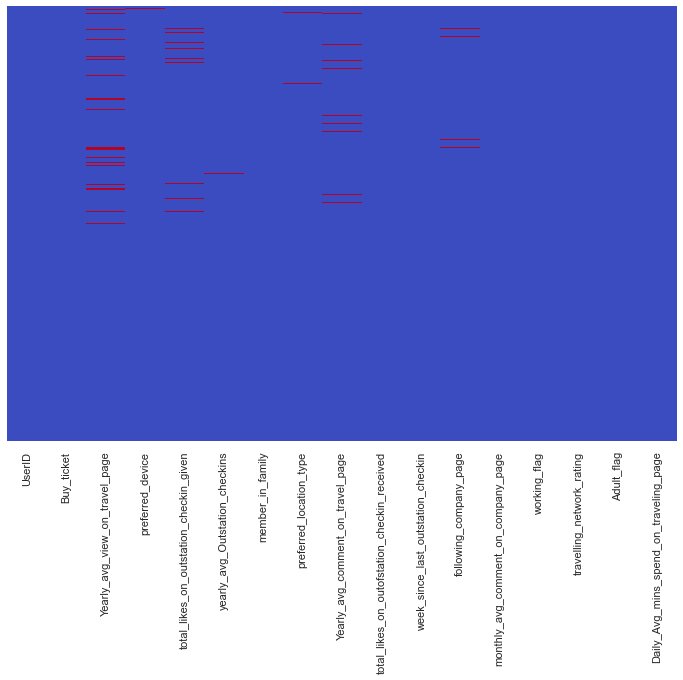

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

plotting boxplots to check outliers

<AxesSubplot:>

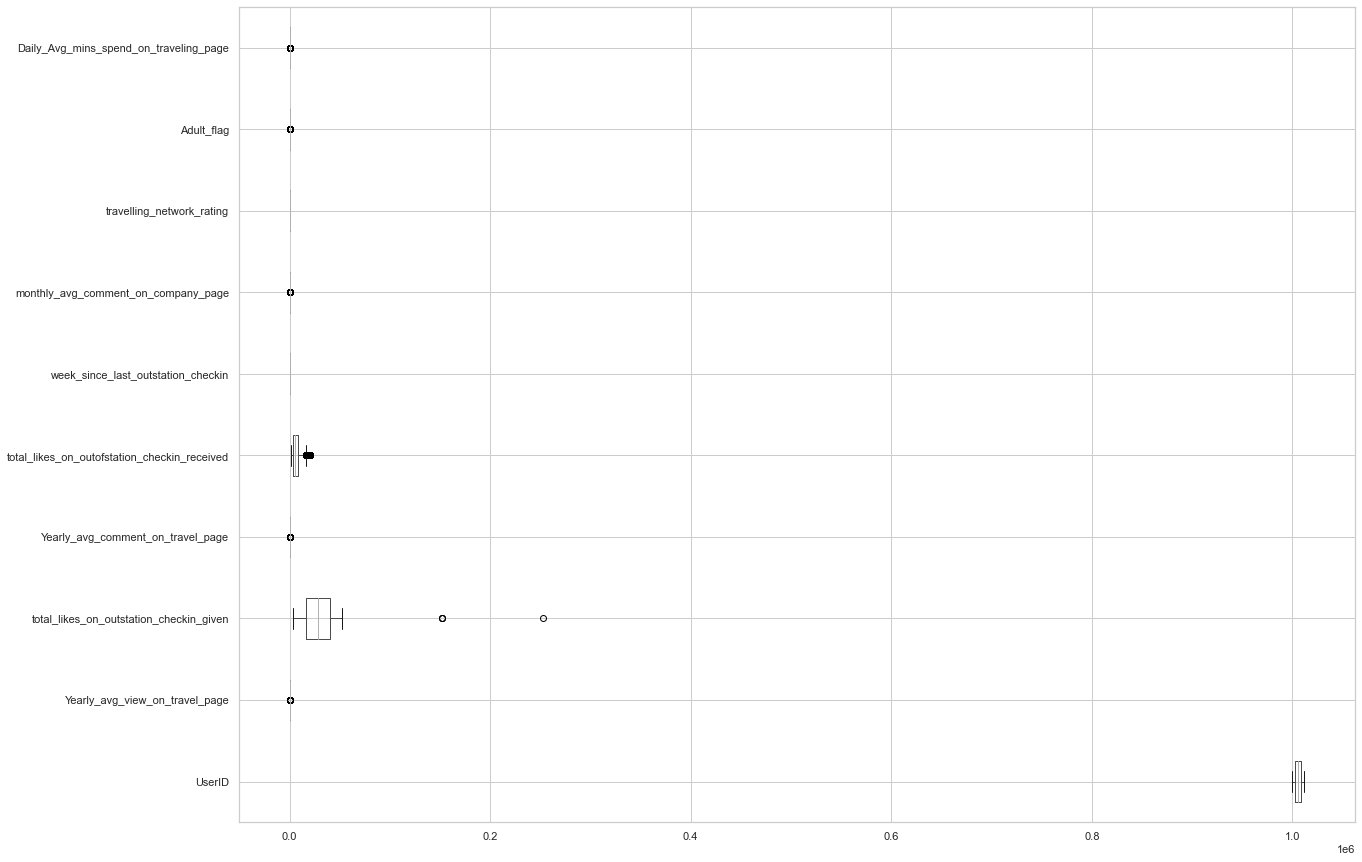

In [ ]:
plt.figure(figsize = (20,15))
df.boxplot(vert=0)

we are treating the null values with median as the numeric variables have outliers

In [ ]:
df['Yearly_avg_comment_on_travel_page']=df['Yearly_avg_comment_on_travel_page'].replace(np.nan,df['Yearly_avg_comment_on_travel_page'].median())


In [ ]:
df['total_likes_on_outstation_checkin_given']=df['total_likes_on_outstation_checkin_given'].replace(np.nan,df['total_likes_on_outstation_checkin_given'].median())

In [ ]:
df['Yearly_avg_view_on_travel_page']=df['Yearly_avg_view_on_travel_page'].replace(np.nan,df['Yearly_avg_view_on_travel_page'].median())

treating the null values with mode value of the categorical variables

In [ ]:
df['following_company_page']=df['following_company_page'].replace(np.nan,df['following_company_page'].mode().values[0])

In [ ]:
df['preferred_location_type']=df['preferred_location_type'].replace(np.nan,df['preferred_location_type'].mode().values[0])

In [ ]:
df['yearly_avg_Outstation_checkins']=df['yearly_avg_Outstation_checkins'].replace(np.nan,df['yearly_avg_Outstation_checkins'].mode().values[0])

In [ ]:
df['preferred_device']=df['preferred_device'].replace(np.nan,df['preferred_device'].mode().values[0])

In [ ]:
df.isnull().sum()

UserID                                          0
Buy_ticket                                      0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
monthly_avg_comment_on_company_page             0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

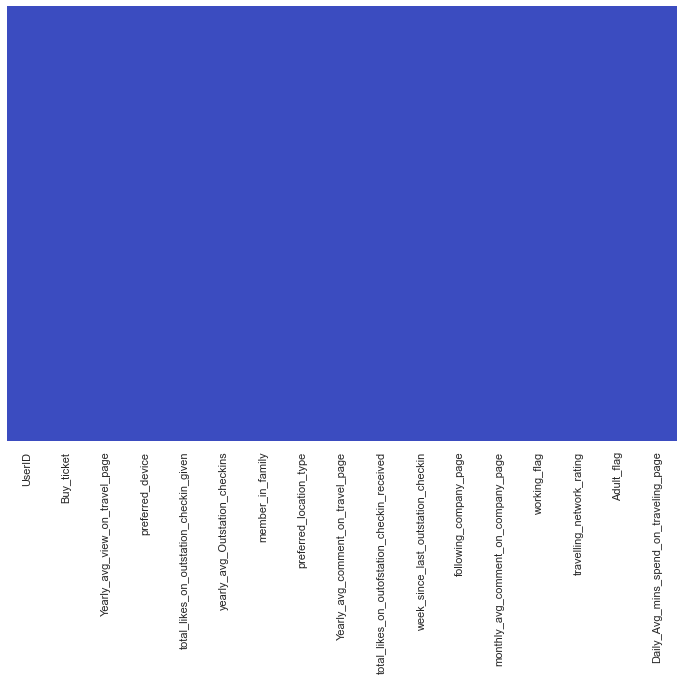

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [ ]:
df = df.drop('UserID', axis=1)

In [ ]:
df

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0            Yes                           307.0  iOS and Android   
1             No                           367.0              iOS   
2            Yes                           277.0  iOS and Android   
3             No                           247.0              iOS   
4             No                           202.0  iOS and Android   
...          ...                             ...              ...   
11755         No                           279.0           Laptop   
11756         No                           305.0              Tab   
11757         No                           214.0              Tab   
11758         No                           382.0           Laptop   
11759         No                           270.0              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                      38570.0                              1   
1                                       9765.0                              1   
2                                      48055.0                              1   
3                                      48720.0                              1   
4                                      20685.0                              1   
...                                        ...                            ...   
11755                                  30987.0                             23   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11758                                  35851.0                              2   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
0                    2               Financial   
1                    1               Financial   
2                    2                   Other   
3                    4               Financial   
4                    1                 Medical   
...                ...                     ...   
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                              5993   
1                                              5130   
2                                              2090   
3                                              2909   
4                                              3468   
...                                             ...   
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
0                                       8                    Yes   
1                                       1                     No   
2                                       6                    Yes   
3                                       1                    Yes   
4                                       9                     No   
...  

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BUY_TICKET :  2
Yes    1896
No     9864
Name: Buy_ticket, dtype: int64


PREFERRED_DEVICE :  10
Other                 2
Others                2
ANDROID             134
Android OS          145
Android             315
Mobile              600
iOS                1095
Laptop             1108
iOS and Android    4134
Tab                4225
Name: preferred_device, dtype: int64


YEARLY_AVG_OUTSTATION_CHECKINS :  30
*        1
27      96
21     143
13     150
22     152
12     159
17     160
14     167
19     176
28     180
25     198
20     199
26     199
15     206
18     208
23     215
29     215
24     223
11     229
6      236
16     255
4      256
5      261
8      320
3      336
7      336
9      340
10     682
2      844
1     4618
Name: yearly_avg_Outstation_checkins, dtype: int64


MEMBER_IN_FAMILY :  7
10         11
Three      15
5         384
1        1349
2        2256
4        3184
3        4561
Name: member_in_family, dtype: int64


PREFERRED_LOCATION_TYPE :  15
Movie           

In [ ]:
df['preferred_device'] = df['preferred_device'].replace('Other', 'Mobile')
df['preferred_device'] = df['preferred_device'].replace('ANDROID', 'Mobile')

In [ ]:
df['preferred_device'] = df['preferred_device'].replace('Others', 'Mobile')
df['preferred_device'] = df['preferred_device'].replace('Android', 'Mobile')

In [ ]:
df['preferred_device'] = df['preferred_device'].replace('Android OS', 'Mobile')
df['preferred_device'] = df['preferred_device'].replace('iOS', 'Mobile')

In [ ]:
df['preferred_device'] = df['preferred_device'].replace('iOS and Android', 'Mobile')
df['preferred_device'] = df['preferred_device'].replace('Tab', 'Mobile')

In [ ]:
df['member_in_family'] = df['member_in_family'].replace('Three',3)

In [ ]:
df['member_in_family'] = df['member_in_family'].replace('3', '6')

In [ ]:
df['following_company_page'] = df['following_company_page'].replace('0', 'No')
df['following_company_page'] = df['following_company_page'].replace('1','Yes')

In [ ]:
df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

In [ ]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*',np.NaN)

In [ ]:
median1=df["yearly_avg_Outstation_checkins"].median()

In [ ]:
df["yearly_avg_Outstation_checkins"].replace(np.NaN,median1,inplace=True)

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BUY_TICKET :  2
Yes    1896
No     9864
Name: Buy_ticket, dtype: int64


PREFERRED_DEVICE :  2
Laptop     1108
Mobile    10652
Name: preferred_device, dtype: int64


YEARLY_AVG_OUTSTATION_CHECKINS :  30
4.0       1
27       96
21      143
13      150
22      152
12      159
17      160
14      167
19      176
28      180
25      198
20      199
26      199
15      206
18      208
23      215
29      215
24      223
11      229
6       236
16      255
4       256
5       261
8       320
3       336
7       336
9       340
10      682
2       844
1      4618
Name: yearly_avg_Outstation_checkins, dtype: int64


MEMBER_IN_FAMILY :  7
10      11
3       15
5      384
1     1349
2     2256
4     3184
6     4561
Name: member_in_family, dtype: int64


PREFERRED_LOCATION_TYPE :  14
Movie                 5
OTT                   7
Game                 12
Tour and Travel     107
Hill Stations       108
Entertainment       516
Trekking            528
Social media        633
Big Cities          636


In [ ]:
df.duplicated().sum()

1216

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
num = df.select_dtypes(['float64','int64'])
cat = df.select_dtypes(['object'])

In [ ]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for i in num.columns:
    ll,ul=remove_outlier(df[i])
    df[i]=np.where(df[i]>ul,ul,df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])

df = pd.concat([cat,num], axis = 1)

<AxesSubplot:>

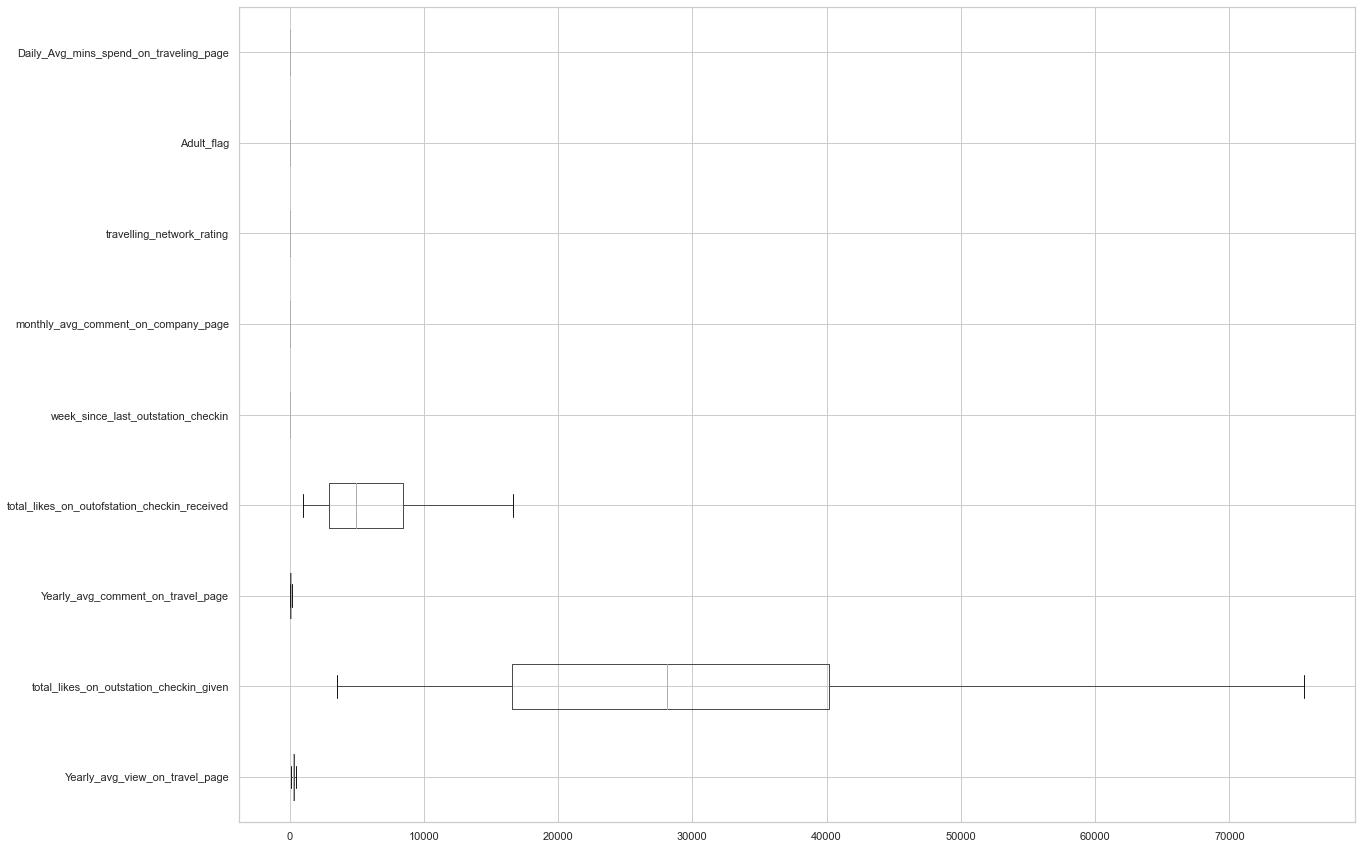

In [ ]:
plt.figure(figsize = (20,15))
df.boxplot(vert=0)

df=df1

df1[df1['preferred_device']!= 'Laptop']['preferred_device']='Mobile'

In [ ]:
df_laptop =df[df['preferred_device']=='Laptop']
df_Mobile =df[df['preferred_device']=='Mobile']

In [ ]:
df_laptop

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
5881          No                           379.0           Laptop   
5883          No                           255.0           Laptop   
5885          No                           250.0           Laptop   
5888          No                           295.0           Laptop   
5906         Yes                           250.0           Laptop   
...          ...                             ...              ...   
11730         No                           278.0           Laptop   
11742        Yes                           388.0           Laptop   
11746         No                           268.0           Laptop   
11755         No                           279.0           Laptop   
11758         No                           382.0           Laptop   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
5881                                    9776.0                              8   
5883                                   48725.0                              3   
5885                                   35184.0                              2   
5888                                    7572.0                             23   
5906                                   39379.0                             16   
...                                        ...                            ...   
11730                                  24127.0                              4   
11742                                  30775.0                              1   
11746                                  42010.0                             18   
11755                                  30987.0                             23   
11758                                  35851.0                              2   

      member_in_family preferred_location_type  \
5881                 1                   Beach   
5883                 4                   Beach   
5885                 2                   Beach   
5888                 6                   Beach   
5906                 1                   Beach   
...                ...                     ...   
11730                2                   Beach   
11742                4                   Beach   
11746                4                   Beach   
11755                2         Historical site   
11758                6         Historical site   

       Yearly_avg_comment_on_travel_page  \
5881                                64.0   
5883                                59.0   
5885                                84.0   
5888                                48.0   
5906                                80.0   
...                                  ...   
11730                              115.0   
11742                              109.0   
11746                               98.0   
11755                               58.0   
11758                               83.0   

       total_likes_on_outofstation_checkin_received  \
5881                                         5142.0   
5883                                         2913.0   
5885                                         3074.0   
5888                                         9532.0   
5906                                         3926.0   
...                                             ...   
11730                                        5184.0   
11742                                        6787.0   
11746                                        5753.0   
11755                                        2616.0   
11758                                        5444.0   

       week_since_last_outstation_checkin following_company_page  \
5881                                  1.0                     No   
5883                                  1.0                    Yes   
5885                                  0.0                     No   
5888                                  0.0                     No   
5906                                  1.0                    Yes   
...  

In [ ]:
df_laptop['Buy_ticket'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_Mobile

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0            Yes                           307.0           Mobile   
1             No                           367.0           Mobile   
2            Yes                           277.0           Mobile   
3             No                           247.0           Mobile   
4             No                           202.0           Mobile   
...          ...                             ...              ...   
11753         No                           247.0           Mobile   
11754         No                           210.0           Mobile   
11756         No                           305.0           Mobile   
11757         No                           214.0           Mobile   
11759         No                           270.0           Mobile   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                      38570.0                              1   
1                                       9765.0                              1   
2                                      48055.0                              1   
3                                      48720.0                              1   
4                                      20685.0                              1   
...                                        ...                            ...   
11753                                  11418.0                              5   
11754                                  40886.0                              5   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
0                    2               Financial   
1                    1               Financial   
2                    2                   Other   
3                    4               Financial   
4                    1                 Medical   
...                ...                     ...   
11753                6         Historical site   
11754                6                   Other   
11756                1         Historical site   
11757                6                   Beach   
11759                6         Historical site   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11753                               99.0   
11754                               53.0   
11756                               55.0   
11757                              103.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11753                                        9983.0   
11754                                        3024.0   
11756                                       10041.0   
11757                                        6203.0   
11759                                        4470.0   

       week_since_last_outstation_checkin following_company_page  \
0                                     8.0                    Yes   
1                                     1.0                     No   
2                                     6.0                    Yes   
3                                     1.0                    Yes   
4                                     9.0                     No   
...  

### EDA for laptops

Text(0.5, 1.0, 'histogram ')

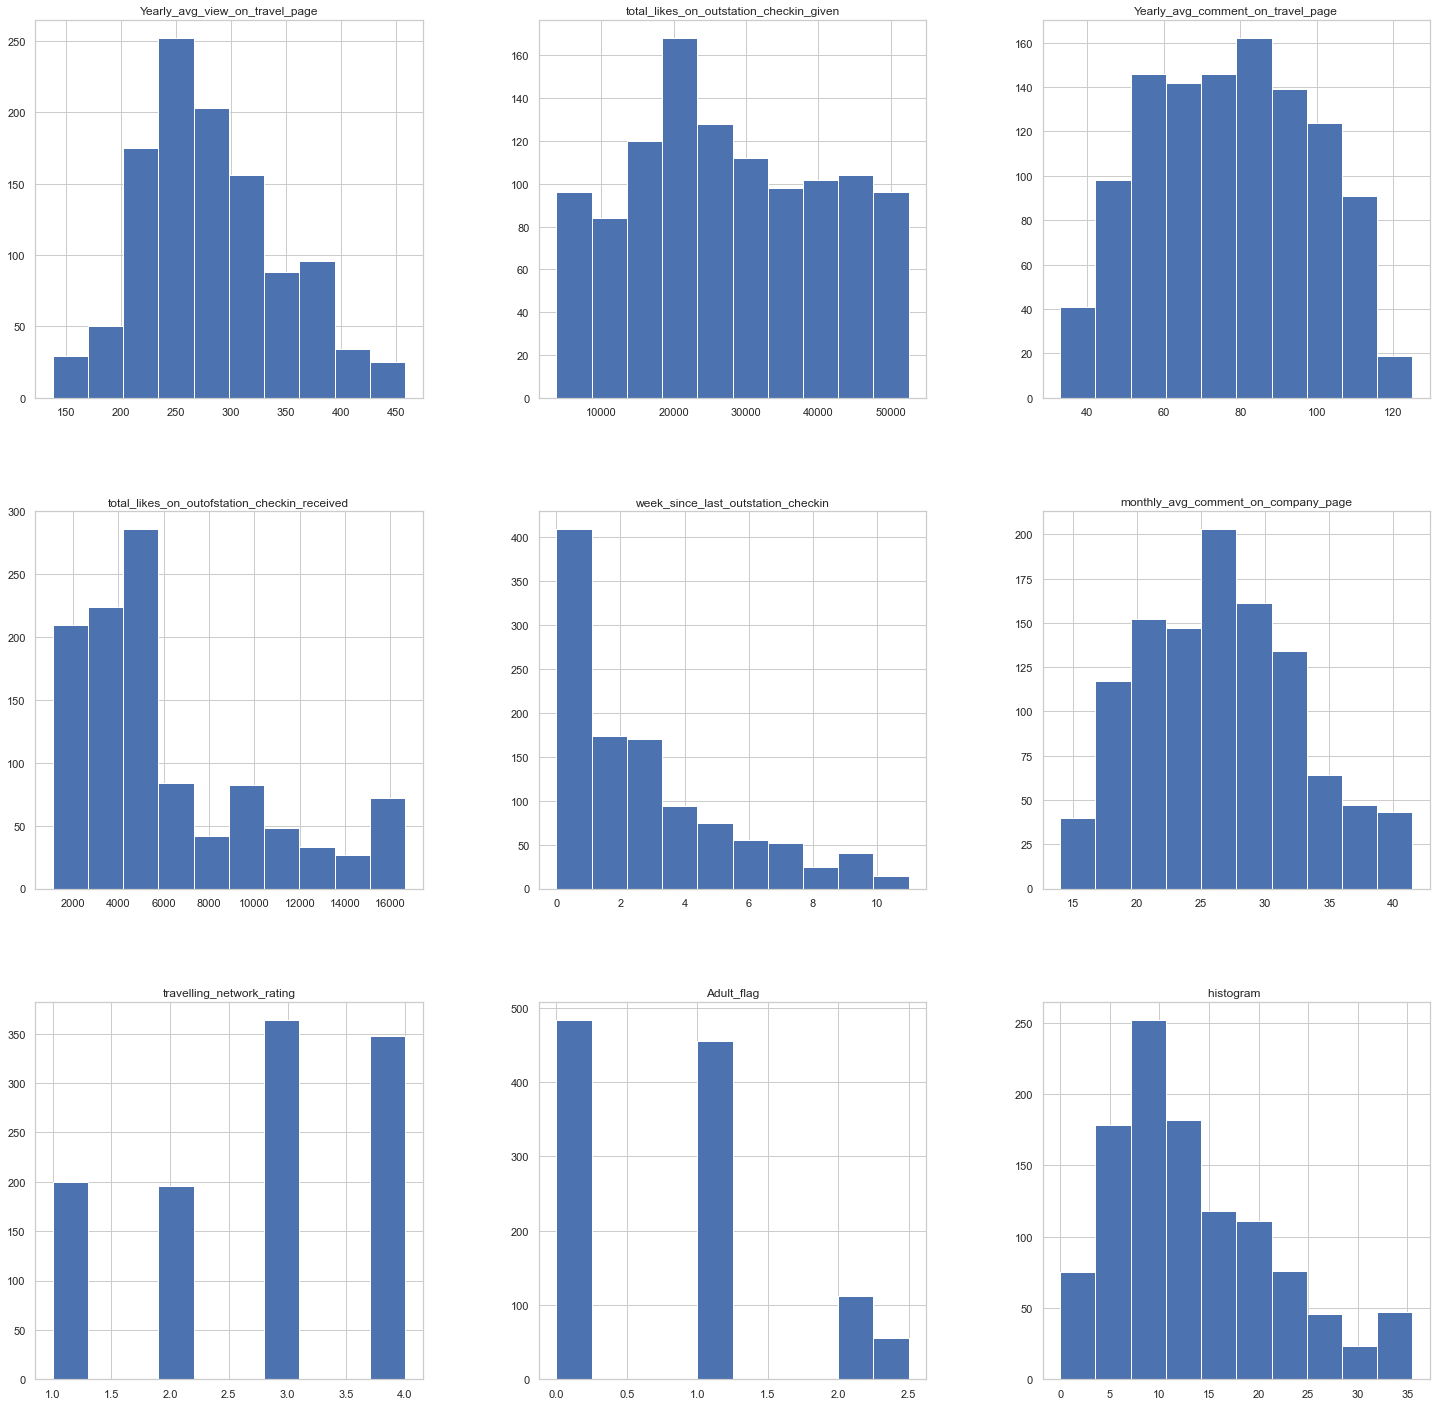

In [ ]:
df_laptop.hist(figsize=(25,25))
plt.title('histogram ')

strip plots

<AxesSubplot:xlabel='Yearly_avg_view_on_travel_page'>

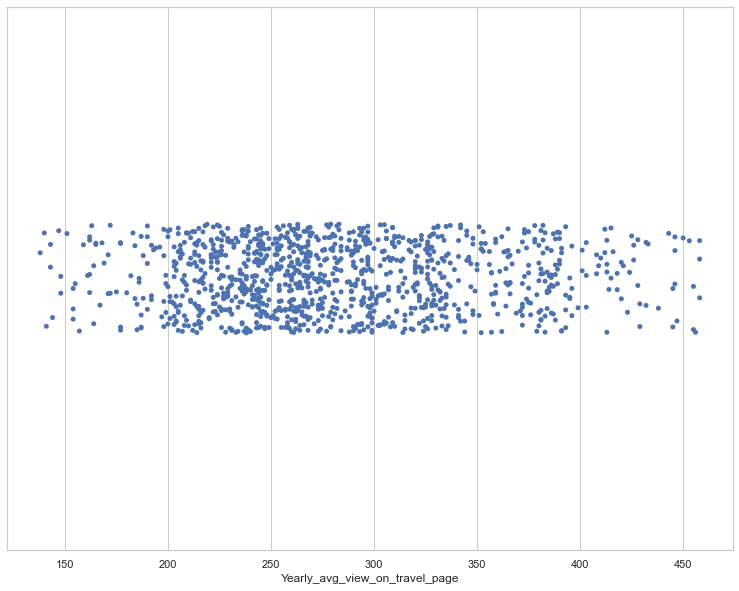

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Yearly_avg_view_on_travel_page',data = df_laptop)

<AxesSubplot:xlabel='total_likes_on_outstation_checkin_given'>

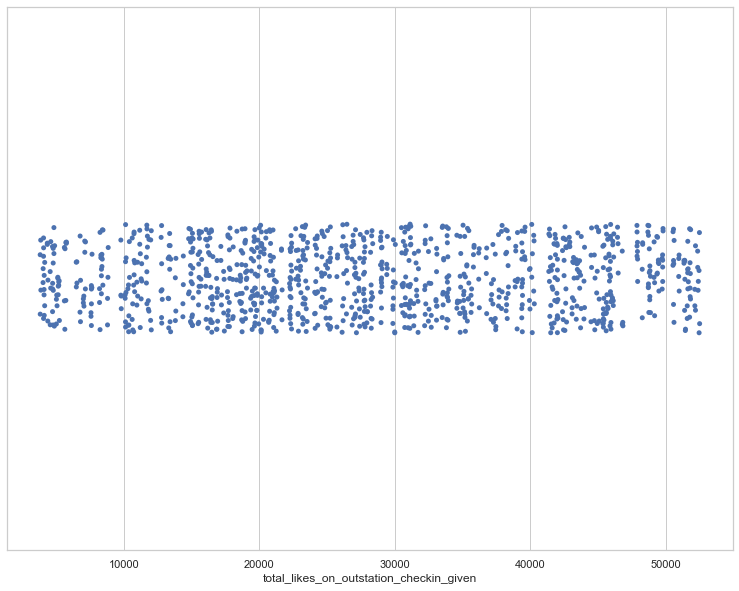

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'total_likes_on_outstation_checkin_given',data = df_laptop)

<AxesSubplot:xlabel='Yearly_avg_comment_on_travel_page'>

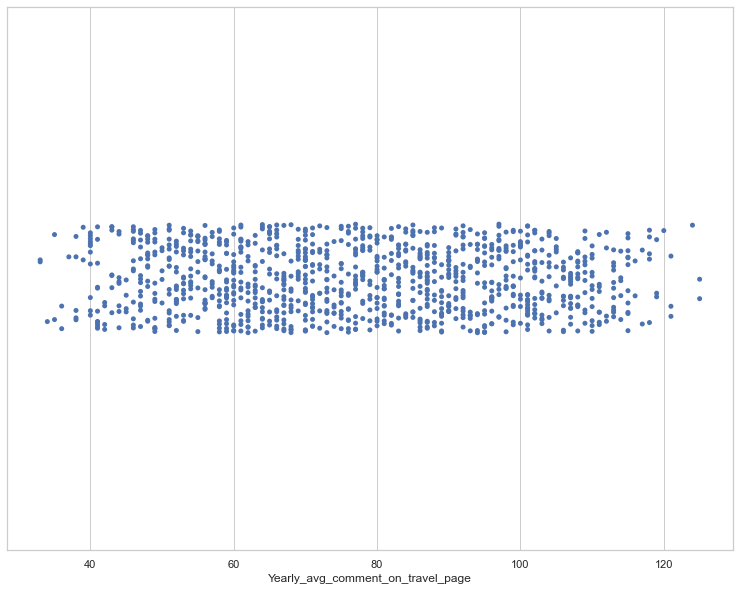

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Yearly_avg_comment_on_travel_page',data = df_laptop)

<AxesSubplot:xlabel='total_likes_on_outofstation_checkin_received'>

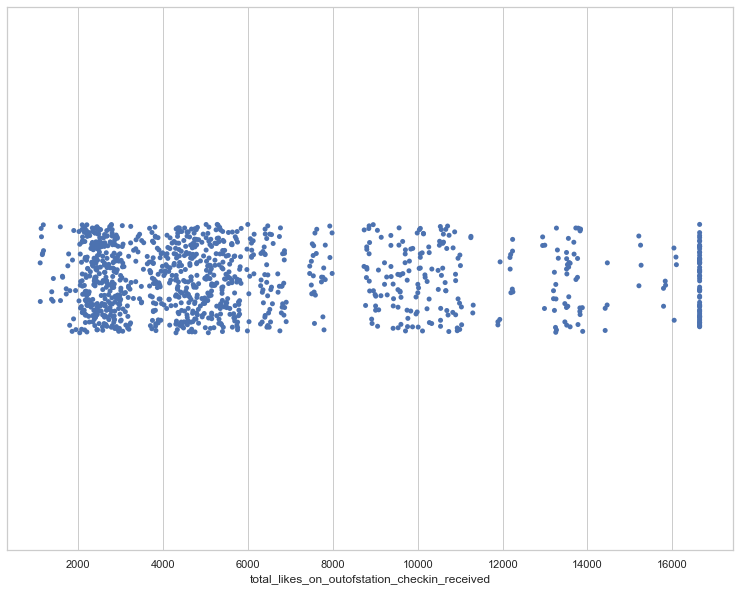

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'total_likes_on_outofstation_checkin_received',data = df_laptop)

<AxesSubplot:xlabel='week_since_last_outstation_checkin'>

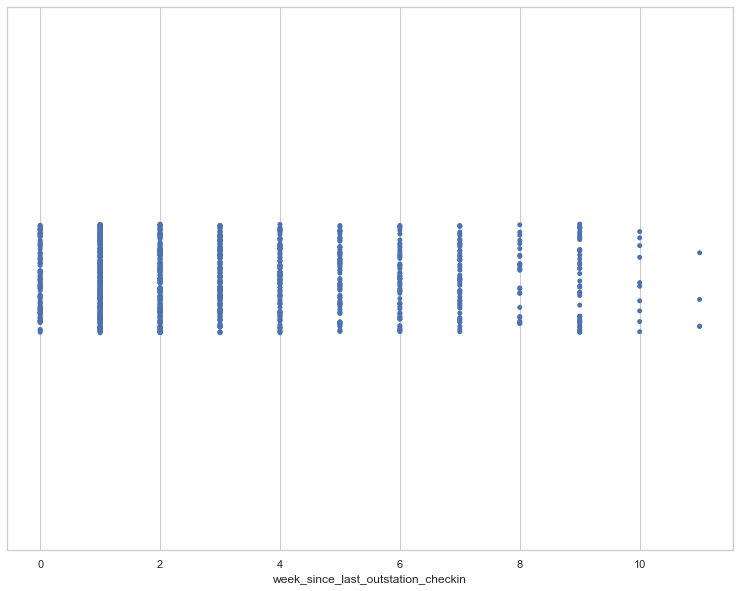

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'week_since_last_outstation_checkin',data = df_laptop)

<AxesSubplot:xlabel='monthly_avg_comment_on_company_page'>

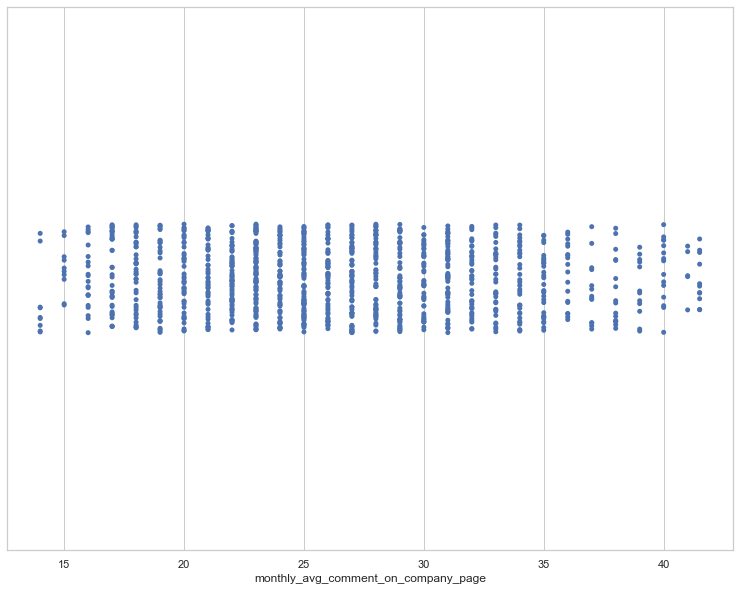

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'monthly_avg_comment_on_company_page',data = df_laptop)

<AxesSubplot:xlabel='travelling_network_rating'>

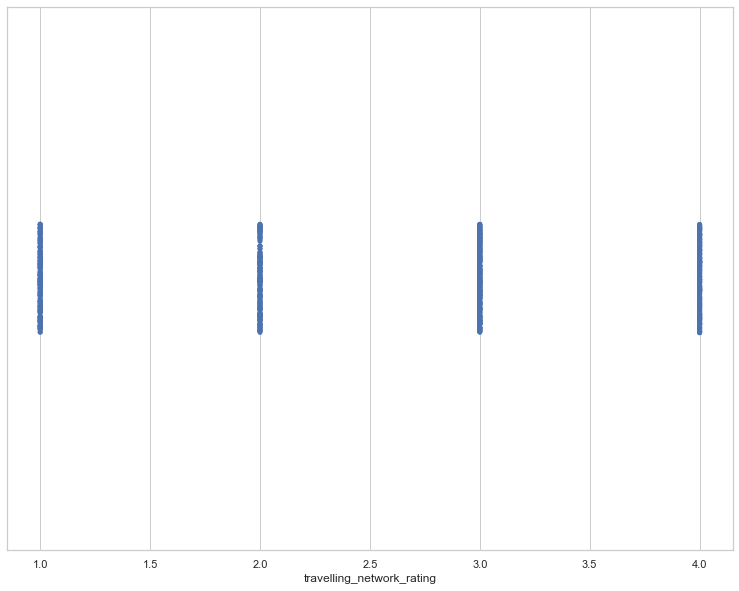

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'travelling_network_rating',data = df_laptop)

<AxesSubplot:xlabel='Daily_Avg_mins_spend_on_traveling_page'>

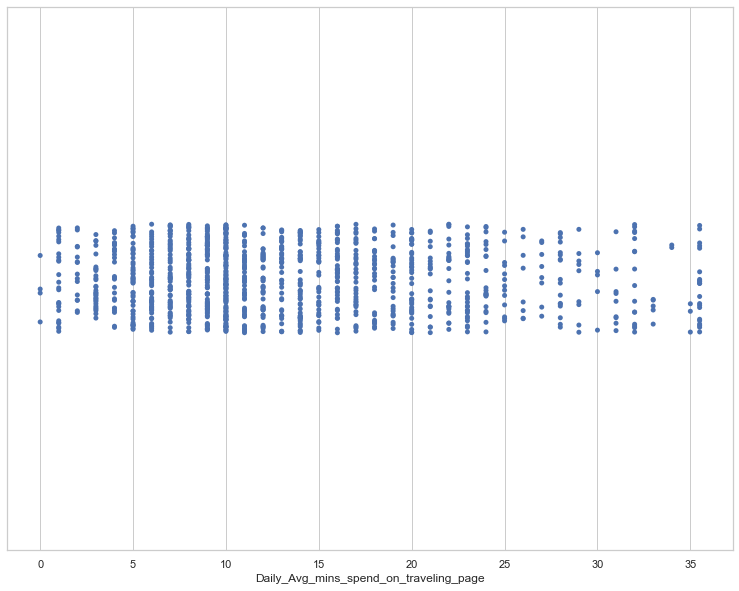

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Daily_Avg_mins_spend_on_traveling_page',data = df_laptop)

<AxesSubplot:xlabel='Adult_flag'>

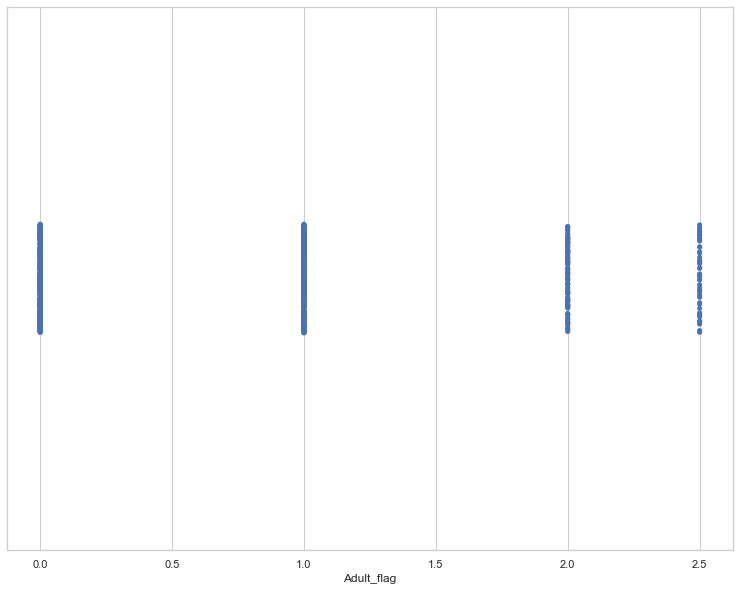

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Adult_flag',data = df_laptop)

Text(0.5, 1.0, 'pair plot ')

<Figure size 720x1080 with 0 Axes>

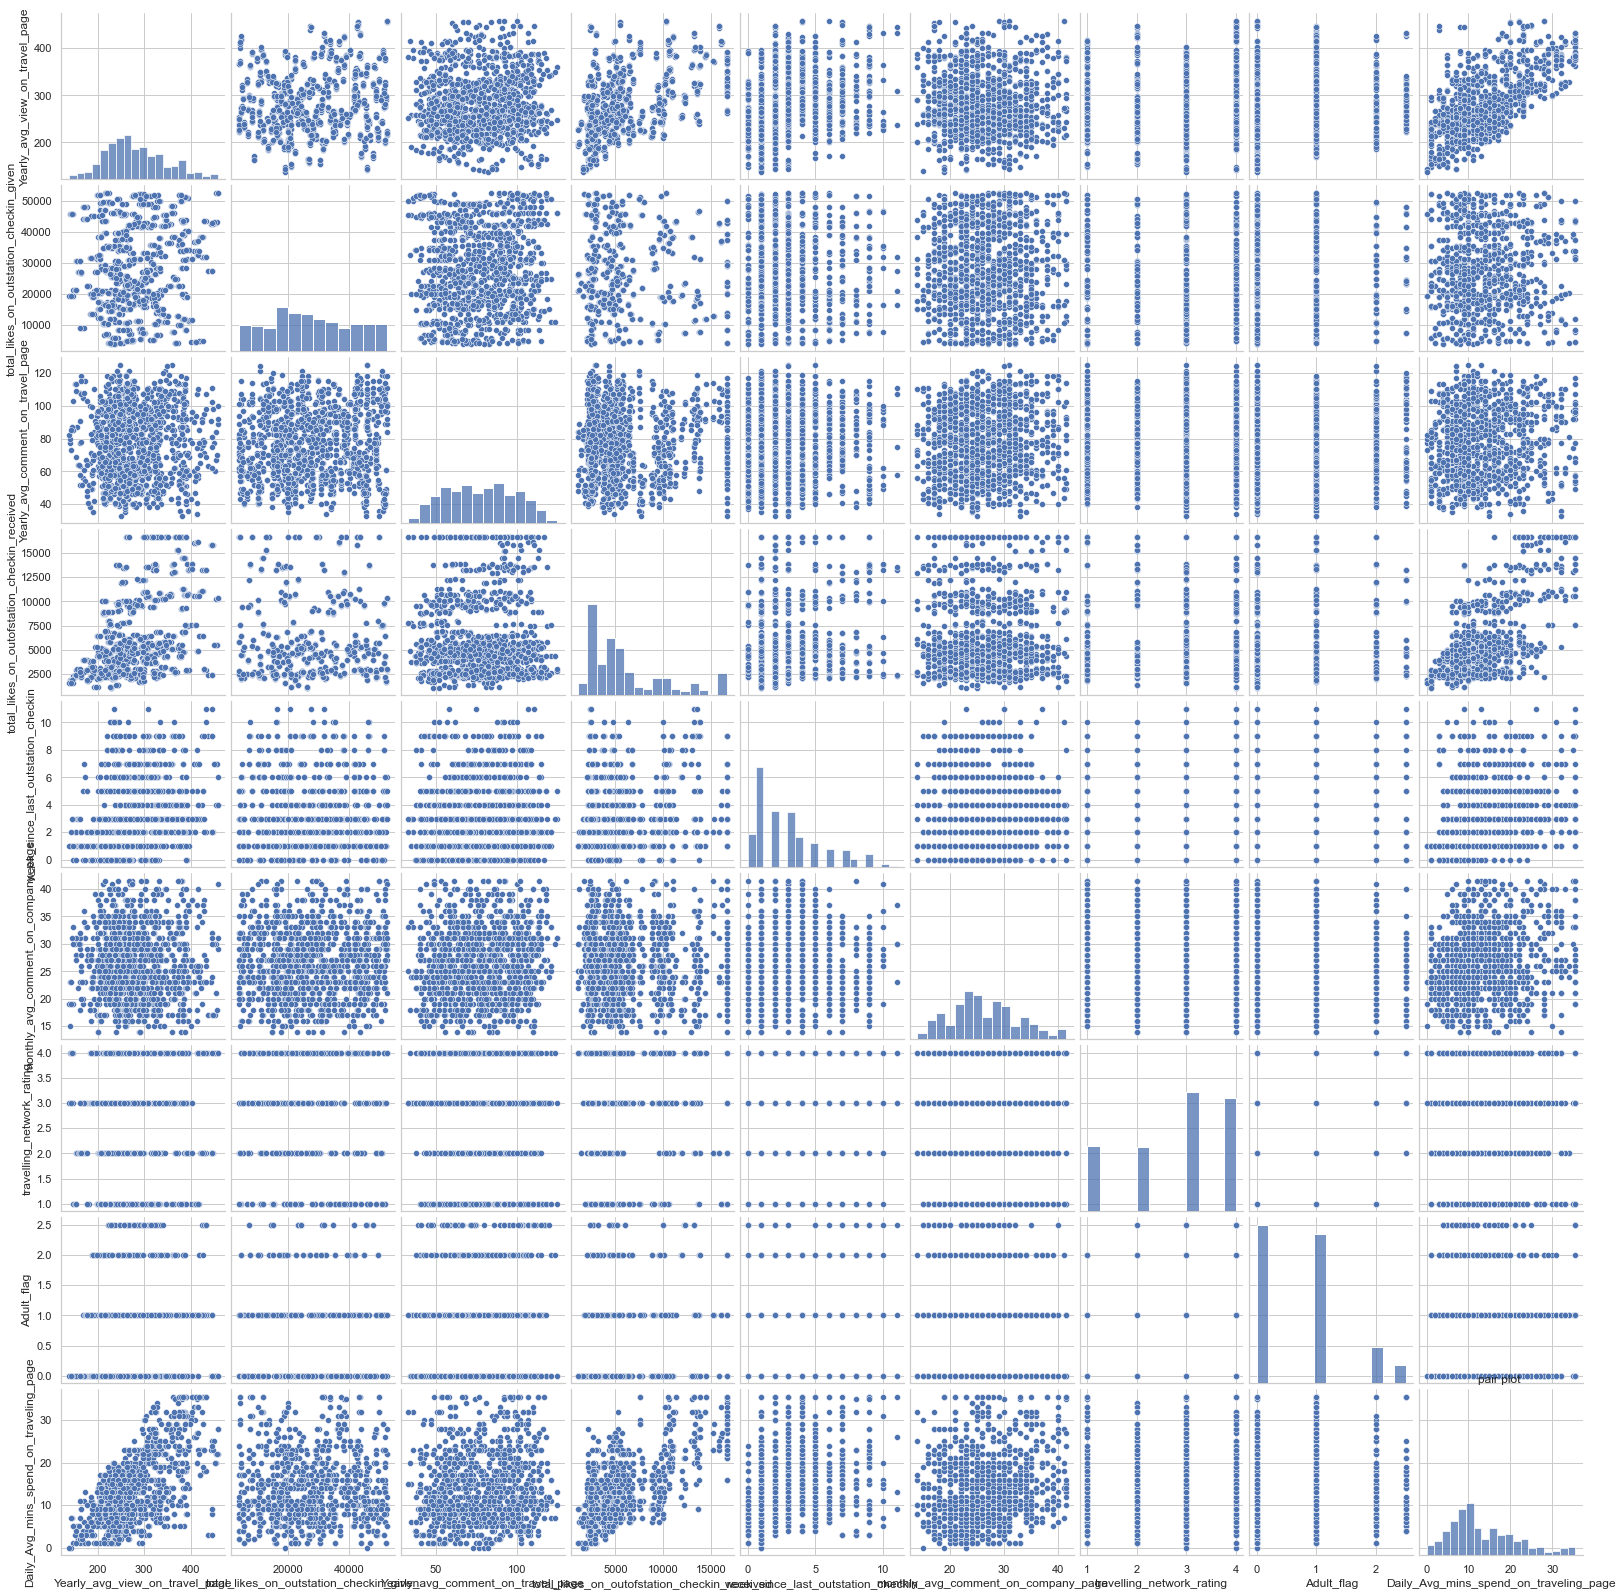

In [ ]:
plt.figure(figsize=(10,15))
sns.pairplot(df_laptop)
plt.title('pair plot ')

<AxesSubplot:title={'center':'heat map '}>

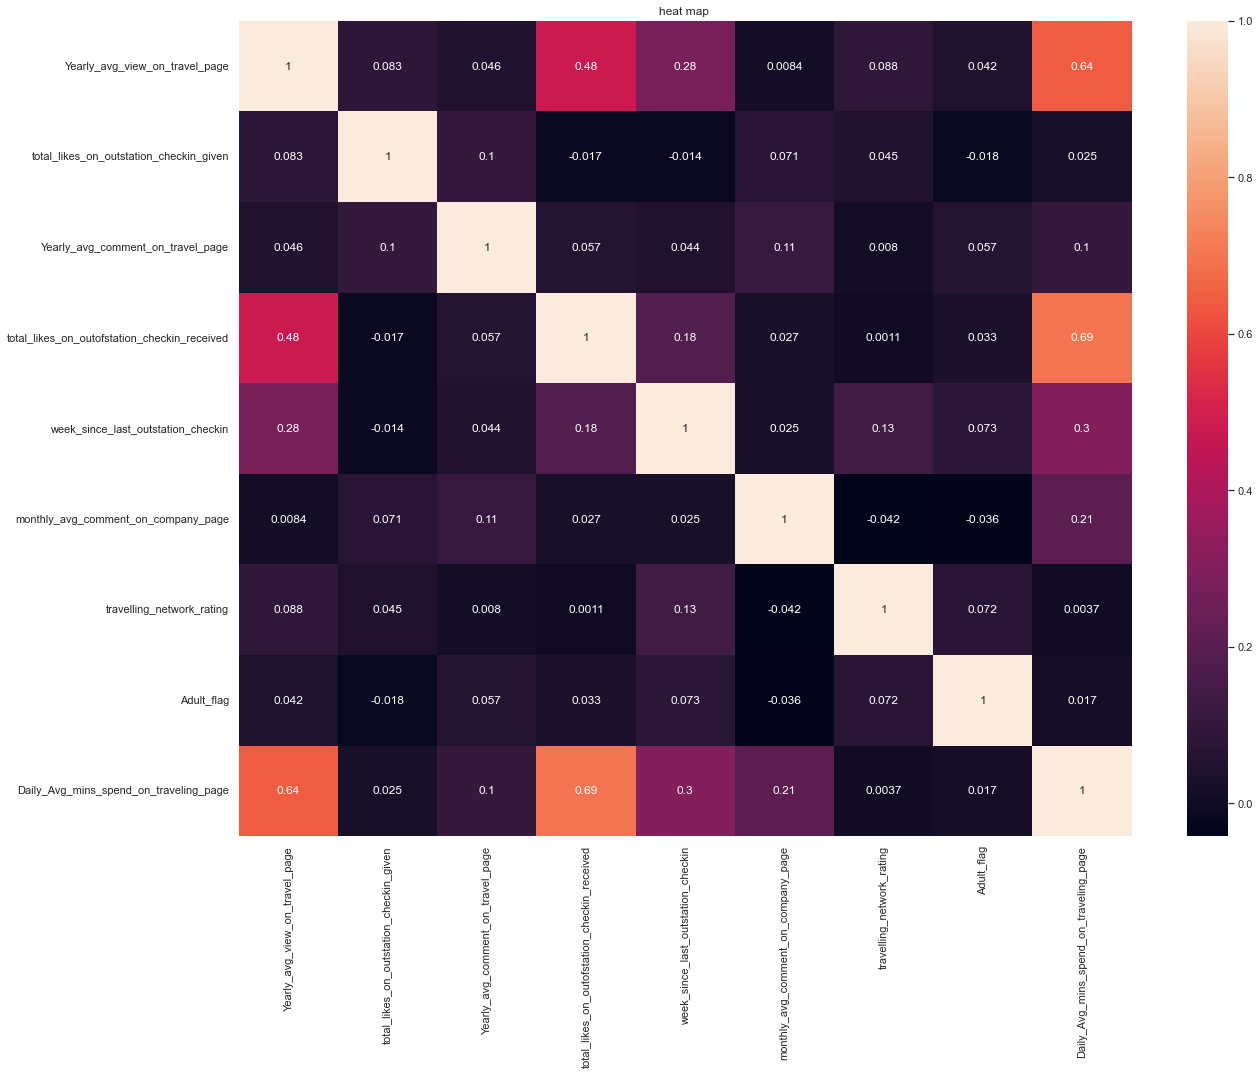

In [ ]:

corr=df_laptop.corr()
plt.figure(figsize = (20,15))
plt.title('heat map ')
sns.heatmap(corr,annot=True)

<AxesSubplot:title={'center':'count plot of Buy_ticket '}, xlabel='Buy_ticket', ylabel='count'>

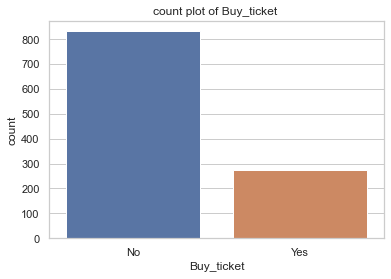

In [ ]:
plt.title('count plot of Buy_ticket ')
sns.countplot(data=df_laptop,x="Buy_ticket")

<AxesSubplot:title={'center':'count plot of yearly_avg_Outstation_checkins '}, xlabel='yearly_avg_Outstation_checkins', ylabel='count'>

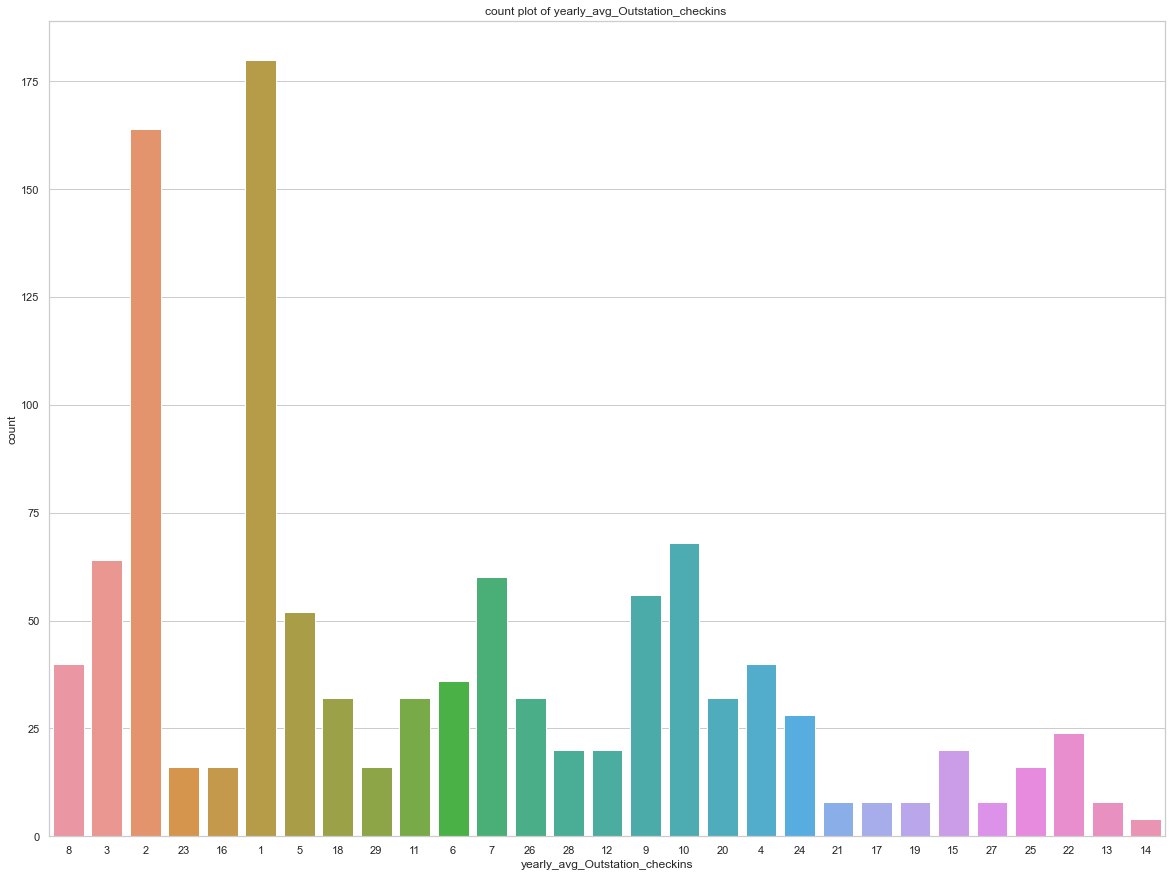

In [ ]:
plt.figure(figsize = (20,15))
plt.title('count plot of yearly_avg_Outstation_checkins ')
sns.countplot(data=df_laptop,x="yearly_avg_Outstation_checkins")

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px

<AxesSubplot:title={'center':'count plot of member_in_family '}, xlabel='member_in_family', ylabel='count'>

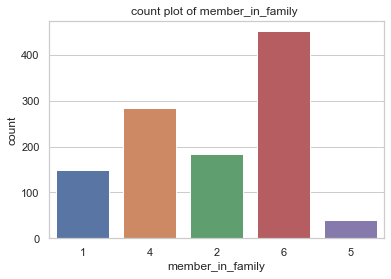

In [ ]:
plt.title('count plot of member_in_family ')
sns.countplot(data=df_laptop,x="member_in_family")

<AxesSubplot:title={'center':'count plot of preferred_location_type '}, xlabel='preferred_location_type', ylabel='count'>

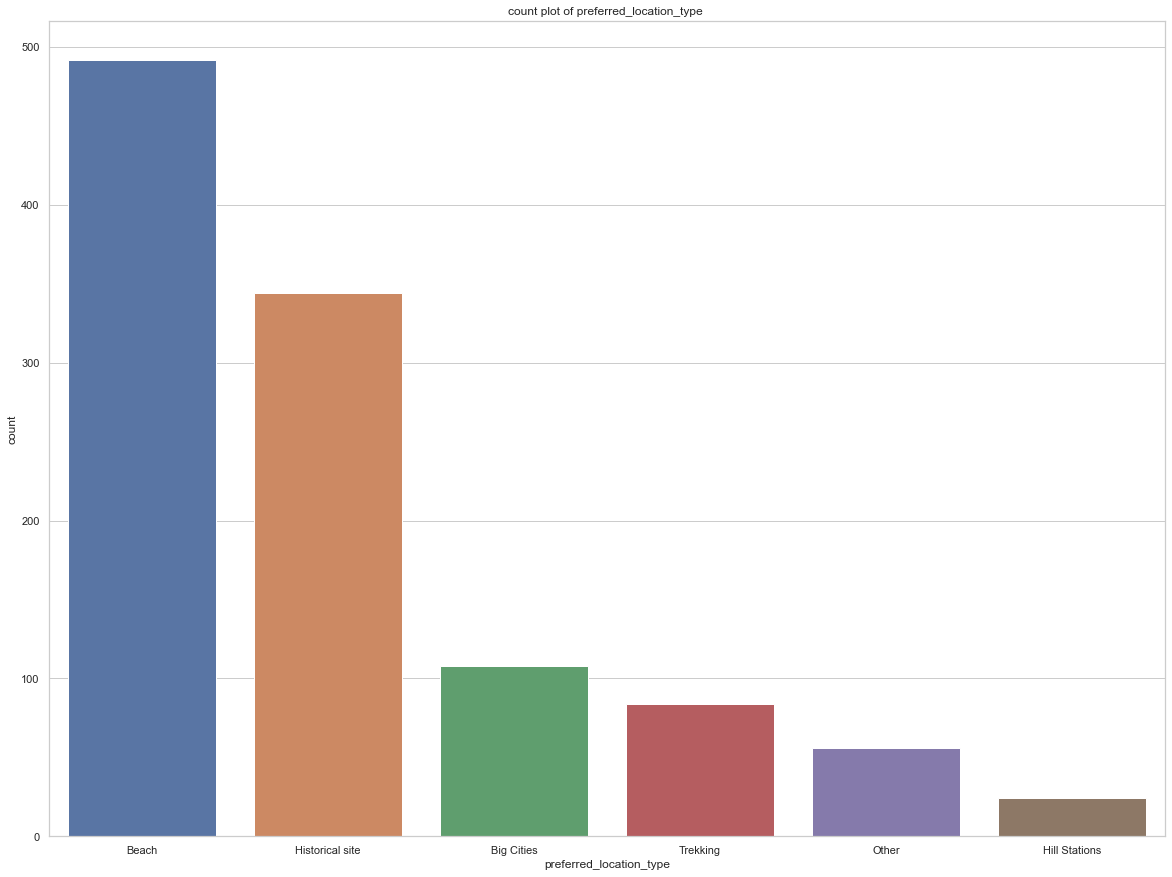

In [ ]:
plt.figure(figsize = (20,15))
plt.title('count plot of preferred_location_type ')
sns.countplot(data=df_laptop,x="preferred_location_type")

<AxesSubplot:title={'center':'count plot of following_company_page '}, xlabel='following_company_page', ylabel='count'>

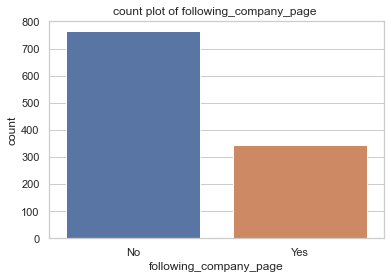

In [ ]:
plt.title('count plot of following_company_page ')
sns.countplot(data=df_laptop,x="following_company_page")

<AxesSubplot:title={'center':'count plot of working_flag '}, xlabel='working_flag', ylabel='count'>

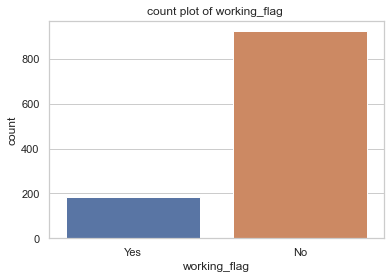

In [ ]:
plt.title('count plot of working_flag ')
sns.countplot(data=df_laptop,x="working_flag")

<AxesSubplot:title={'center':'bar plot of member_in_family and Buy_ticket '}, xlabel='member_in_family', ylabel='count'>

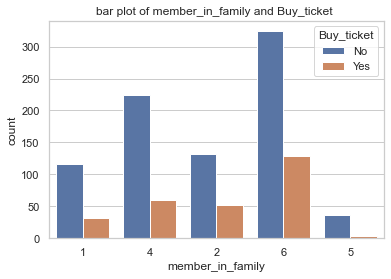

In [ ]:
plt.title('bar plot of member_in_family and Buy_ticket ')
sns.countplot(data=df_laptop,x="member_in_family",hue='Buy_ticket')

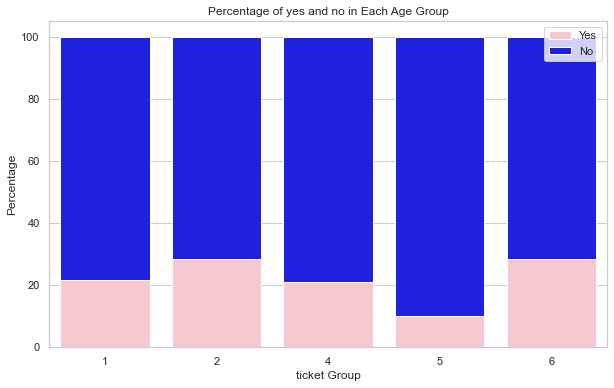

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# You might want to replace these example values with your actual data
ticket_group_data = df_laptop.groupby(['member_in_family', 'Buy_ticket']).size().unstack(fill_value=0)

# Calculate the percentage for each age group
ticket_group_data['total'] = ticket_group_data['Yes'] + ticket_group_data['No']
ticket_group_data['Yes_percent'] = ticket_group_data['Yes'] / ticket_group_data['total'] * 100
ticket_group_data['No_percent'] = ticket_group_data['No'] / ticket_group_data['total'] * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_group_data.index, y=ticket_group_data['Yes_percent'], color='pink', label='Yes')
sns.barplot(x=ticket_group_data.index, y=ticket_group_data['No_percent'], color='blue', bottom=ticket_group_data['Yes_percent'], label='No')

plt.xlabel('ticket Group')
plt.ylabel('Percentage')
plt.title('Percentage of yes and no in Each Age Group')
plt.legend()
plt.show()

df2 = df.groupby(['member_in_family', 'Buy_ticket']).sum()

df2

<AxesSubplot:title={'center':'count plot of preferred_location_type and member_in_family'}, xlabel='preferred_location_type', ylabel='count'>

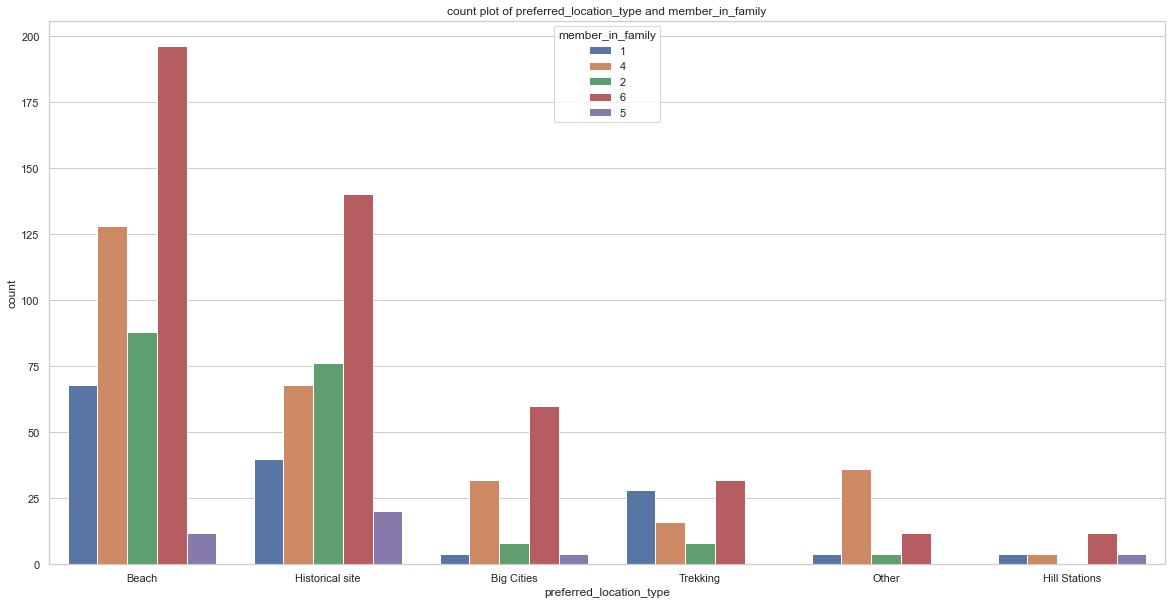

In [ ]:
plt.figure(figsize = (20,10))
plt.title('count plot of preferred_location_type and member_in_family')
sns.countplot(data=df_laptop,x="preferred_location_type",hue="member_in_family")

<AxesSubplot:title={'center':'bar plot of member_in_family and Yearly_avg_comment_on_travel_page '}, xlabel='member_in_family', ylabel='Yearly_avg_comment_on_travel_page'>

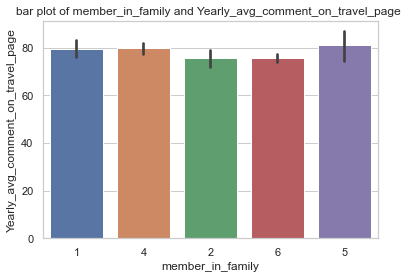

In [ ]:
plt.title('bar plot of member_in_family and Yearly_avg_comment_on_travel_page ')
sns.barplot(data=df_laptop, x='member_in_family', y='Yearly_avg_comment_on_travel_page')

<AxesSubplot:title={'center':'bar plot of member_in_family and Yearly_avg_view_on_travel_page '}, xlabel='member_in_family', ylabel='Yearly_avg_view_on_travel_page'>

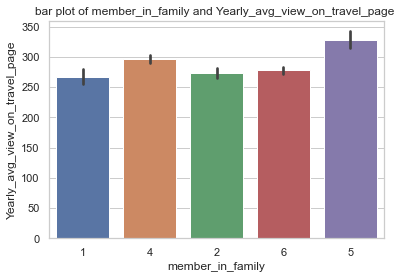

In [ ]:
plt.title('bar plot of member_in_family and Yearly_avg_view_on_travel_page ')
sns.barplot(data=df_laptop, x='member_in_family', y='Yearly_avg_view_on_travel_page')

<AxesSubplot:title={'center':'bar plot of preferred_location_type and Yearly_avg_view_on_travel_page '}, xlabel='preferred_location_type', ylabel='Yearly_avg_view_on_travel_page'>

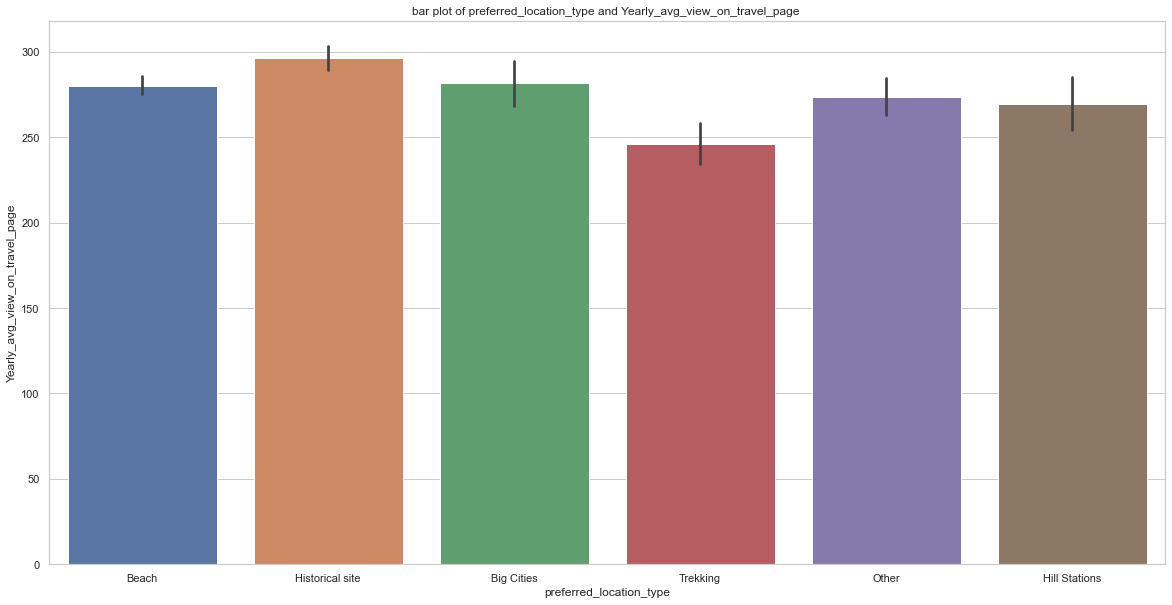

In [ ]:
plt.figure(figsize = (20,10))
plt.title('bar plot of preferred_location_type and Yearly_avg_view_on_travel_page ')
sns.barplot(data=df_laptop, x='preferred_location_type', y='Yearly_avg_view_on_travel_page')

<AxesSubplot:title={'center':'line plot of preferred_location_type and week_since_last_outstation_checkin '}, xlabel='preferred_location_type', ylabel='week_since_last_outstation_checkin'>

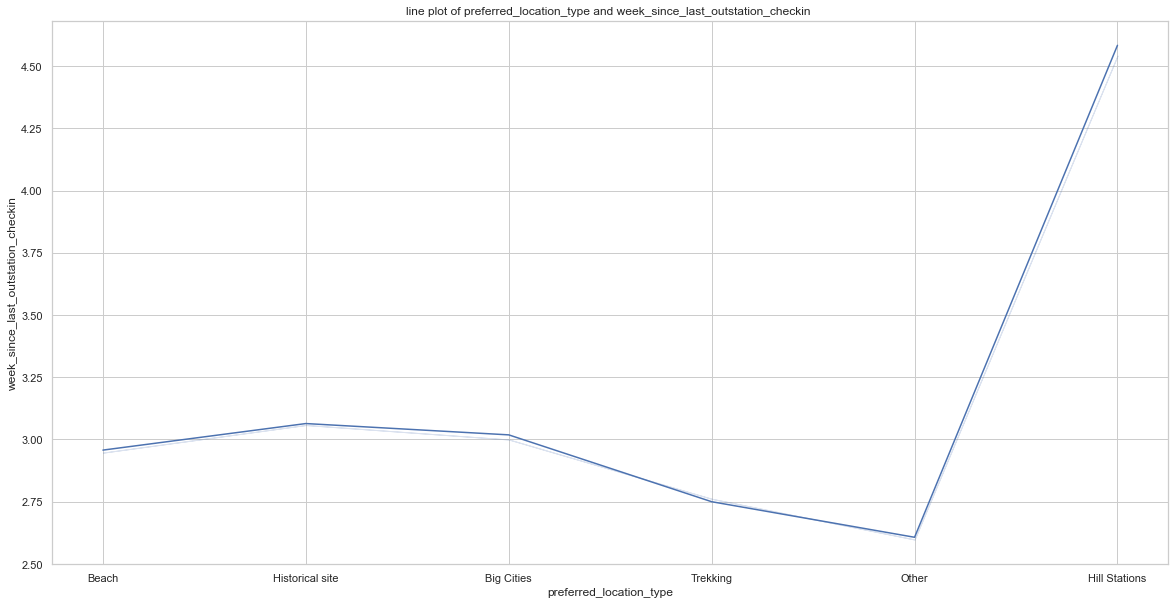

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of preferred_location_type and week_since_last_outstation_checkin ')
sns.lineplot(data=df_laptop, x='preferred_location_type', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and week_since_last_outstation_checkin '}, xlabel='Buy_ticket', ylabel='week_since_last_outstation_checkin'>

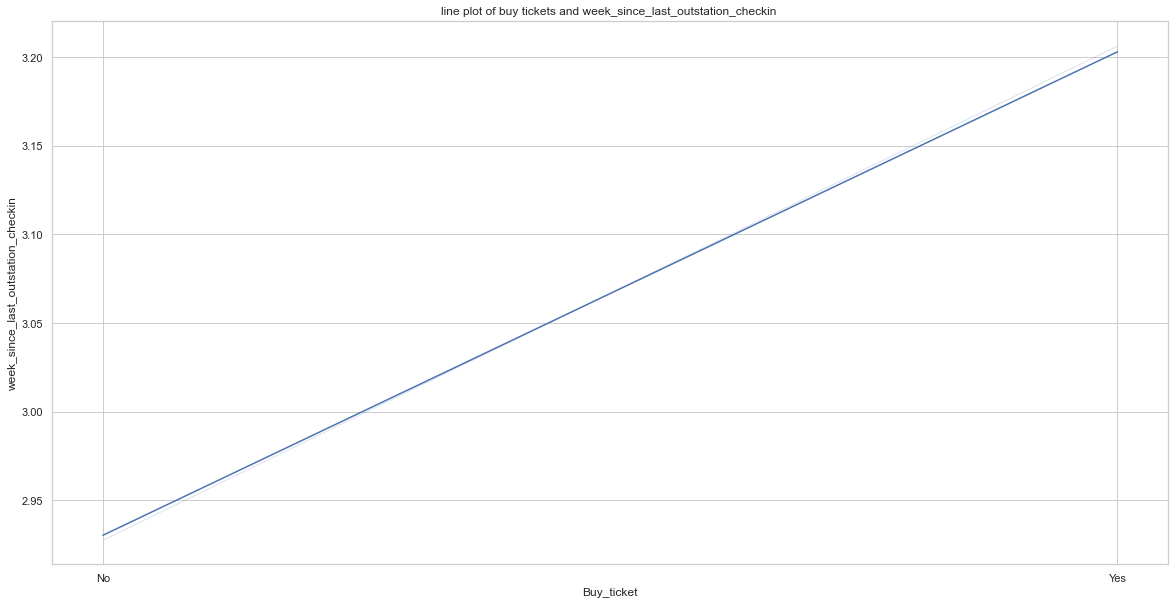

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and week_since_last_outstation_checkin ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and Yearly_avg_view_on_travel_page '}, xlabel='Buy_ticket', ylabel='Yearly_avg_view_on_travel_page'>

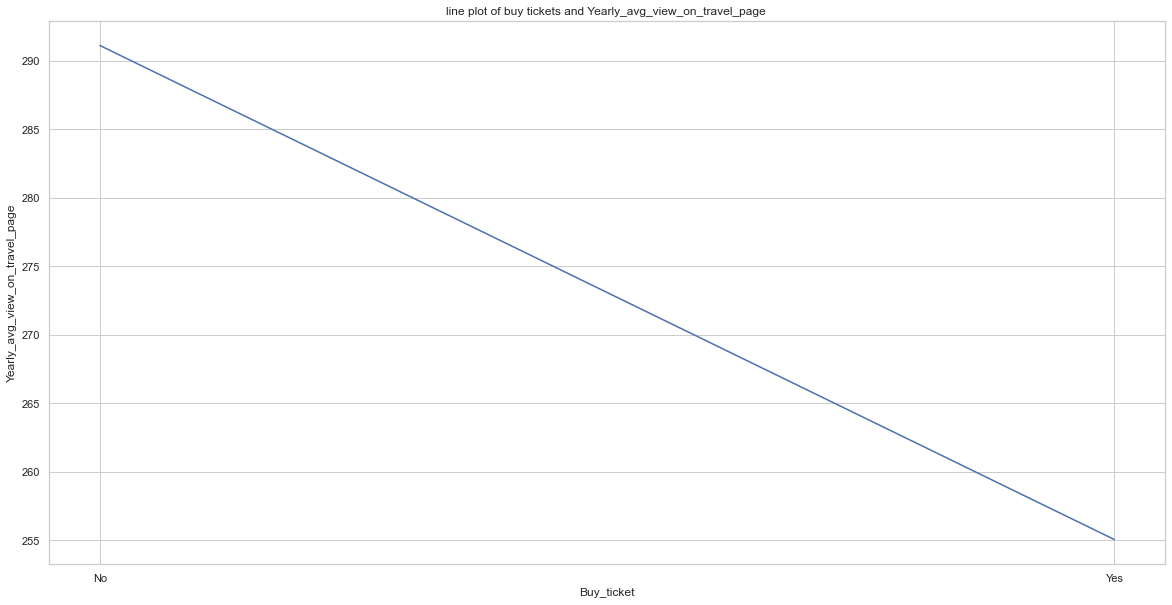

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and Yearly_avg_view_on_travel_page ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='Yearly_avg_view_on_travel_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and total_likes_on_outstation_checkin_given '}, xlabel='Buy_ticket', ylabel='total_likes_on_outstation_checkin_given'>

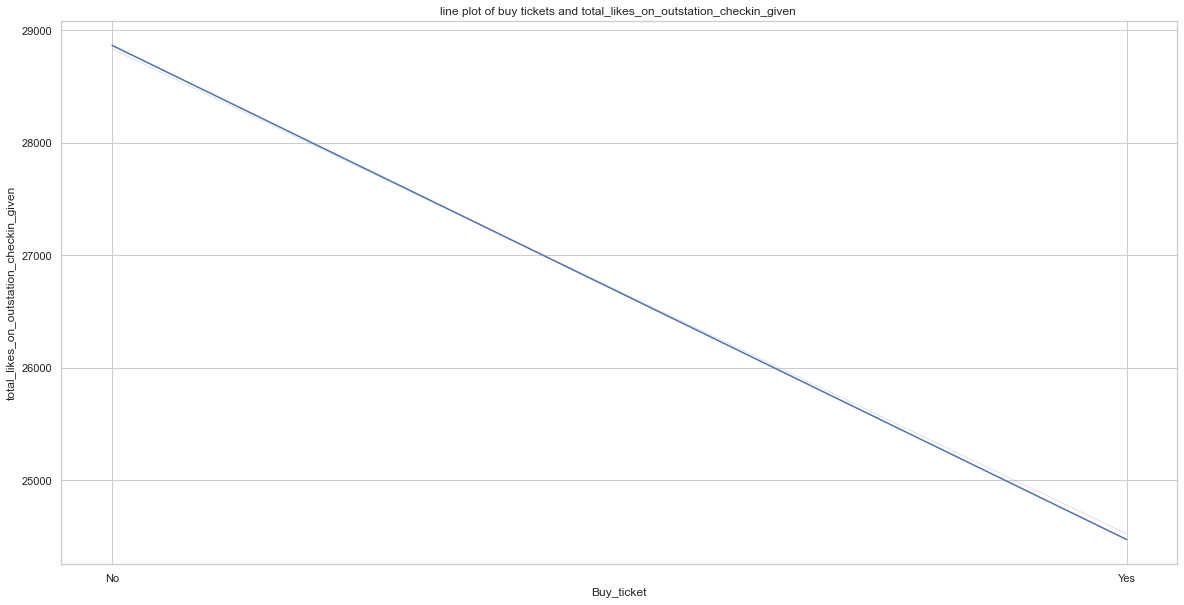

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and total_likes_on_outstation_checkin_given ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='total_likes_on_outstation_checkin_given',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and total_likes_on_outofstation_checkin_received '}, xlabel='Buy_ticket', ylabel='total_likes_on_outofstation_checkin_received'>

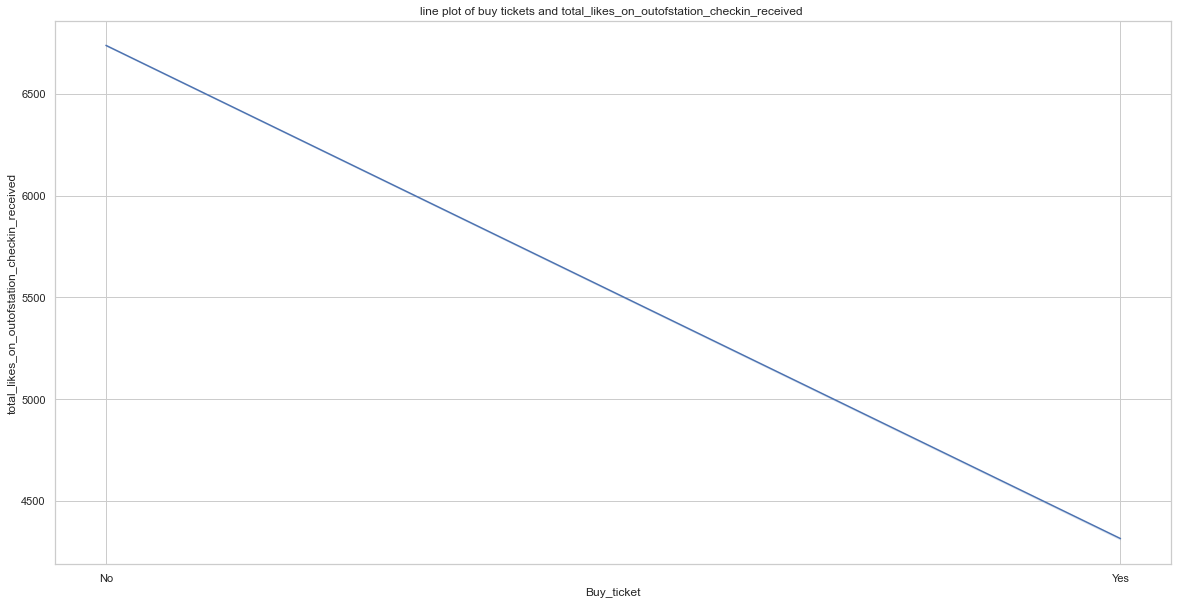

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and total_likes_on_outofstation_checkin_received ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='total_likes_on_outofstation_checkin_received',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and week_since_last_outstation_checkin '}, xlabel='Buy_ticket', ylabel='week_since_last_outstation_checkin'>

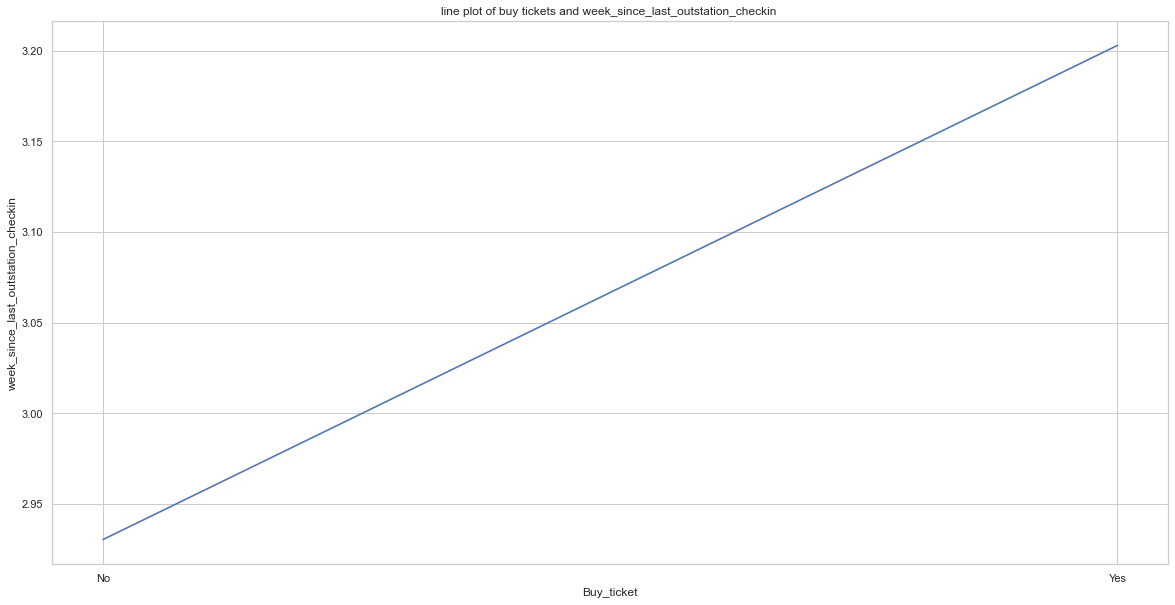

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and week_since_last_outstation_checkin ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and monthly_avg_comment_on_company_page '}, xlabel='Buy_ticket', ylabel='monthly_avg_comment_on_company_page'>

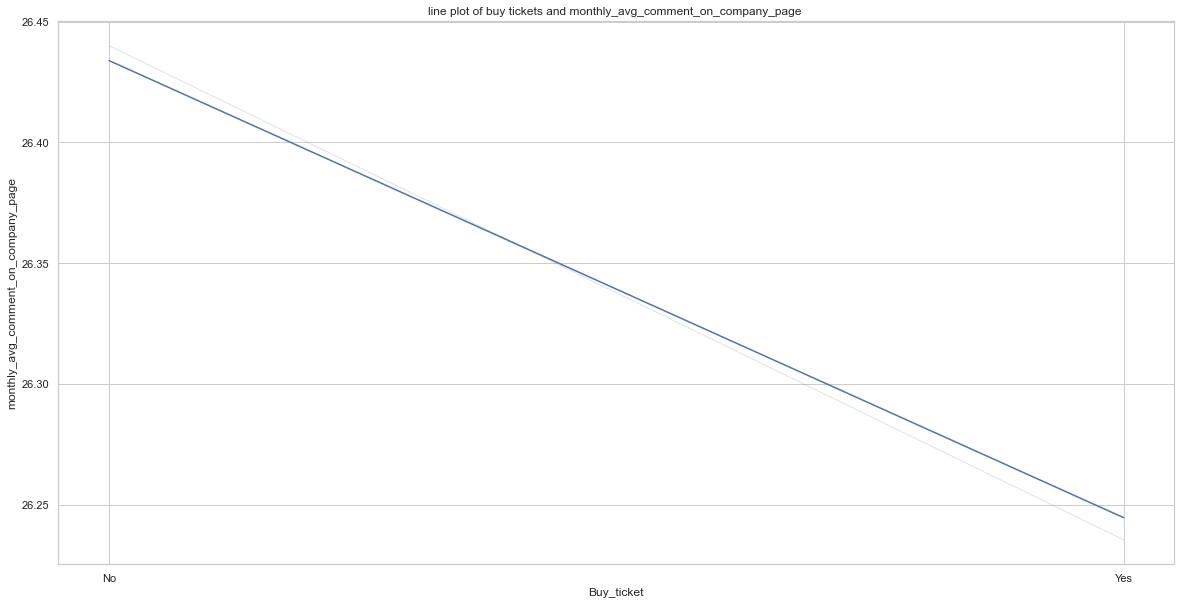

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and monthly_avg_comment_on_company_page ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='monthly_avg_comment_on_company_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and travelling_network_rating '}, xlabel='Buy_ticket', ylabel='travelling_network_rating'>

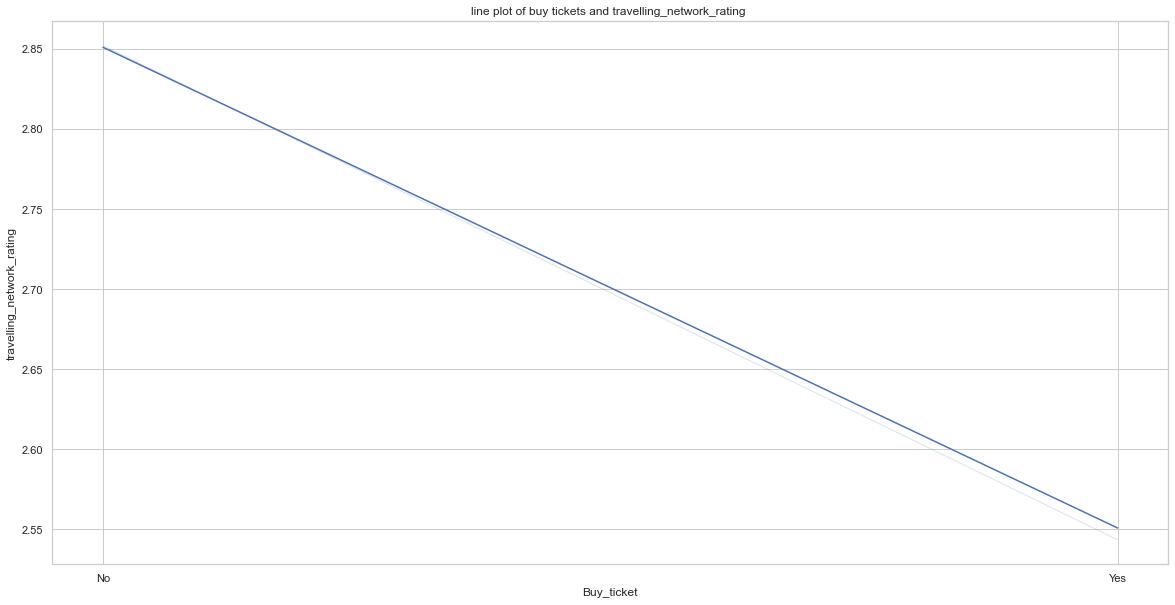

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and travelling_network_rating ')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='travelling_network_rating',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and Daily_Avg_mins_spend_on_traveling_page'}, xlabel='Buy_ticket', ylabel='Daily_Avg_mins_spend_on_traveling_page'>

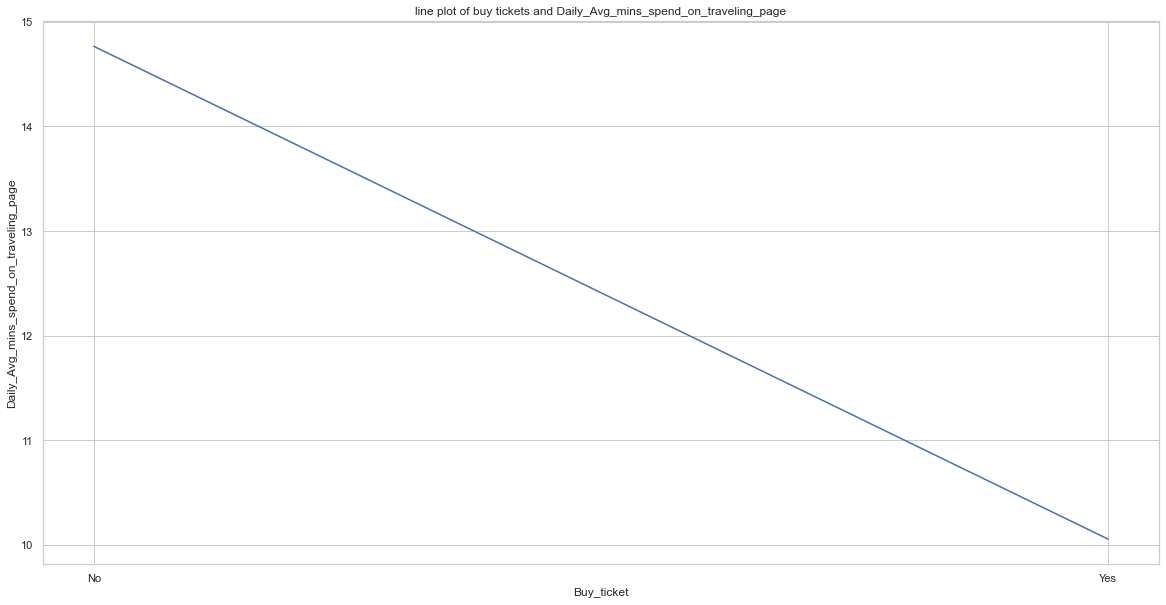

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and Daily_Avg_mins_spend_on_traveling_page')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='Daily_Avg_mins_spend_on_traveling_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and adult flag'}, xlabel='Buy_ticket', ylabel='Adult_flag'>

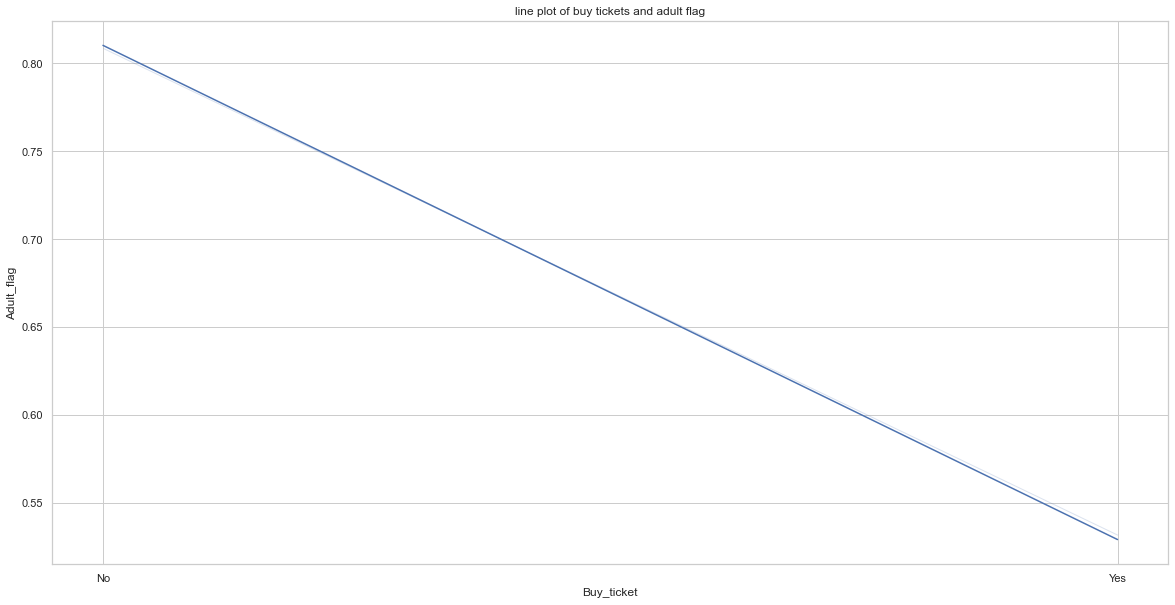

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and adult flag')
sns.lineplot(data=df_laptop, x='Buy_ticket', y='Adult_flag',ci=False)

EDA for mobile

Text(0.5, 1.0, 'histogram ')

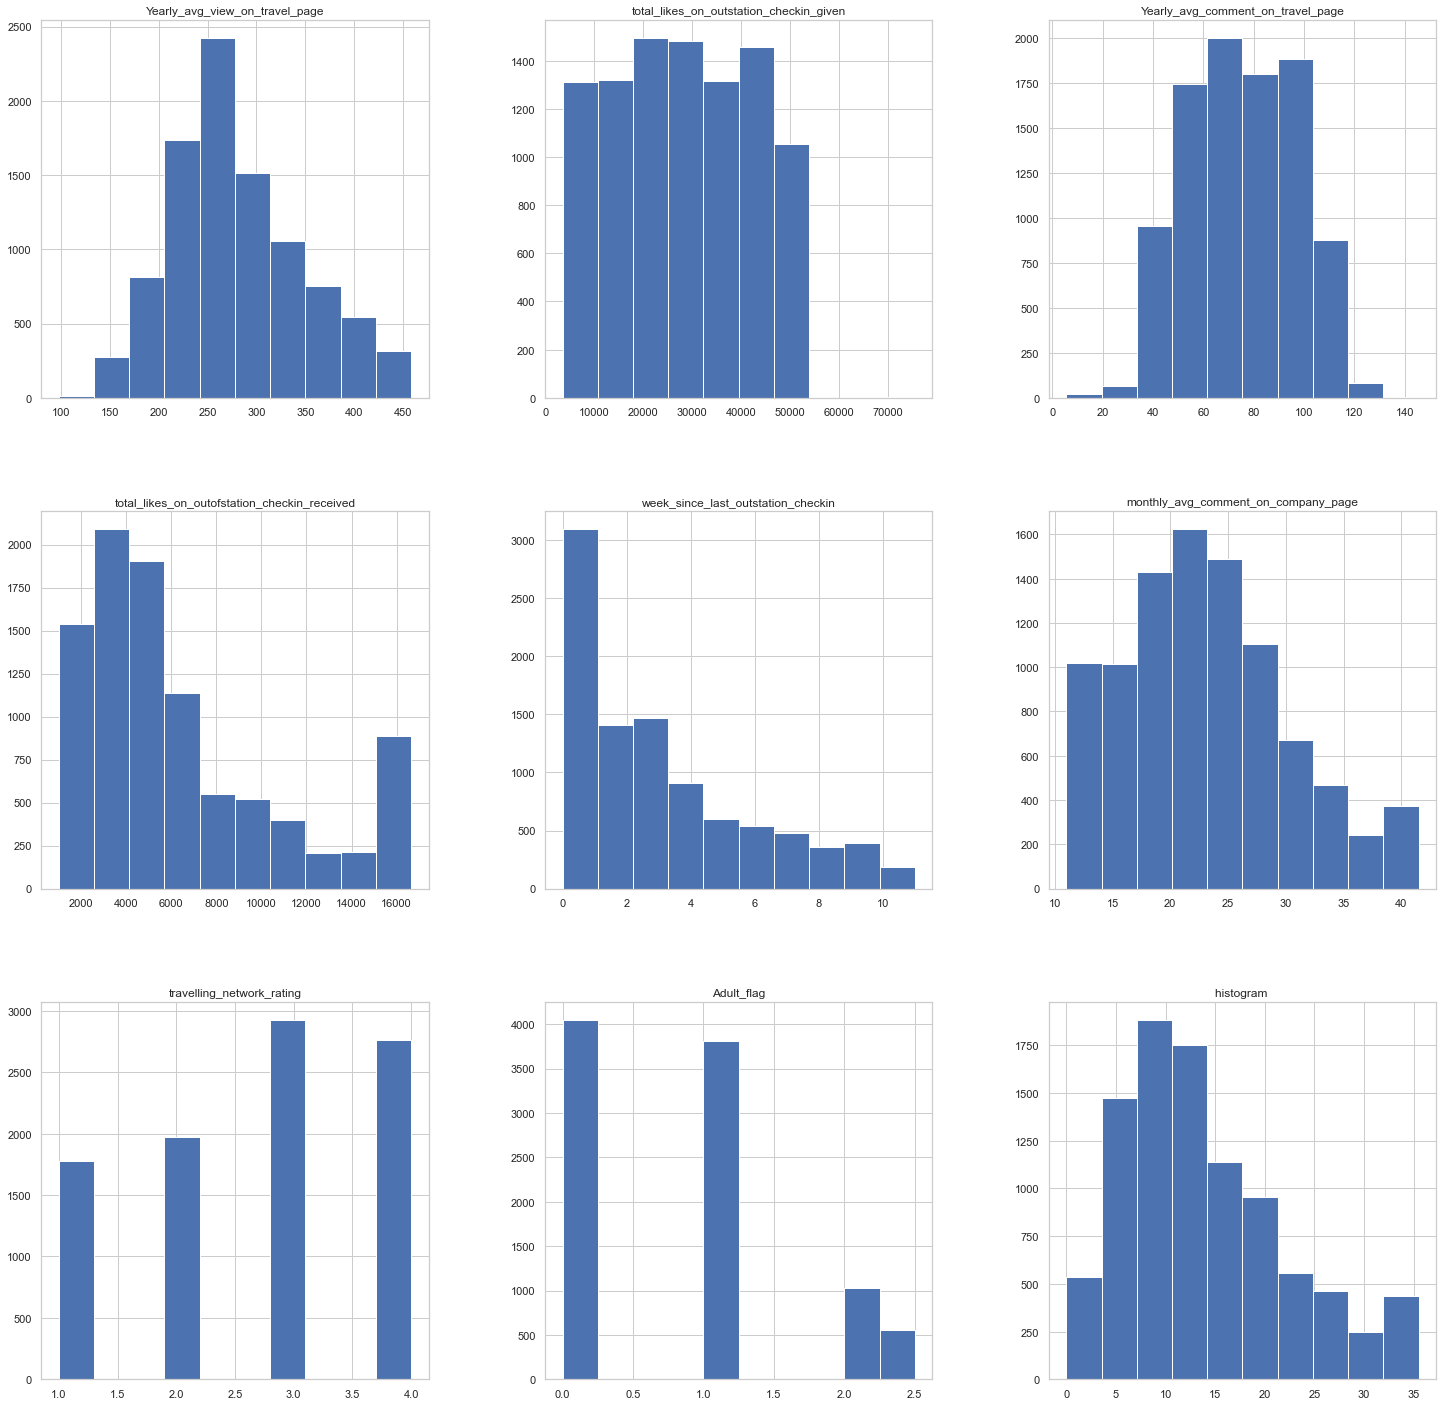

In [ ]:
df_Mobile.hist(figsize=(25,25))
plt.title('histogram ')

strip plots

<AxesSubplot:xlabel='Yearly_avg_view_on_travel_page'>

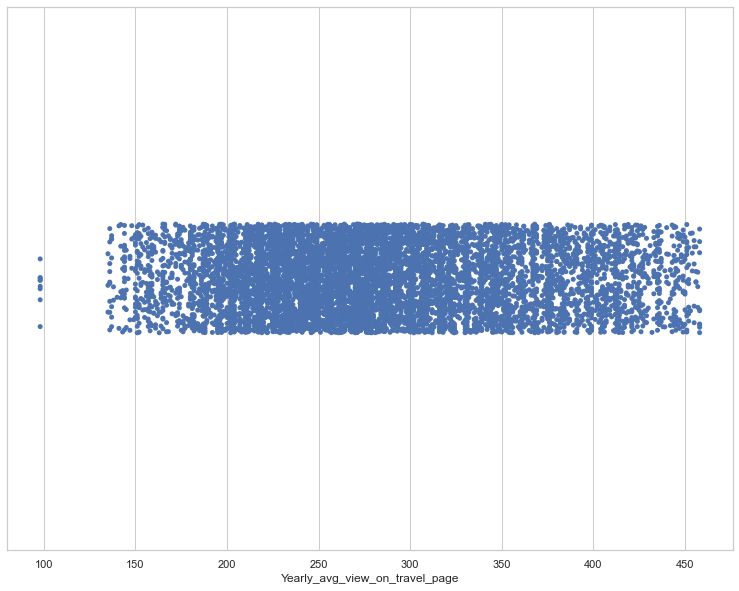

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Yearly_avg_view_on_travel_page',data = df_Mobile)

<AxesSubplot:xlabel='total_likes_on_outstation_checkin_given'>

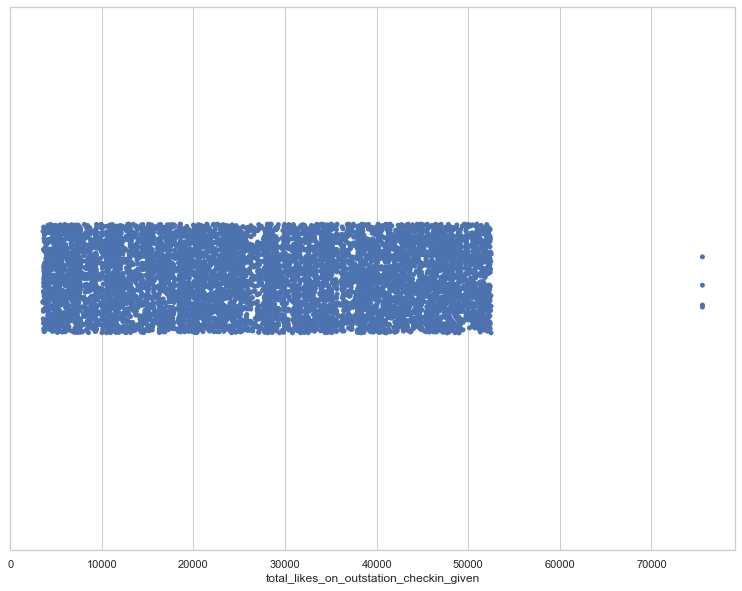

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'total_likes_on_outstation_checkin_given',data = df_Mobile)

<AxesSubplot:xlabel='Yearly_avg_comment_on_travel_page'>

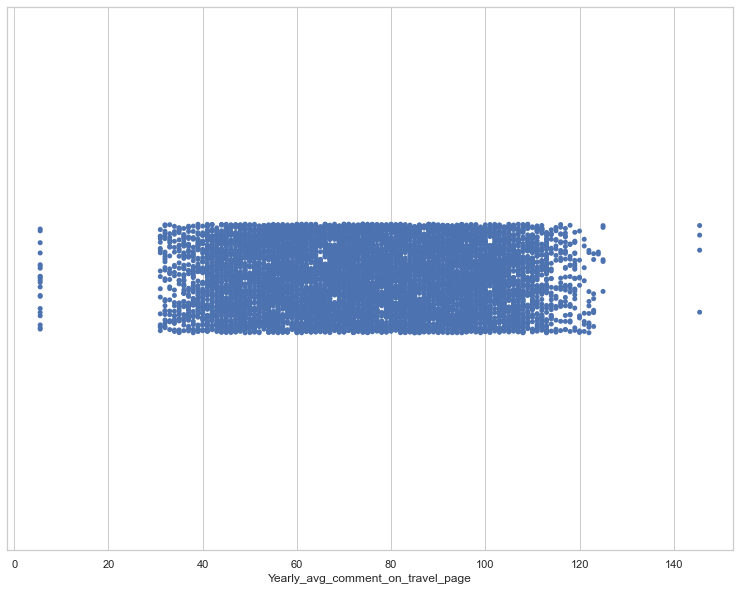

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Yearly_avg_comment_on_travel_page',data = df_Mobile)

<AxesSubplot:xlabel='total_likes_on_outofstation_checkin_received'>

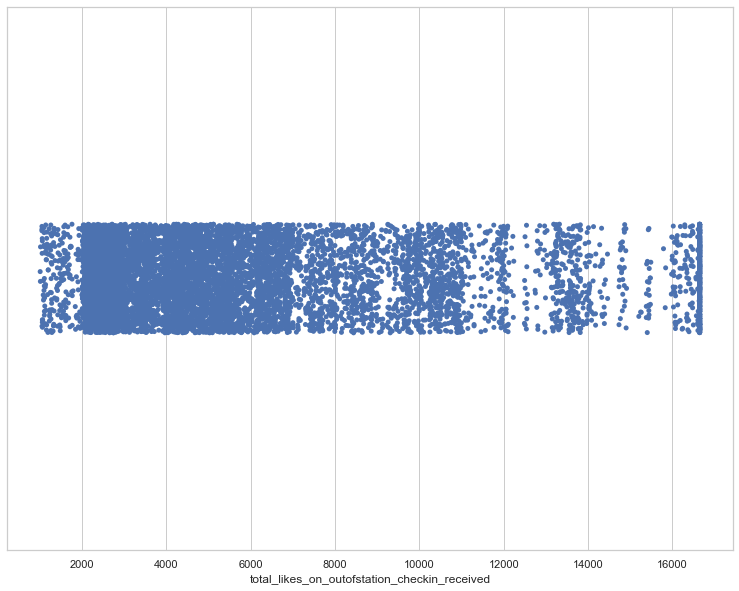

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'total_likes_on_outofstation_checkin_received',data = df_Mobile)

<AxesSubplot:xlabel='week_since_last_outstation_checkin'>

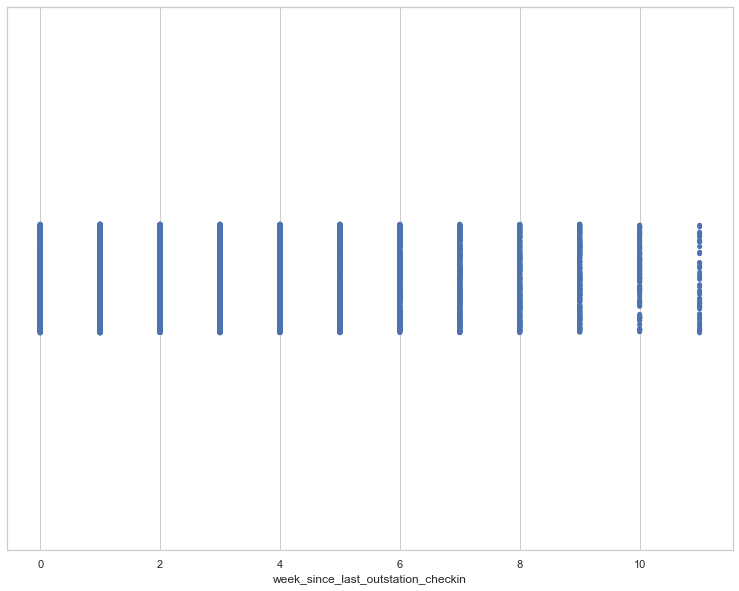

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'week_since_last_outstation_checkin',data = df_Mobile)

<AxesSubplot:xlabel='monthly_avg_comment_on_company_page'>

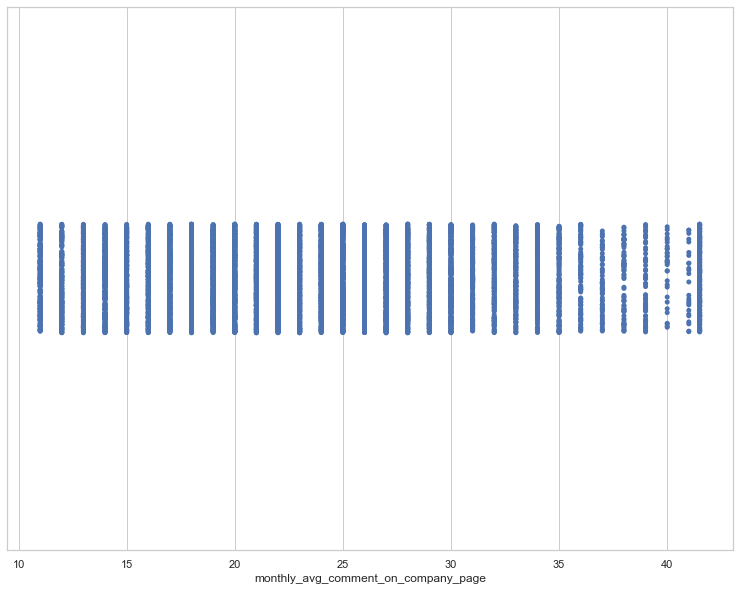

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'monthly_avg_comment_on_company_page',data = df_Mobile)

<AxesSubplot:xlabel='travelling_network_rating'>

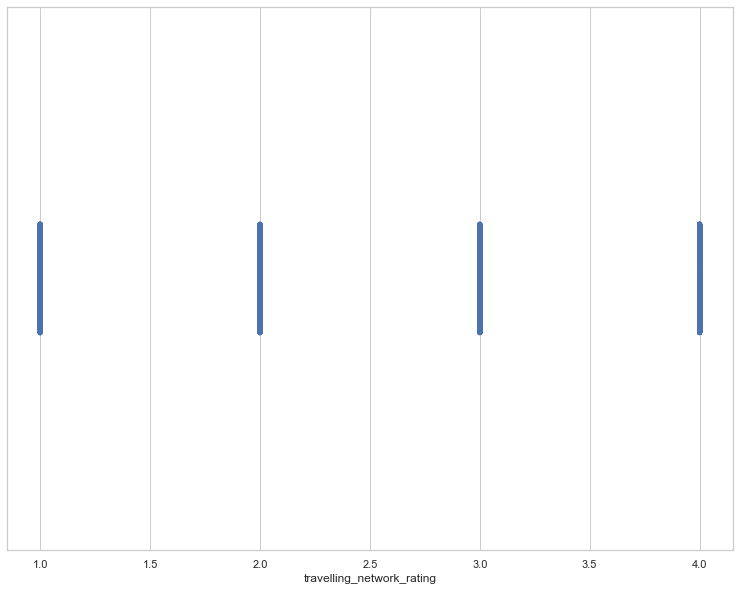

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'travelling_network_rating',data = df_Mobile)

<AxesSubplot:xlabel='Daily_Avg_mins_spend_on_traveling_page'>

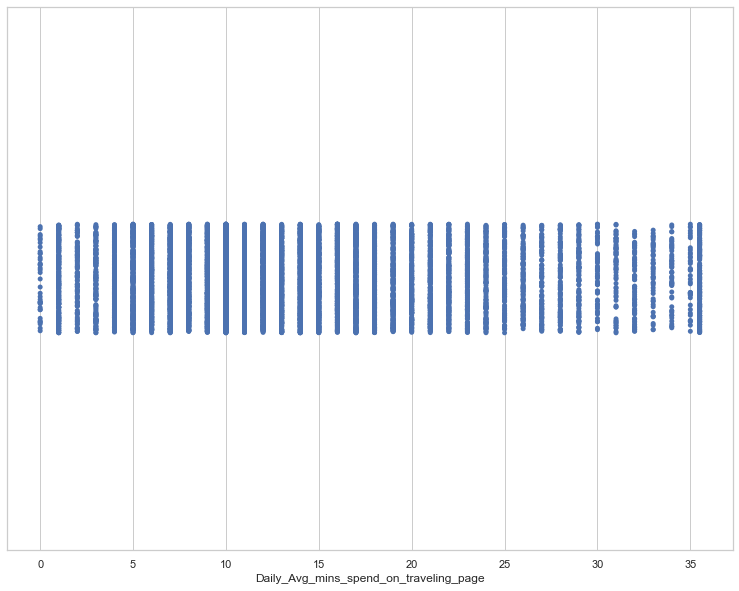

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Daily_Avg_mins_spend_on_traveling_page',data = df_Mobile)

<AxesSubplot:xlabel='Adult_flag'>

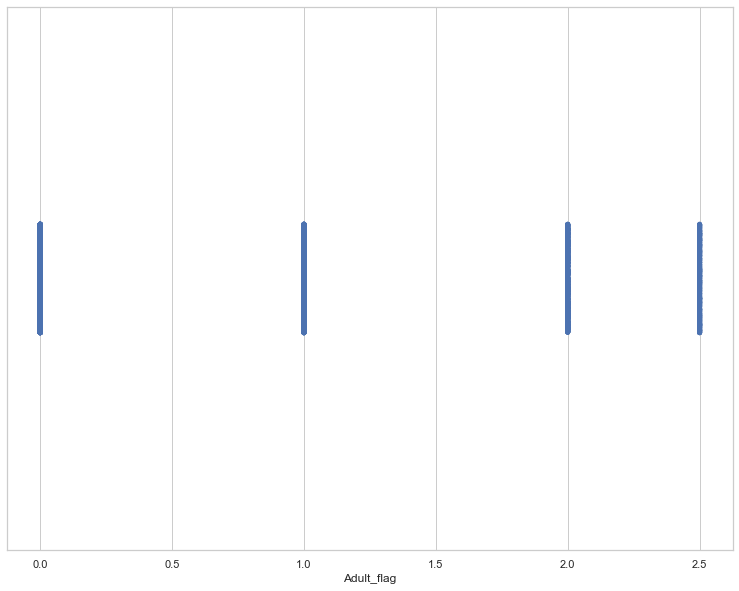

In [ ]:
plt.figure(figsize = (13,10))
sns.stripplot(x = 'Adult_flag',data = df_Mobile)

Text(0.5, 1.0, 'pair plot ')

<Figure size 720x1080 with 0 Axes>

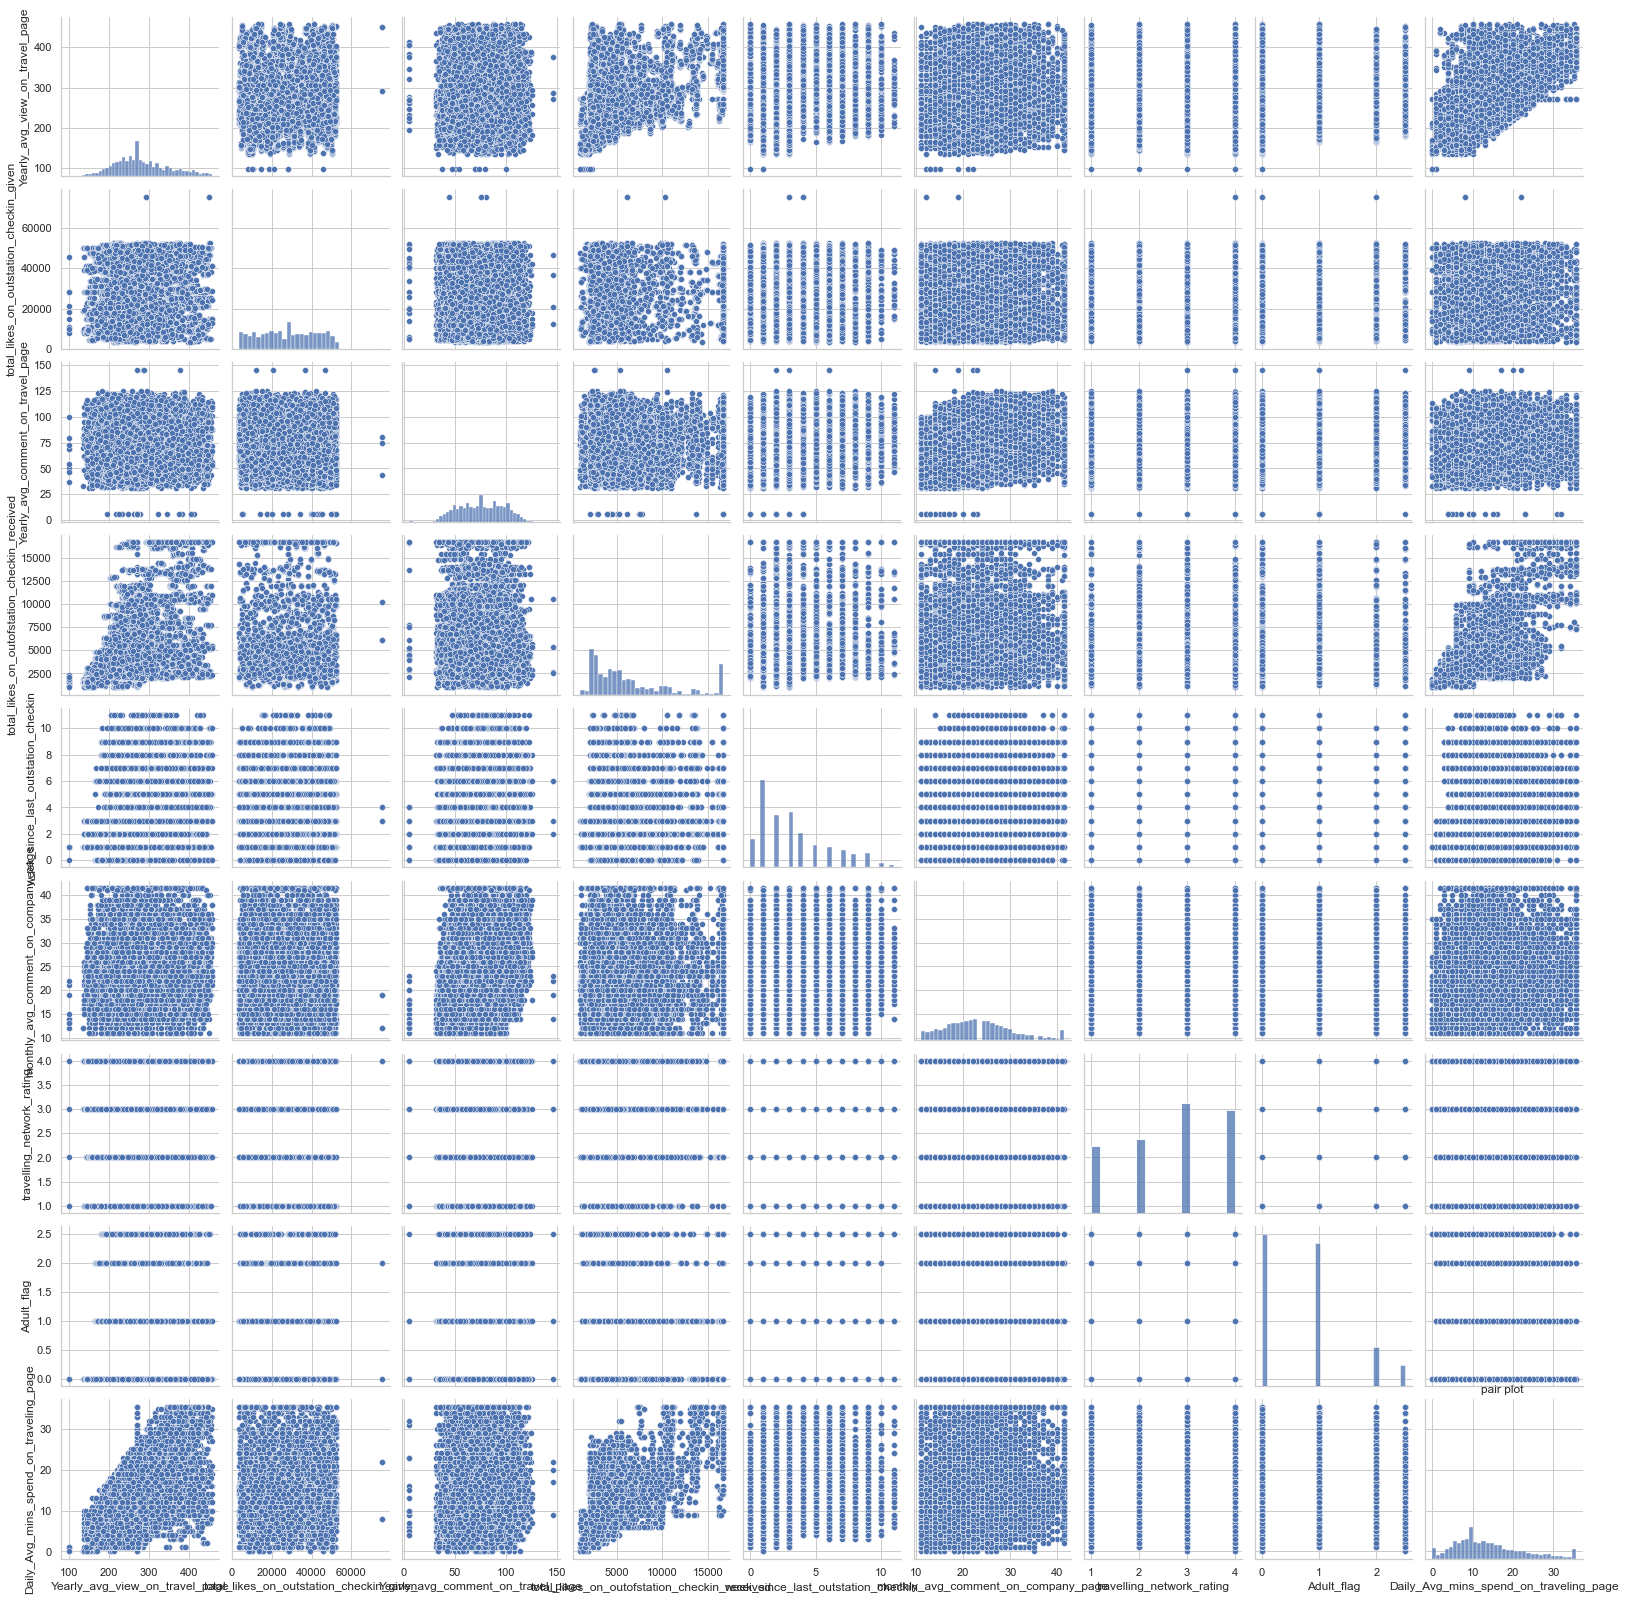

In [ ]:
plt.figure(figsize=(10,15))
sns.pairplot(df_Mobile)
plt.title('pair plot ')

<AxesSubplot:title={'center':'heat map '}>

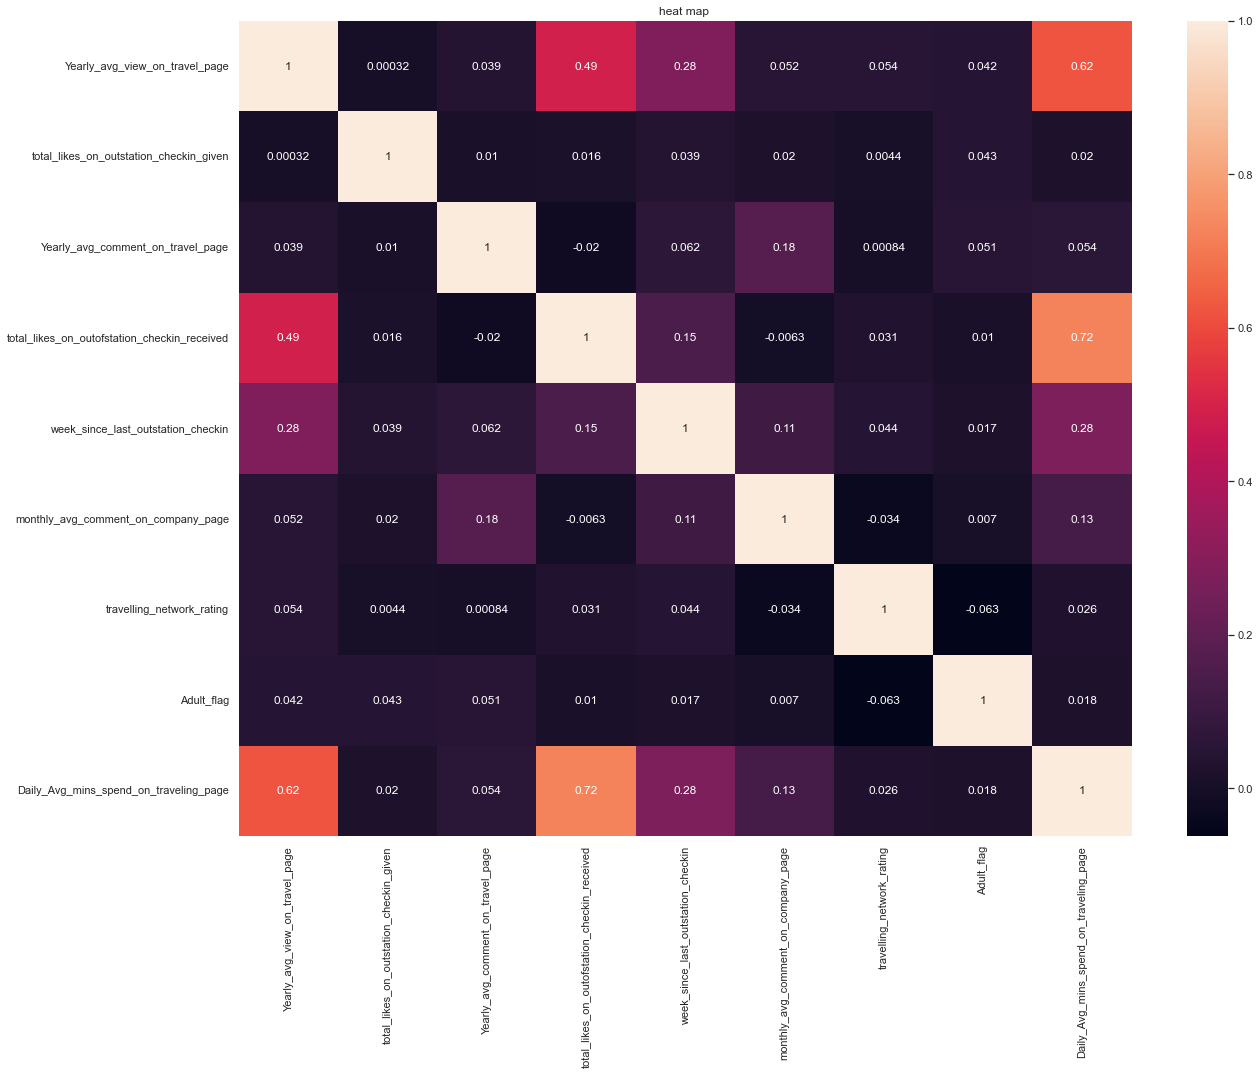

In [ ]:

corr=df_Mobile.corr()
plt.figure(figsize = (20,15))
plt.title('heat map ')
sns.heatmap(corr,annot=True)

Text(0.5, 1.0, 'count plot of Buy_ticket ')

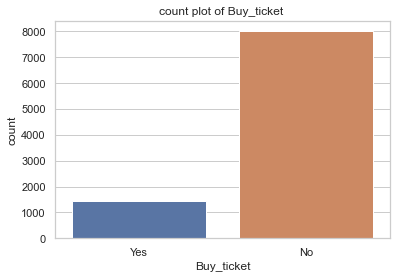

In [ ]:
sns.countplot(data=df_Mobile,x="Buy_ticket")
plt.title('count plot of Buy_ticket ')

<AxesSubplot:title={'center':'count plot of yearly_avg_Outstation_checkins '}, xlabel='yearly_avg_Outstation_checkins', ylabel='count'>

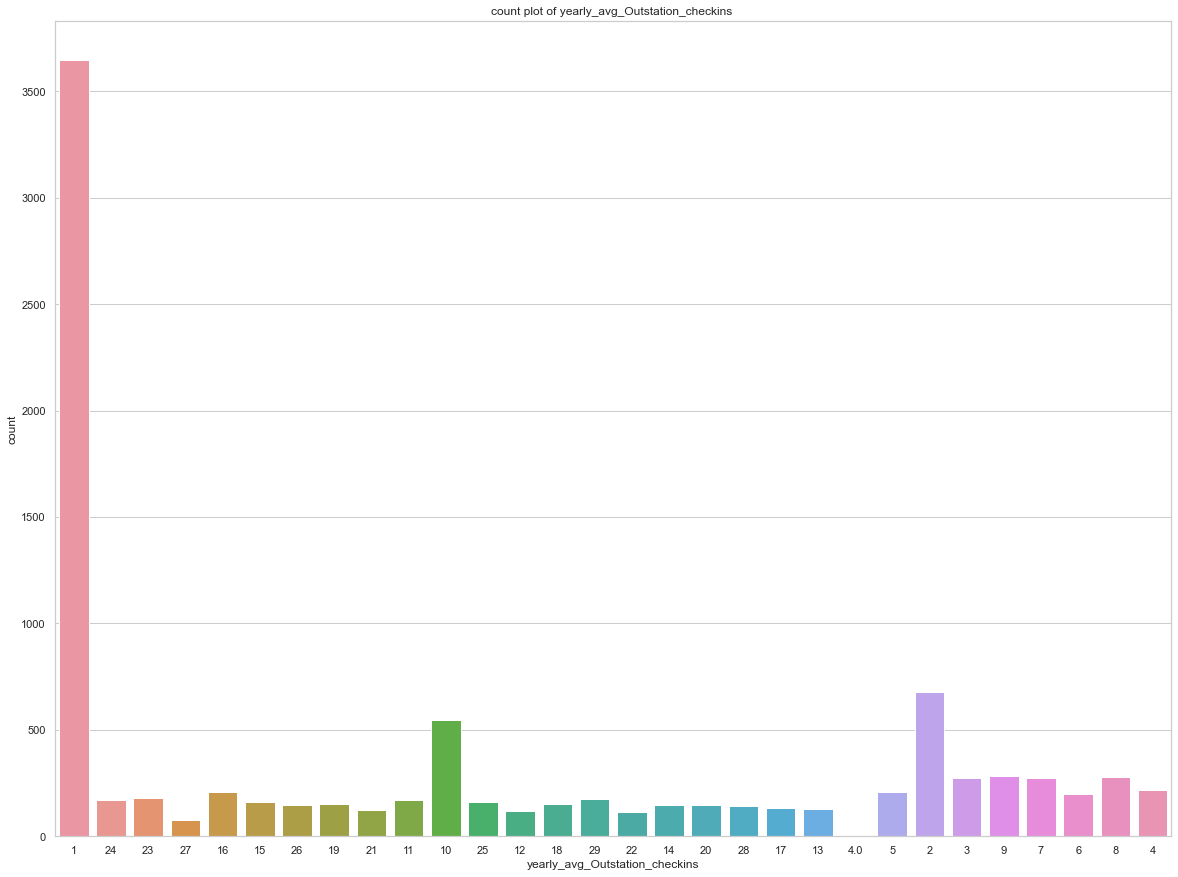

In [ ]:
plt.figure(figsize = (20,15))
plt.title('count plot of yearly_avg_Outstation_checkins ')
sns.countplot(data=df_Mobile,x="yearly_avg_Outstation_checkins")

<AxesSubplot:title={'center':'count plot of member_in_family '}, xlabel='member_in_family', ylabel='count'>

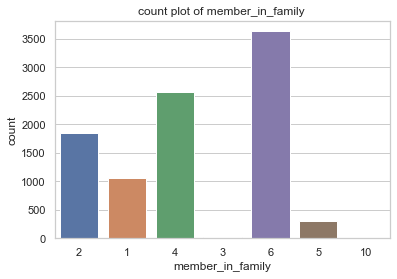

In [ ]:
plt.title('count plot of member_in_family ')
sns.countplot(data=df_Mobile,x="member_in_family")

<AxesSubplot:title={'center':'count plot of preferred_location_type '}, xlabel='preferred_location_type', ylabel='count'>

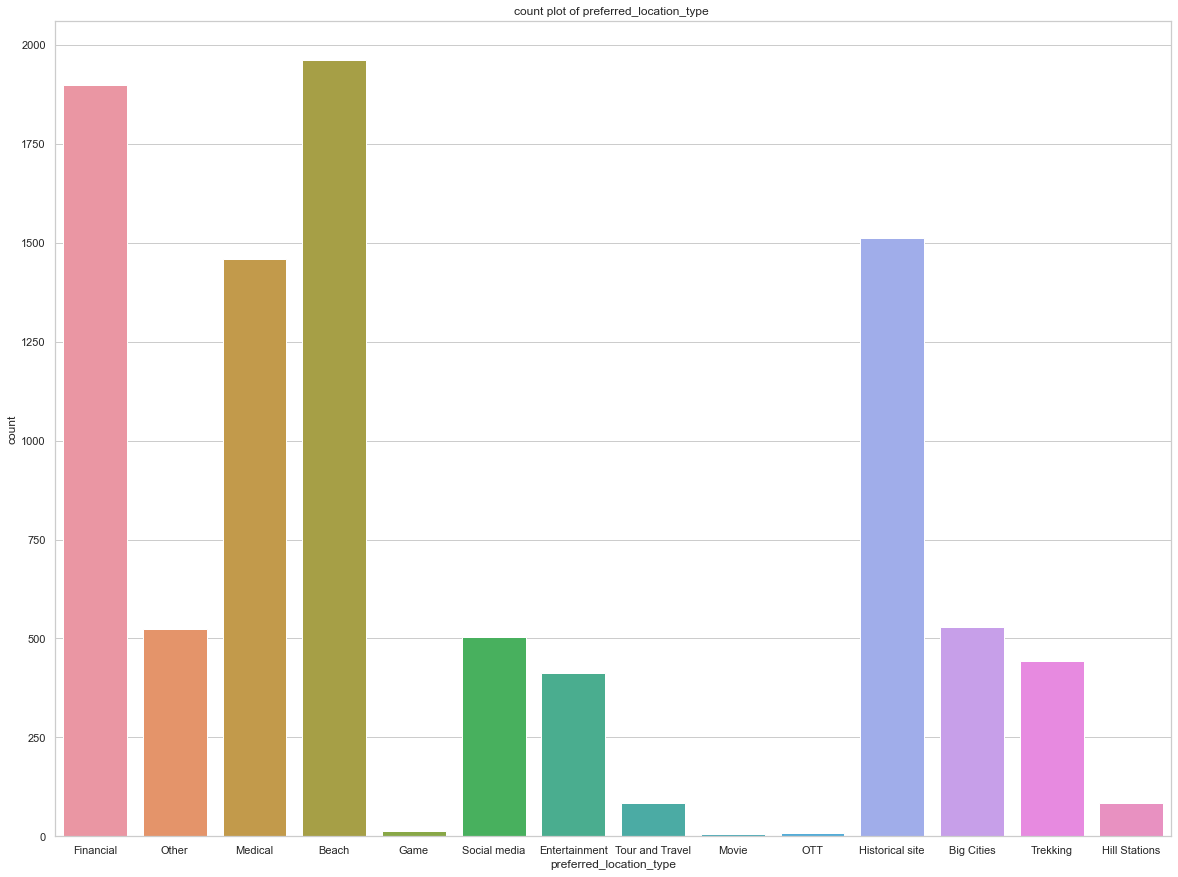

In [ ]:
plt.figure(figsize = (20,15))
plt.title('count plot of preferred_location_type ')
sns.countplot(data=df_Mobile,x="preferred_location_type")

<AxesSubplot:title={'center':'count plot of following_company_page '}, xlabel='following_company_page', ylabel='count'>

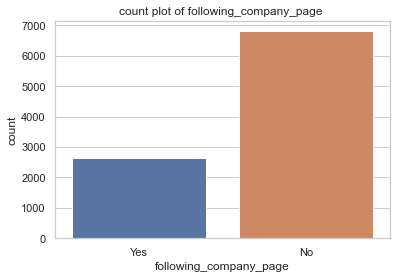

In [ ]:
plt.title('count plot of following_company_page ')
sns.countplot(data=df_Mobile,x="following_company_page")

<AxesSubplot:title={'center':'count plot of working_flag '}, xlabel='working_flag', ylabel='count'>

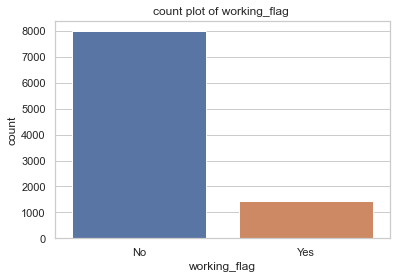

In [ ]:
plt.title('count plot of working_flag ')
sns.countplot(data=df_Mobile,x="working_flag")

<AxesSubplot:title={'center':'bar plot of member_in_family and Buy_ticket '}, xlabel='member_in_family', ylabel='count'>

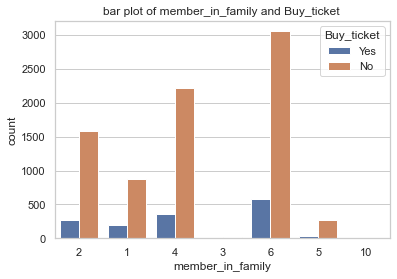

In [ ]:
plt.title('bar plot of member_in_family and Buy_ticket ')
sns.countplot(data=df_Mobile,x="member_in_family",hue='Buy_ticket')

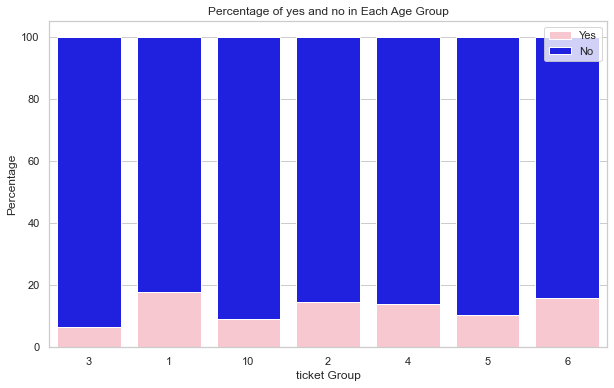

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# You might want to replace these example values with your actual data
ticket_group_data = df_Mobile.groupby(['member_in_family', 'Buy_ticket']).size().unstack(fill_value=0)

# Calculate the percentage for each age group
ticket_group_data['total'] = ticket_group_data['Yes'] + ticket_group_data['No']
ticket_group_data['Yes_percent'] = ticket_group_data['Yes'] / ticket_group_data['total'] * 100
ticket_group_data['No_percent'] = ticket_group_data['No'] / ticket_group_data['total'] * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_group_data.index, y=ticket_group_data['Yes_percent'], color='pink', label='Yes')
sns.barplot(x=ticket_group_data.index, y=ticket_group_data['No_percent'], color='blue', bottom=ticket_group_data['Yes_percent'], label='No')

plt.xlabel('ticket Group')
plt.ylabel('Percentage')
plt.title('Percentage of yes and no in Each Age Group')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'count plot of preferred_location_type and member_in_family'}, xlabel='preferred_location_type', ylabel='count'>

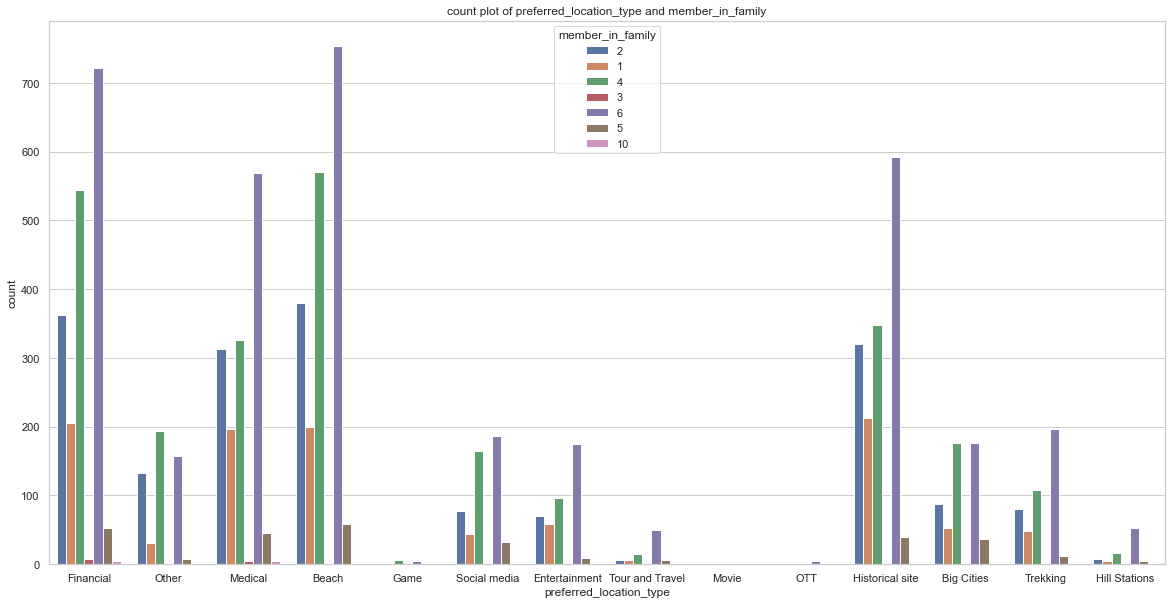

In [ ]:
plt.figure(figsize = (20,10))
plt.title('count plot of preferred_location_type and member_in_family')
sns.countplot(data=df_Mobile,x="preferred_location_type",hue="member_in_family")

<AxesSubplot:title={'center':'bar plot of member_in_family and Yearly_avg_comment_on_travel_page '}, xlabel='member_in_family', ylabel='Yearly_avg_comment_on_travel_page'>

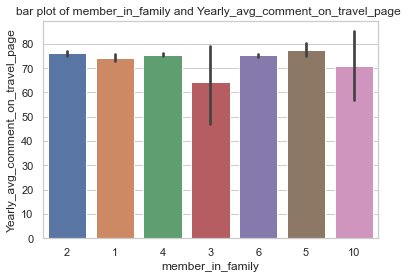

In [ ]:
plt.title('bar plot of member_in_family and Yearly_avg_comment_on_travel_page ')
sns.barplot(data=df_Mobile, x='member_in_family', y='Yearly_avg_comment_on_travel_page')

<AxesSubplot:title={'center':'bar plot of member_in_family and Yearly_avg_view_on_travel_page '}, xlabel='member_in_family', ylabel='Yearly_avg_view_on_travel_page'>

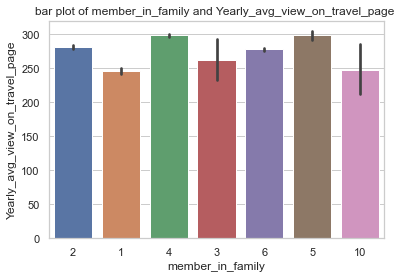

In [ ]:
plt.title('bar plot of member_in_family and Yearly_avg_view_on_travel_page ')
sns.barplot(data=df_Mobile, x='member_in_family', y='Yearly_avg_view_on_travel_page')

<AxesSubplot:title={'center':'bar plot of preferred_location_type and Yearly_avg_view_on_travel_page '}, xlabel='preferred_location_type', ylabel='Yearly_avg_view_on_travel_page'>

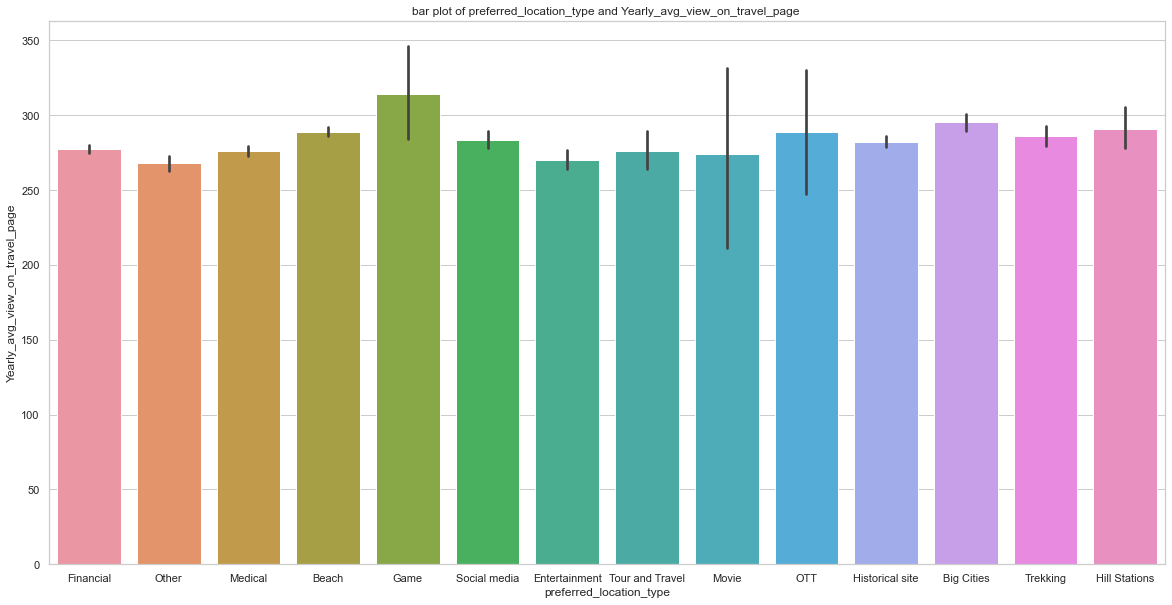

In [ ]:
plt.figure(figsize = (20,10))
plt.title('bar plot of preferred_location_type and Yearly_avg_view_on_travel_page ')
sns.barplot(data=df_Mobile, x='preferred_location_type', y='Yearly_avg_view_on_travel_page')

<AxesSubplot:title={'center':'line plot of preferred_location_type and week_since_last_outstation_checkin '}, xlabel='preferred_location_type', ylabel='week_since_last_outstation_checkin'>

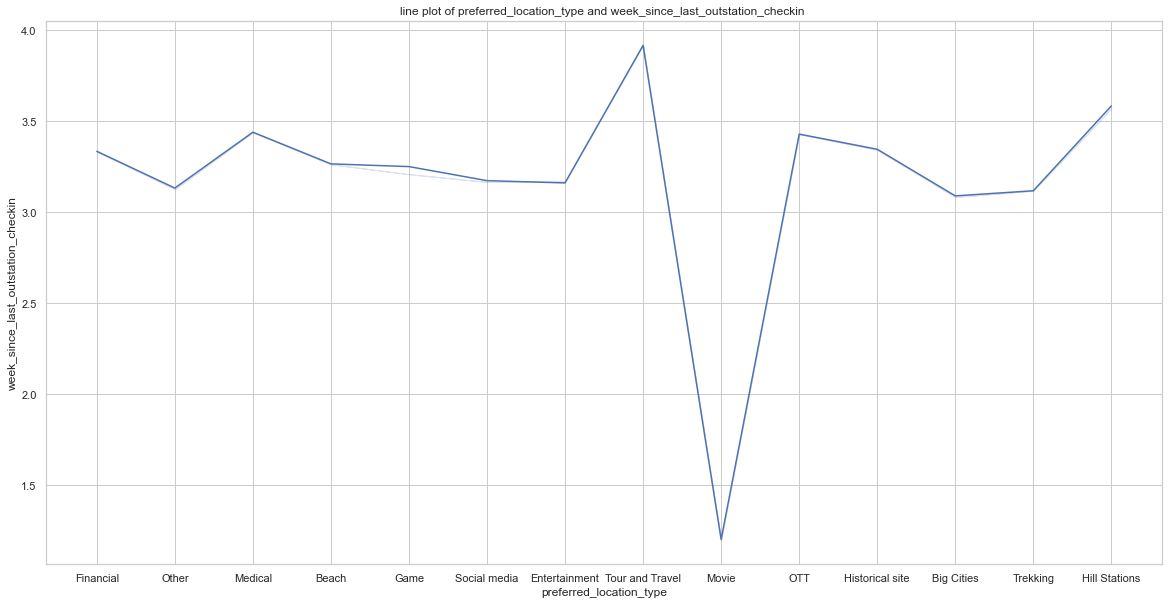

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of preferred_location_type and week_since_last_outstation_checkin ')
sns.lineplot(data=df_Mobile, x='preferred_location_type', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and week_since_last_outstation_checkin '}, xlabel='Buy_ticket', ylabel='week_since_last_outstation_checkin'>

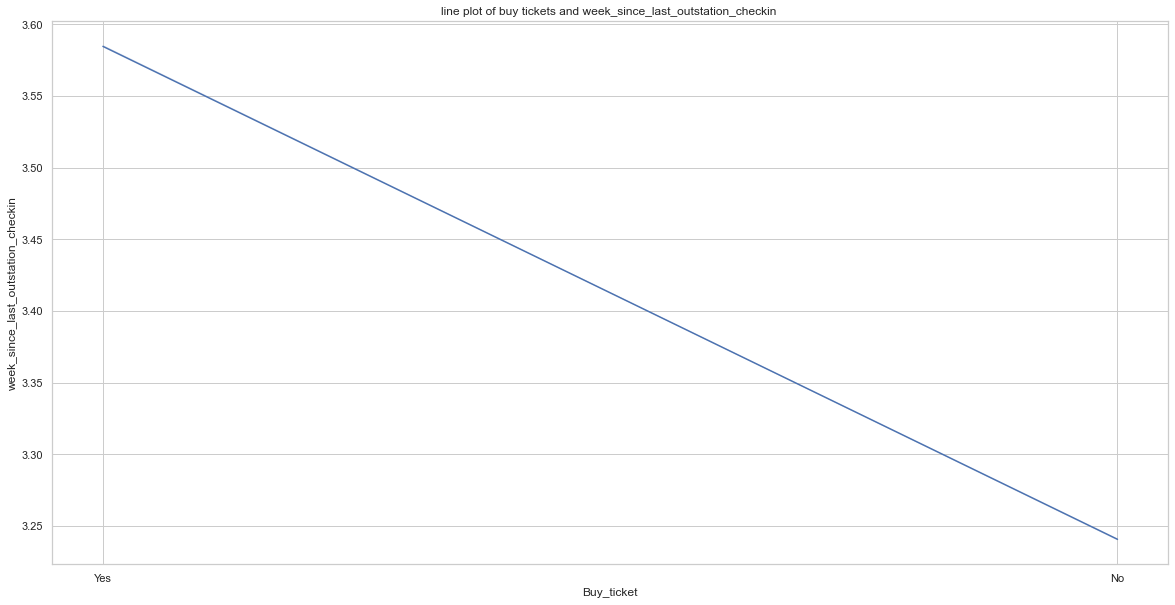

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and week_since_last_outstation_checkin ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and Yearly_avg_view_on_travel_page '}, xlabel='Buy_ticket', ylabel='Yearly_avg_view_on_travel_page'>

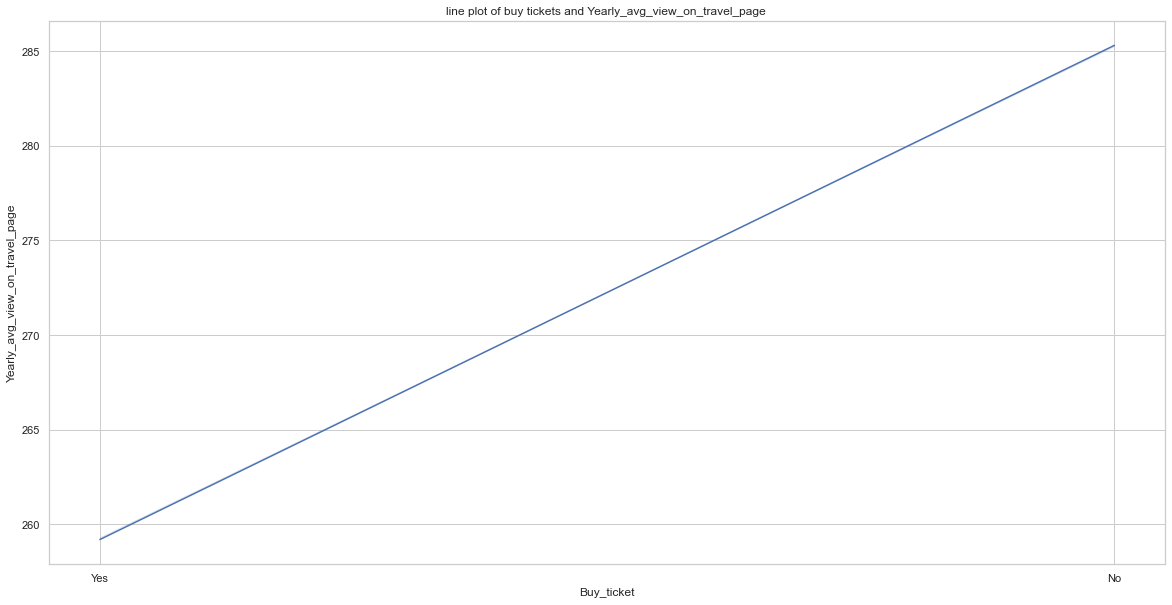

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and Yearly_avg_view_on_travel_page ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='Yearly_avg_view_on_travel_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and total_likes_on_outstation_checkin_given '}, xlabel='Buy_ticket', ylabel='total_likes_on_outstation_checkin_given'>

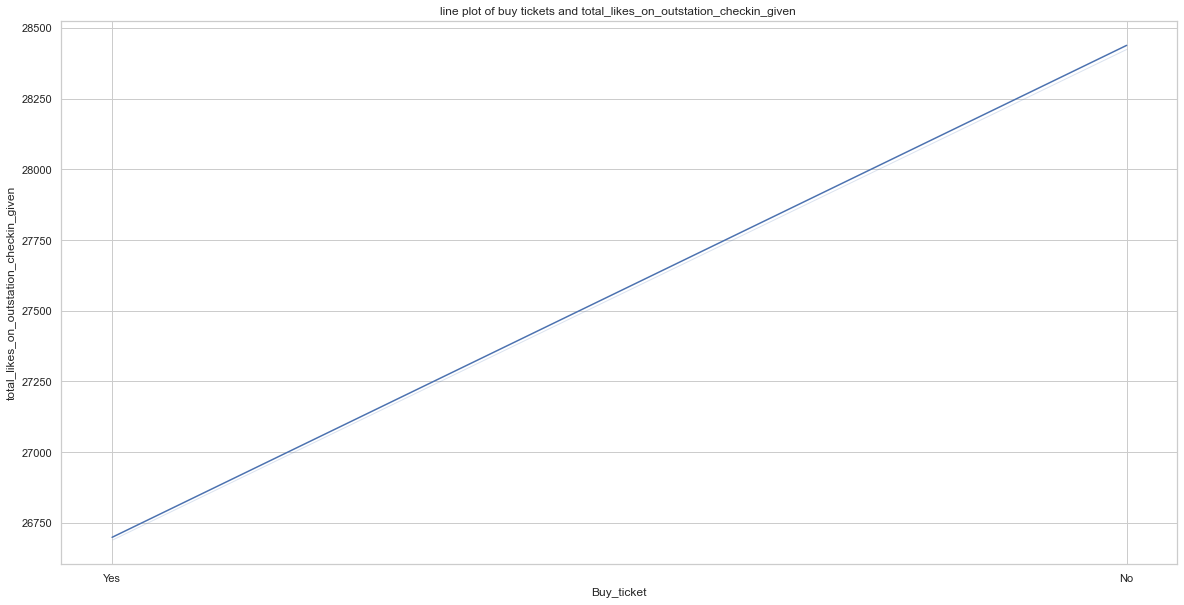

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and total_likes_on_outstation_checkin_given ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='total_likes_on_outstation_checkin_given',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and total_likes_on_outofstation_checkin_received '}, xlabel='Buy_ticket', ylabel='total_likes_on_outofstation_checkin_received'>

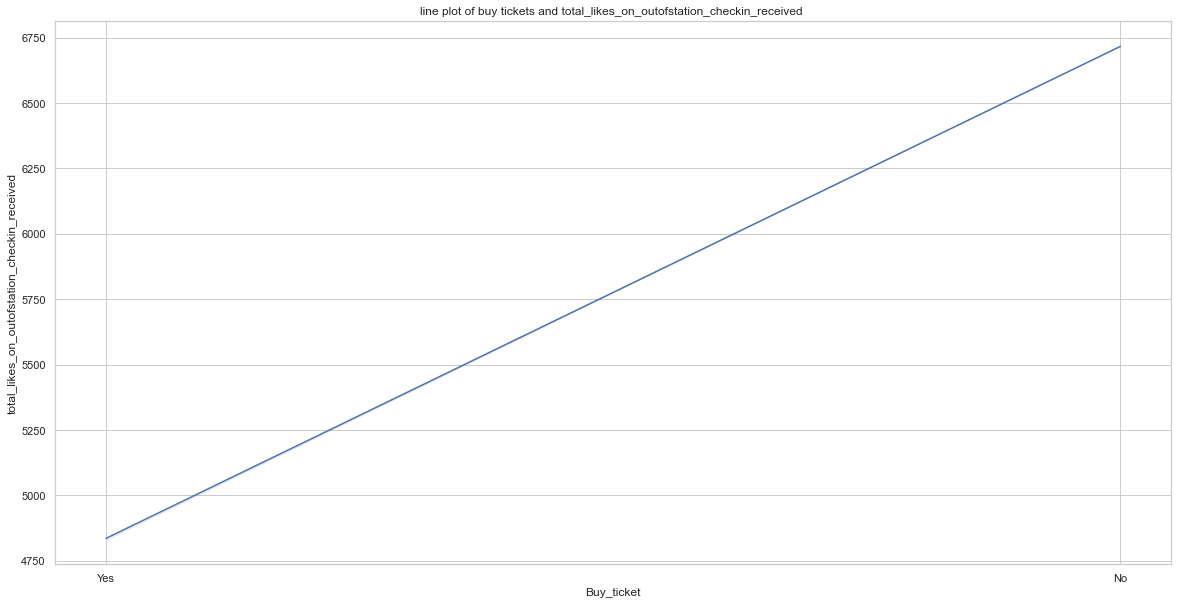

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and total_likes_on_outofstation_checkin_received ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='total_likes_on_outofstation_checkin_received',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and week_since_last_outstation_checkin '}, xlabel='Buy_ticket', ylabel='week_since_last_outstation_checkin'>

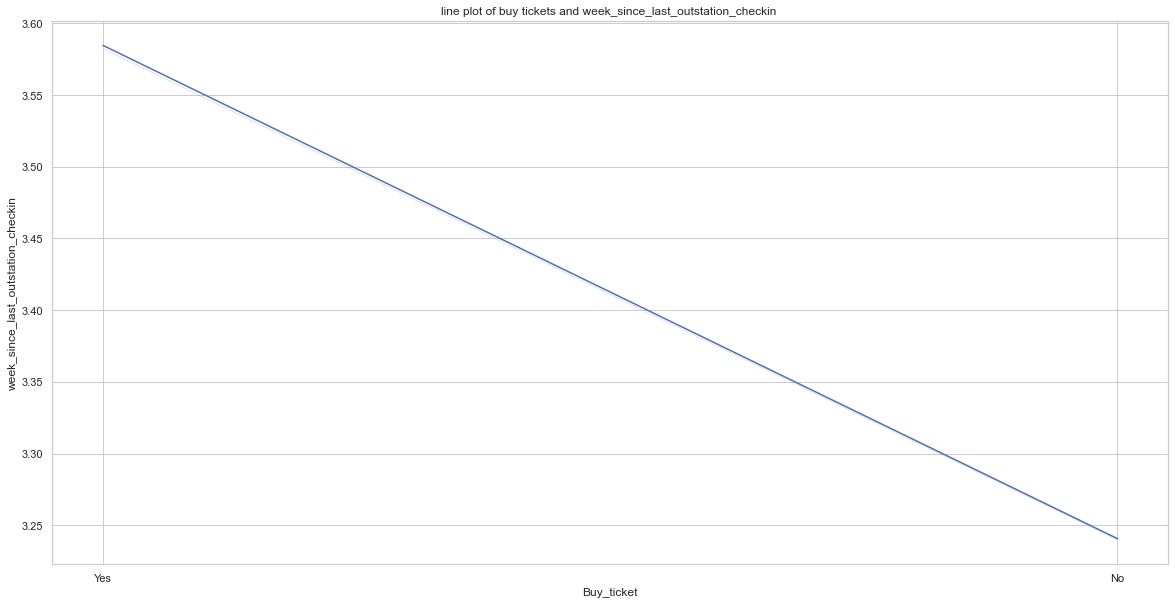

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and week_since_last_outstation_checkin ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='week_since_last_outstation_checkin',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and monthly_avg_comment_on_company_page '}, xlabel='Buy_ticket', ylabel='monthly_avg_comment_on_company_page'>

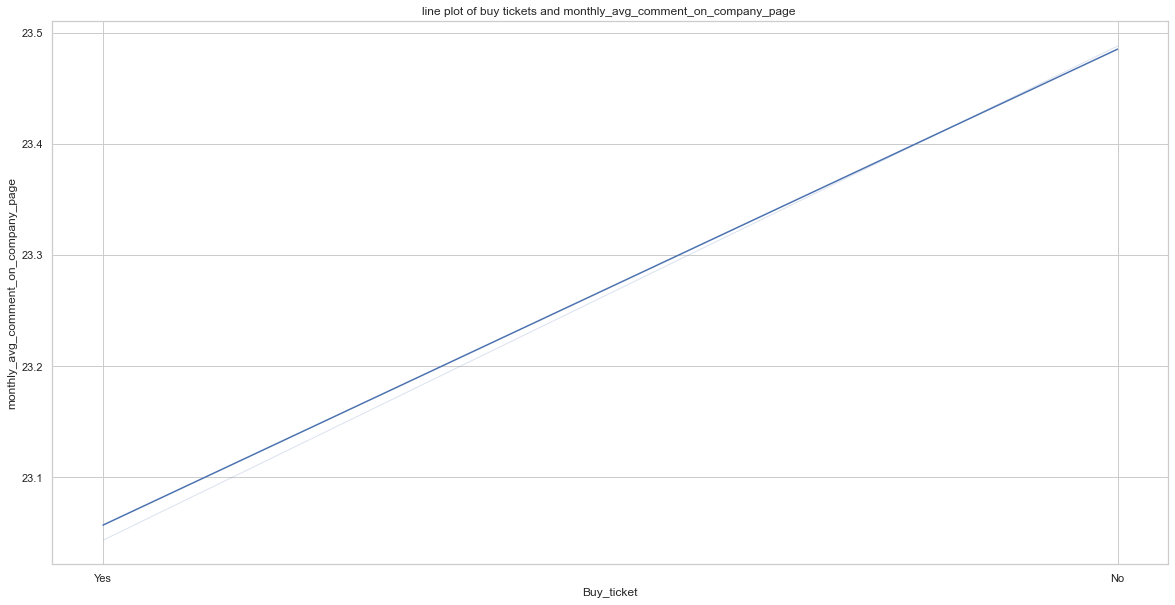

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and monthly_avg_comment_on_company_page ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='monthly_avg_comment_on_company_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and travelling_network_rating '}, xlabel='Buy_ticket', ylabel='travelling_network_rating'>

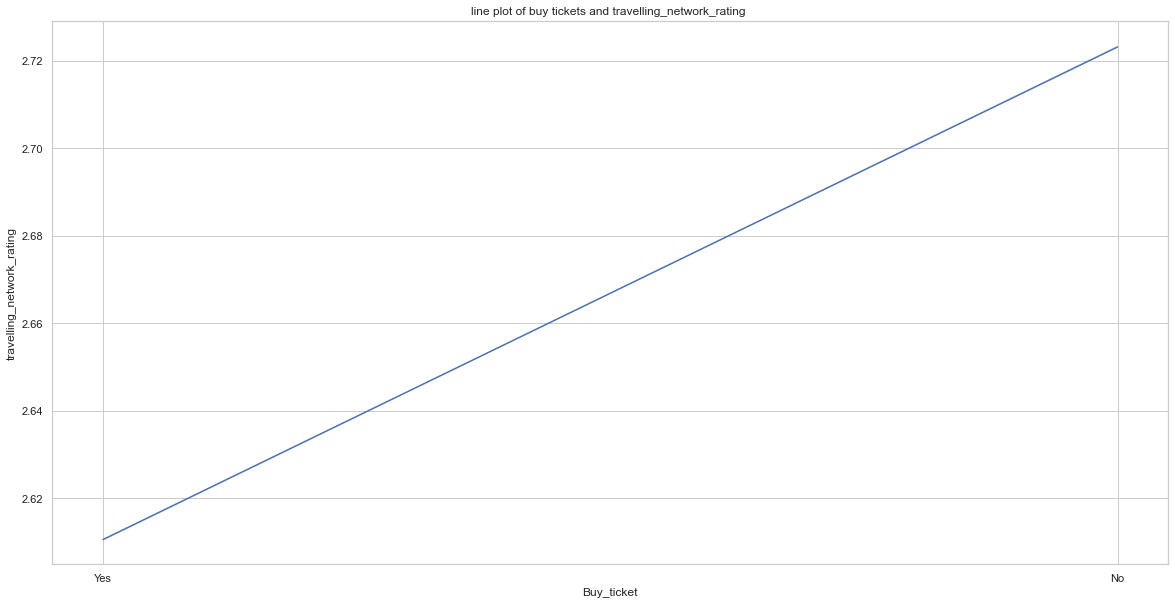

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and travelling_network_rating ')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='travelling_network_rating',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and Daily_Avg_mins_spend_on_traveling_page'}, xlabel='Buy_ticket', ylabel='Daily_Avg_mins_spend_on_traveling_page'>

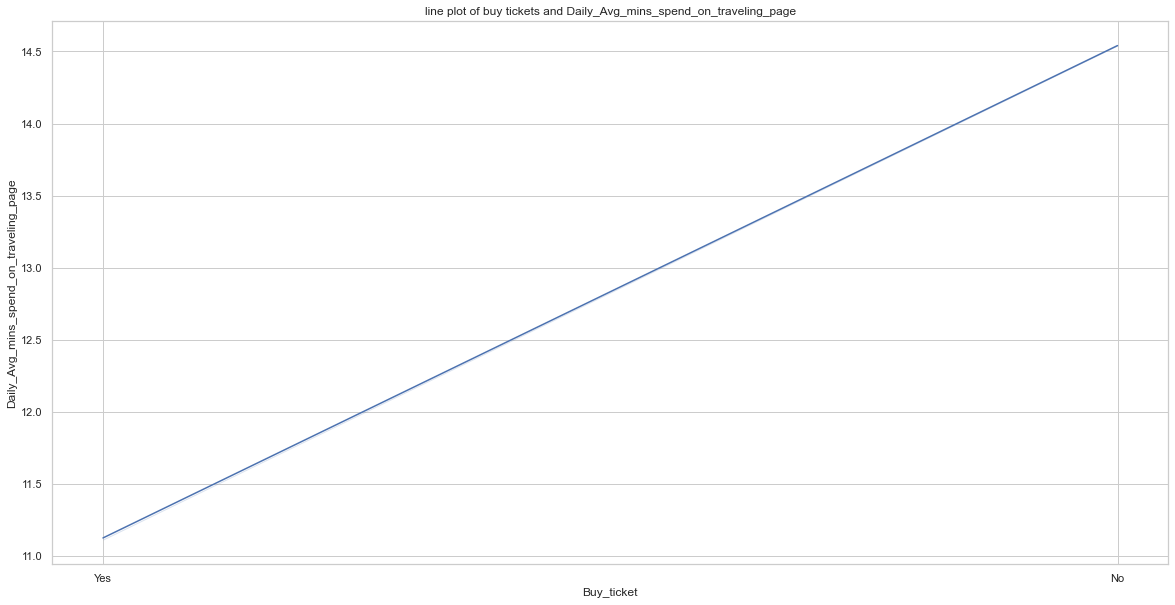

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and Daily_Avg_mins_spend_on_traveling_page')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='Daily_Avg_mins_spend_on_traveling_page',ci=False)

<AxesSubplot:title={'center':'line plot of buy tickets and adult flag'}, xlabel='Buy_ticket', ylabel='Adult_flag'>

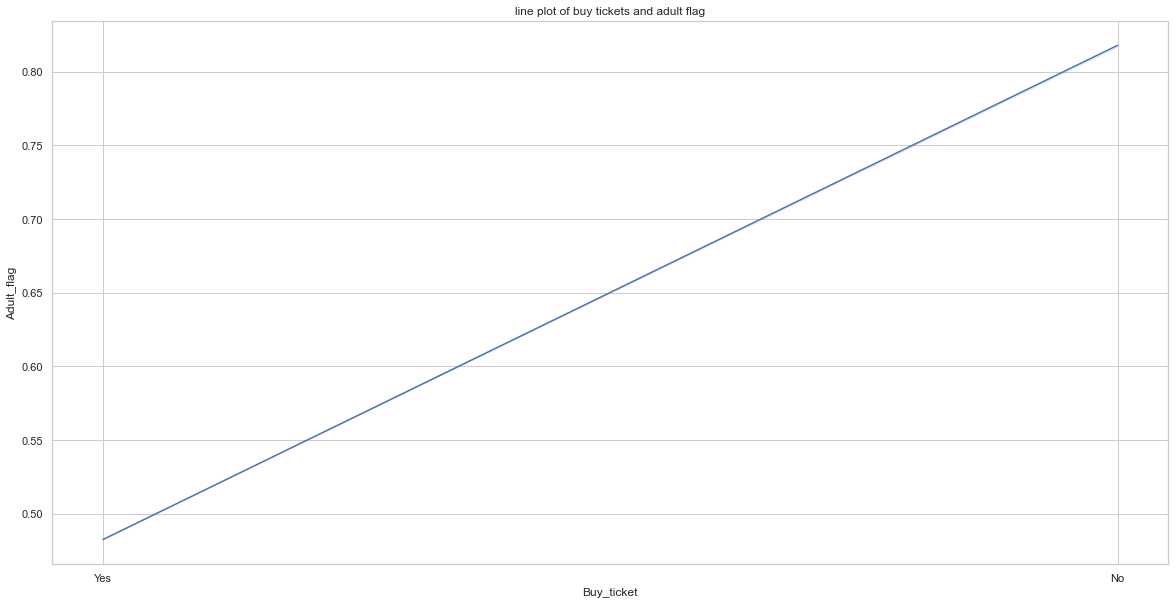

In [ ]:
plt.figure(figsize = (20,10))
plt.title('line plot of buy tickets and adult flag')
sns.lineplot(data=df_Mobile, x='Buy_ticket', y='Adult_flag',ci=False)

## MODEL BUIDING

### df_laptop

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
cols = ['Buy_ticket','following_company_page','working_flag']
#
# Encode labels of multiple columns at once
#
df_laptop[cols] = df_laptop[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_laptop.head()

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
5881           0                           379.0           Laptop   
5883           0                           255.0           Laptop   
5885           0                           250.0           Laptop   
5888           0                           295.0           Laptop   
5906           1                           250.0           Laptop   

      total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
5881                                   9776.0                              8   
5883                                  48725.0                              3   
5885                                  35184.0                              2   
5888                                   7572.0                             23   
5906                                  39379.0                             16   

     member_in_family preferred_location_type  \
5881                1                   Beach   
5883                4                   Beach   
5885                2                   Beach   
5888                6                   Beach   
5906                1                   Beach   

      Yearly_avg_comment_on_travel_page  \
5881                               64.0   
5883                               59.0   
5885                               84.0   
5888                               48.0   
5906                               80.0   

      total_likes_on_outofstation_checkin_received  \
5881                                        5142.0   
5883                                        2913.0   
5885                                        3074.0   
5888                                        9532.0   
5906                                        3926.0   

      week_since_last_outstation_checkin  following_company_page  \
5881                                 1.0                       0   
5883                                 1.0                       1   
5885                                 0.0                       0   
5888                                 0.0                       0   
5906                                 1.0                       1   

      monthly_avg_comment_on_company_page  working_flag  \
5881                                 33.0             1   
5883                                 19.0             0   
5885                                 23.0             0   
5888                                 33.0             1   
5906                                 33.0             1   

      travelling_network_rating  Adult_flag  \
5881                        4.0         1.0   
5883                        3.0         0.0   
5885                        3.0         0.0   
5888                        2.0         0.0   
5906                        2.0         0.0   

      Daily_Avg_mins_spend_on_traveling_page  
5881                                    10.0  
5883                                     8.0  
5885                                     8.0  
5888                                    10.0  
5906                                    10.0

In [ ]:
df_laptop = pd.get_dummies(df_laptop, columns=["yearly_avg_Outstation_checkins",'member_in_family','preferred_location_type'], drop_first=True)
df_laptop.head()

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
5881           0                           379.0           Laptop   
5883           0                           255.0           Laptop   
5885           0                           250.0           Laptop   
5888           0                           295.0           Laptop   
5906           1                           250.0           Laptop   

      total_likes_on_outstation_checkin_given  \
5881                                   9776.0   
5883                                  48725.0   
5885                                  35184.0   
5888                                   7572.0   
5906                                  39379.0   

      Yearly_avg_comment_on_travel_page  \
5881                               64.0   
5883                               59.0   
5885                               84.0   
5888                               48.0   
5906                               80.0   

      total_likes_on_outofstation_checkin_received  \
5881                                        5142.0   
5883                                        2913.0   
5885                                        3074.0   
5888                                        9532.0   
5906                                        3926.0   

      week_since_last_outstation_checkin  following_company_page  \
5881                                 1.0                       0   
5883                                 1.0                       1   
5885                                 0.0                       0   
5888                                 0.0                       0   
5906                                 1.0                       1   

      monthly_avg_comment_on_company_page  working_flag  ...  \
5881                                 33.0             1  ...   
5883                                 19.0             0  ...   
5885                                 23.0             0  ...   
5888                                 33.0             1  ...   
5906                                 33.0             1  ...   

      yearly_avg_Outstation_checkins_9  member_in_family_2  \
5881                                 0                   0   
5883                                 0                   0   
5885                                 0                   1   
5888                                 0                   0   
5906                                 0                   0   

      member_in_family_4  member_in_family_5  member_in_family_6  \
5881                   0                   0                   0   
5883                   1                   0                   0   
5885                   0                   0                   0   
5888                   0                   0                   1   
5906                   0                   0                   0   

      preferred_location_type_Big Cities  \
5881                                   0   
5883                                   0   
5885                                   0   
5888                                   0   
5906                                   0   

      preferred_location_type_Hill Stations  \
5881                                      0   
5883                                      0   
5885                                      0   
5888                                      0   
5906                                      0   

      preferred_location_type_Historical site  preferred_location_type_Other  \
5881                                        0                              0   
5883                                        0                              0   
5885                                        0                              0   
5888                                        0                              0   
5906                                        0                              0   

      preferred_location_type_Trekking  
5881                                 0  
5883                     

In [ ]:
df_laptop = df_laptop.drop('preferred_device', axis=1)

In [ ]:
df_laptop.head()

Buy_ticket  Yearly_avg_view_on_travel_page  \
5881           0                           379.0   
5883           0                           255.0   
5885           0                           250.0   
5888           0                           295.0   
5906           1                           250.0   

      total_likes_on_outstation_checkin_given  \
5881                                   9776.0   
5883                                  48725.0   
5885                                  35184.0   
5888                                   7572.0   
5906                                  39379.0   

      Yearly_avg_comment_on_travel_page  \
5881                               64.0   
5883                               59.0   
5885                               84.0   
5888                               48.0   
5906                               80.0   

      total_likes_on_outofstation_checkin_received  \
5881                                        5142.0   
5883                                        2913.0   
5885                                        3074.0   
5888                                        9532.0   
5906                                        3926.0   

      week_since_last_outstation_checkin  following_company_page  \
5881                                 1.0                       0   
5883                                 1.0                       1   
5885                                 0.0                       0   
5888                                 0.0                       0   
5906                                 1.0                       1   

      monthly_avg_comment_on_company_page  working_flag  \
5881                                 33.0             1   
5883                                 19.0             0   
5885                                 23.0             0   
5888                                 33.0             1   
5906                                 33.0             1   

      travelling_network_rating  ...  yearly_avg_Outstation_checkins_9  \
5881                        4.0  ...                                 0   
5883                        3.0  ...                                 0   
5885                        3.0  ...                                 0   
5888                        2.0  ...                                 0   
5906                        2.0  ...                                 0   

      member_in_family_2  member_in_family_4  member_in_family_5  \
5881                   0                   0                   0   
5883                   0                   1                   0   
5885                   1                   0                   0   
5888                   0                   0                   0   
5906                   0                   0                   0   

      member_in_family_6  preferred_location_type_Big Cities  \
5881                   0                                   0   
5883                   0                                   0   
5885                   0                                   0   
5888                   1                                   0   
5906                   0                                   0   

      preferred_location_type_Hill Stations  \
5881                                      0   
5883                                      0   
5885                                      0   
5888                                      0   
5906                                      0   

      preferred_location_type_Historical site  preferred_location_type_Other  \
5881                                        0                              0   
5883                                        0                              0   
5885                                        0                              0   
5888                                        0                              0   
5906                                        0                              0   

      preferred_location_type_Trekking  
5881  

In [ ]:
X = df_laptop.drop('Buy_ticket', axis=1)
y = df_laptop['Buy_ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [ ]:
X_train.head()

Yearly_avg_view_on_travel_page  \
8640                            260.0   
9794                            213.0   
10584                           290.0   
11305                           264.0   
11297                           226.0   

       total_likes_on_outstation_checkin_given  \
8640                                    8202.0   
9794                                   27812.0   
10584                                  31162.0   
11305                                  19654.0   
11297                                  11849.0   

       Yearly_avg_comment_on_travel_page  \
8640                               105.0   
9794                                64.0   
10584                               73.0   
11305                              109.0   
11297                               98.0   

       total_likes_on_outofstation_checkin_received  \
8640                                         5355.0   
9794                                         5127.0   
10584                                        2383.0   
11305                                        3052.0   
11297                                        7607.0   

       week_since_last_outstation_checkin  following_company_page  \
8640                                  4.0                       0   
9794                                  4.0                       0   
10584                                 3.0                       1   
11305                                 7.0                       0   
11297                                 1.0                       1   

       monthly_avg_comment_on_company_page  working_flag  \
8640                                  20.0             0   
9794                                  28.0             1   
10584                                 30.0             0   
11305                                 25.0             0   
11297                                 21.0             0   

       travelling_network_rating  Adult_flag  ...  \
8640                         3.0         1.0  ...   
9794                         2.0         0.0  ...   
10584                        3.0         2.5  ...   
11305                        3.0         2.0  ...   
11297                        1.0         0.0  ...   

       yearly_avg_Outstation_checkins_9  member_in_family_2  \
8640                                  1                   0   
9794                                  0                   0   
10584                                 1                   0   
11305                                 0                   0   
11297                                 0                   0   

       member_in_family_4  member_in_family_5  member_in_family_6  \
8640                    1                   0                   0   
9794                    0                   0                   0   
10584                   0                   0                   1   
11305                   1                   0                   0   
11297                   0                   0                   0   

       preferred_location_type_Big Cities  \
8640                                    0   
9794                                    0   
10584                                   0   
11305                                   0   
11297                                   0   

       preferred_location_type_Hill Stations  \
8640                                       0   
9794                                       0   
10584                                      0   
11305                                      0   
11297                                      0   

       preferred_location_type_Historical site  preferred_location_type_Other  \
8640                                         0                              0   
9794                                         0                              0   
10584                                        1                              0   
11305                                        0                              1   
11297    

In [ ]:
X_test.head()

Yearly_avg_view_on_travel_page  \
9167                            358.0   
7820                            192.0   
7791                            326.0   
11091                           384.0   
8642                            302.0   

       total_likes_on_outstation_checkin_given  \
9167                                   45853.0   
7820                                   18733.0   
7791                                   51596.0   
11091                                  33615.0   
8642                                   26820.0   

       Yearly_avg_comment_on_travel_page  \
9167                               109.0   
7820                                42.0   
7791                               101.0   
11091                               95.0   
8642                                95.0   

       total_likes_on_outofstation_checkin_received  \
9167                                         3044.0   
7820                                         2411.0   
7791                                         2100.0   
11091                                        4781.0   
8642                                         4138.0   

       week_since_last_outstation_checkin  following_company_page  \
9167                                  5.0                       0   
7820                                  0.0                       0   
7791                                  4.0                       0   
11091                                 4.0                       1   
8642                                  2.0                       0   

       monthly_avg_comment_on_company_page  working_flag  \
9167                                  34.0             0   
7820                                  18.0             0   
7791                                  23.0             0   
11091                                 38.0             0   
8642                                  29.0             0   

       travelling_network_rating  Adult_flag  ...  \
9167                         1.0         0.0  ...   
7820                         3.0         2.0  ...   
7791                         4.0         1.0  ...   
11091                        4.0         0.0  ...   
8642                         4.0         1.0  ...   

       yearly_avg_Outstation_checkins_9  member_in_family_2  \
9167                                  0                   0   
7820                                  0                   0   
7791                                  0                   1   
11091                                 0                   0   
8642                                  0                   0   

       member_in_family_4  member_in_family_5  member_in_family_6  \
9167                    0                   0                   0   
7820                    0                   0                   1   
7791                    0                   0                   0   
11091                   1                   0                   0   
8642                    0                   0                   1   

       preferred_location_type_Big Cities  \
9167                                    0   
7820                                    0   
7791                                    0   
11091                                   0   
8642                                    0   

       preferred_location_type_Hill Stations  \
9167                                       0   
7820                                       0   
7791                                       0   
11091                                      0   
8642                                       0   

       preferred_location_type_Historical site  preferred_location_type_Other  \
9167                                         1                              0   
7820                                         1                              0   
7791                                         0                              1   
11091                                        0                              1   
8642     

In [ ]:
y_train.value_counts()

0    582
1    193
Name: Buy_ticket, dtype: int64

In [ ]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.75
1    0.25
Name: Buy_ticket, dtype: float64
 
0    0.75
1    0.25
Name: Buy_ticket, dtype: float64


LOGIT

In [ ]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [ ]:
model = LogisticRegression(max_iter=5000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=5000, n_jobs=2, solver='liblinear', tol=1e-06)


In [ ]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=5000, n_jobs=2, solver='liblinear', tol=1e-06)

In [ ]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.760839  0.239161
1  0.829886  0.170114
2  0.951647  0.048353
3  0.823172  0.176828
4  0.847626  0.152374

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       582
           1       0.87      0.54      0.67       193

    accuracy                           0.87       775
   macro avg       0.87      0.76      0.79       775
weighted avg       0.87      0.87      0.85       775
 



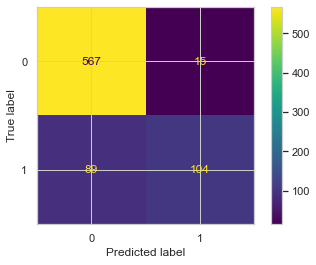

In [ ]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [ ]:
train_acc = best_model.score(X_train, y_train)
train_acc

0.8658064516129033

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       250
           1       0.84      0.52      0.64        83

    accuracy                           0.86       333
   macro avg       0.85      0.74      0.78       333
weighted avg       0.85      0.86      0.84       333
 



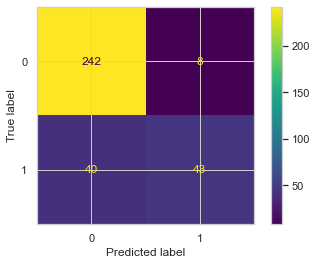

In [ ]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
test_acc = best_model.score(X_test, y_test)
test_acc

0.8558558558558559

AUC: 0.888


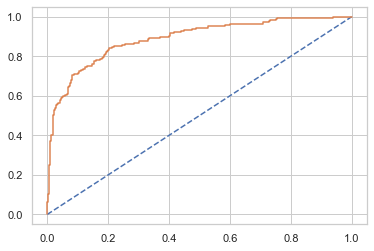

In [ ]:
# Predict Probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.872


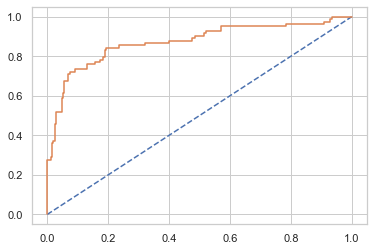

In [ ]:
# Predict Probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

LDA

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [ ]:
clf.intercept_

array([0.52666501])

In [ ]:
clf.coef_

array([[-5.51199576e-03, -2.53783905e-05,  2.04971624e-02,
        -1.13027605e-04,  2.63732282e-01,  1.85479858e+00,
        -1.43267575e-02,  2.24575357e-01, -4.78191928e-01,
        -5.31997641e-01, -6.72523283e-02, -1.11311287e+00,
        -1.65762062e+00,  3.68017432e+00,  1.94853286e-01,
         5.34869478e+00,  1.32550418e+00, -2.69843243e-01,
         3.54837955e+00, -4.65553183e-01,  1.46334816e+00,
        -7.34492414e-01, -4.02293197e-01, -2.95081077e+00,
        -4.30850192e-01, -2.20699054e-01,  1.94485960e+00,
         8.80473856e-01,  1.26360280e+00,  2.27404658e+00,
         3.52145859e-01,  1.98092192e+00,  1.59083587e-01,
         9.33342003e-02, -8.11158640e-01, -6.39429243e-01,
         4.40881266e-01,  4.22787910e-01,  7.62266929e-01,
         9.51041375e-01,  2.48585703e-01, -2.03981955e-02,
         1.06744904e+00,  1.46387538e-01,  1.44857959e+00,
        -5.69272176e-01, -1.60115116e+00,  1.41725792e+00]])

In [ ]:
X_train.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'monthly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page',
       'yearly_avg_Outstation_checkins_10',
       'yearly_avg_Outstation_checkins_11',
       'yearly_avg_Outstation_checkins_12',
       'yearly_avg_Outstation_checkins_13',
       'yearly_avg_Outstation_checkins_14',
       'yearly_avg_Outstation_checkins_15',
       'yearly_avg_Outstation_checkins_16',
       'yearly_avg_Outstation_checkins_17',
       'yearly_avg_Outstation_checkins_18',
       'yearly_avg_Outstation_checkins_19', 'yearly_avg_Outstation_checkins_2',
       'yearly_avg_Outstation_checkins_20',
       'yearly_avg_Outstation_checkins_21',
       'yearly

In [ ]:
a=clf.coef_
np.round(a,2)

array([[-0.01, -0.  ,  0.02, -0.  ,  0.26,  1.85, -0.01,  0.22, -0.48,
        -0.53, -0.07, -1.11, -1.66,  3.68,  0.19,  5.35,  1.33, -0.27,
         3.55, -0.47,  1.46, -0.73, -0.4 , -2.95, -0.43, -0.22,  1.94,
         0.88,  1.26,  2.27,  0.35,  1.98,  0.16,  0.09, -0.81, -0.64,
         0.44,  0.42,  0.76,  0.95,  0.25, -0.02,  1.07,  0.15,  1.45,
        -0.57, -1.6 ,  1.42]])

In [ ]:

pred_class_train = model.predict(X_train)


pred_class_test = model.predict(X_test)

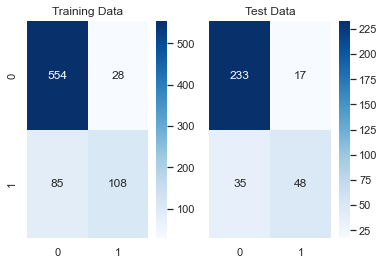

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.95      0.91       582
           1       0.79      0.56      0.66       193

    accuracy                           0.85       775
   macro avg       0.83      0.76      0.78       775
weighted avg       0.85      0.85      0.84       775
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.93      0.90       250
           1       0.74      0.58      0.65        83

    accuracy                           0.84       333
   macro avg       0.80      0.76      0.77       333
weighted avg       0.84      0.84      0.84       333
 



In [ ]:
confusion_matrix(y_train, pred_class_train)

array([[554,  28],
       [ 85, 108]], dtype=int64)

In [ ]:
confusion_matrix(y_test, pred_class_test)

array([[233,  17],
       [ 35,  48]], dtype=int64)

In [ ]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.8541935483870968

In [ ]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.8438438438438438

In [ ]:

pred_prob_train = model.predict_proba(X_train)


pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.882


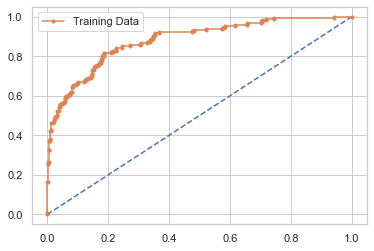

In [ ]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.853


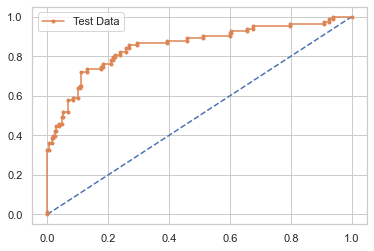

In [ ]:
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Naïve Bayes ModeL

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       250
           1       0.66      0.51      0.57        83

    accuracy                           0.81       333
   macro avg       0.75      0.71      0.73       333
weighted avg       0.80      0.81      0.80       333

[[228  22]
 [ 41  42]]


In [ ]:

y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8141935483870968
[[524  58]
 [ 86 107]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       582
           1       0.65      0.55      0.60       193

    accuracy                           0.81       775
   macro avg       0.75      0.73      0.74       775
weighted avg       0.81      0.81      0.81       775



0.8141935483870968


<AxesSubplot:>

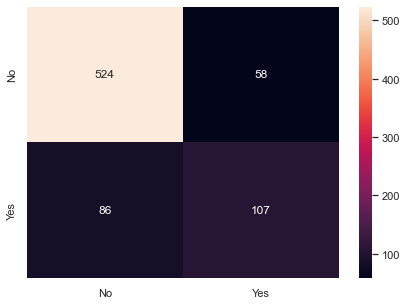

In [ ]:
y_predict = model.predict(X_train)
print(model.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.888


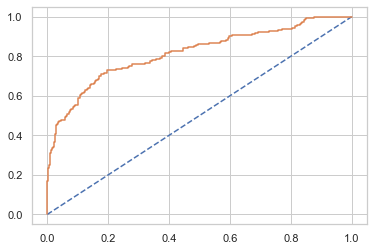

In [ ]:
# Predict Probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:

y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8108108108108109
[[228  22]
 [ 41  42]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       250
           1       0.66      0.51      0.57        83

    accuracy                           0.81       333
   macro avg       0.75      0.71      0.73       333
weighted avg       0.80      0.81      0.80       333



0.8108108108108109


<AxesSubplot:>

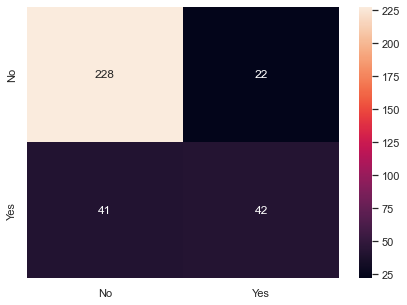

In [ ]:
y_predict = model.predict(X_test)
print(model.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.872


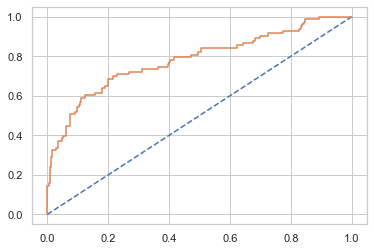

In [ ]:
# Predict Probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.993993993993994

In [ ]:
from sklearn import metrics
y_train_predict = NNH.predict(X_train)
model_score = NNH.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[582   0]
 [  0 193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



1.0


<AxesSubplot:>

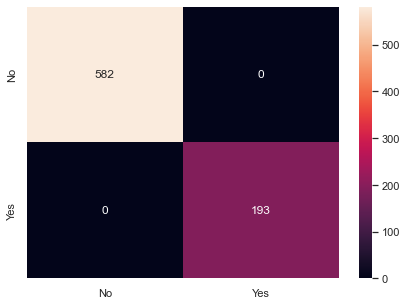

In [ ]:
y_predict = NNH.predict(X_train)
print(NNH.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.888


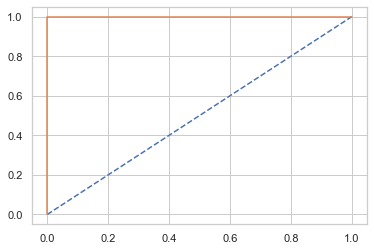

In [ ]:
# Predict Probabilities
probs = NNH.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NNH_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:

from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[248   2]
 [  0  83]]


In [ ]:

## Performance Matrix on test data set
y_test_predict = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.993993993993994
[[248   2]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.98      1.00      0.99        83

    accuracy                           0.99       333
   macro avg       0.99      1.00      0.99       333
weighted avg       0.99      0.99      0.99       333



0.993993993993994


<AxesSubplot:>

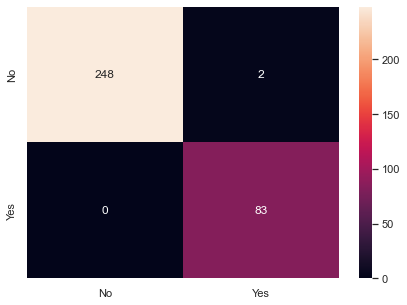

In [ ]:
y_predict = NNH.predict(X_test)
print(NNH.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.872


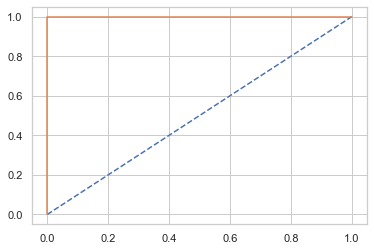

In [ ]:
# Predict Probabilities
probs = NNH.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

NNH_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[582   0]
 [  0 193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



AUC: 0.888


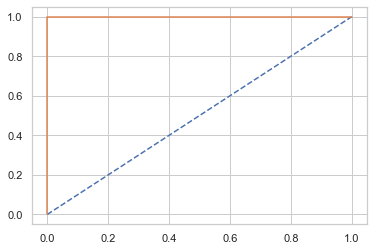

In [ ]:
# Predict Probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.978978978978979
[[250   0]
 [  7  76]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       250
           1       1.00      0.92      0.96        83

    accuracy                           0.98       333
   macro avg       0.99      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333



AUC: 0.872


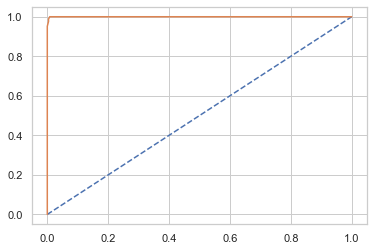

In [ ]:
# Predict Probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

BAGGING

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators = 50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = bgcl.predict(X_train)
model_score =bgcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9987096774193548
[[582   0]
 [  1 192]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      0.99      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



AUC: 0.888


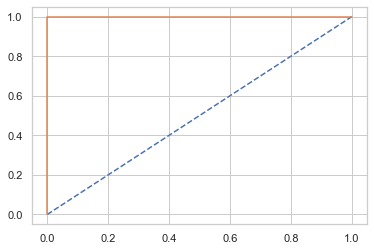

In [ ]:
# Predict Probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.975975975975976
[[250   0]
 [  8  75]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       1.00      0.90      0.95        83

    accuracy                           0.98       333
   macro avg       0.98      0.95      0.97       333
weighted avg       0.98      0.98      0.98       333



AUC: 0.872


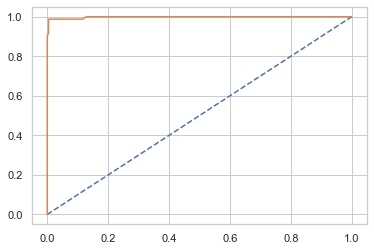

In [ ]:
# Predict Probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
bgcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9987096774193548


<AxesSubplot:>

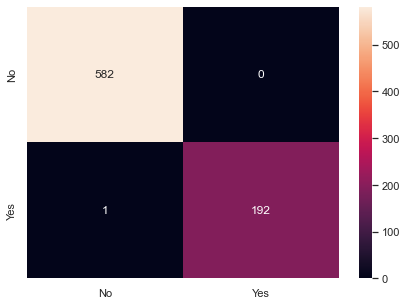

In [ ]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.975975975975976


<AxesSubplot:>

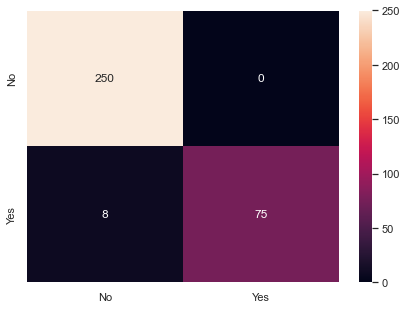

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50,random_state=1)

abcl = abcl.fit(X_train, y_train)


In [ ]:
## Performance Matrix on train data set
y_train_predict = abcl.predict(X_train)
model_score = abcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9225806451612903
[[568  14]
 [ 46 147]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       582
           1       0.91      0.76      0.83       193

    accuracy                           0.92       775
   macro avg       0.92      0.87      0.89       775
weighted avg       0.92      0.92      0.92       775



AUC: 0.888


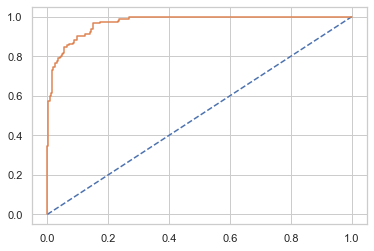

In [ ]:
# Predict Probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
abcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8528528528528528
[[238  12]
 [ 37  46]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       250
           1       0.79      0.55      0.65        83

    accuracy                           0.85       333
   macro avg       0.83      0.75      0.78       333
weighted avg       0.85      0.85      0.84       333



AUC: 0.872


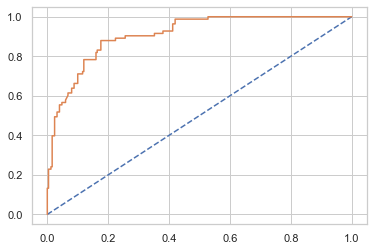

In [ ]:
# Predict Probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
abcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9225806451612903


<AxesSubplot:>

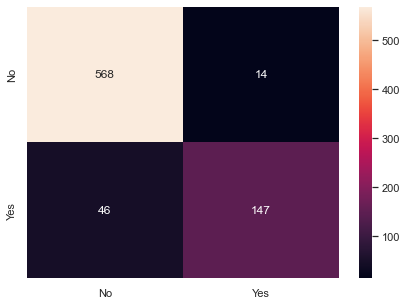

In [ ]:
y_predict = abcl.predict(X_train)
print(abcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8528528528528528


<AxesSubplot:>

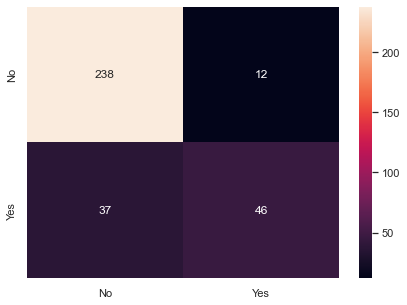

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9780645161290322
[[582   0]
 [ 17 176]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       582
           1       1.00      0.91      0.95       193

    accuracy                           0.98       775
   macro avg       0.99      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775



AUC: 0.888


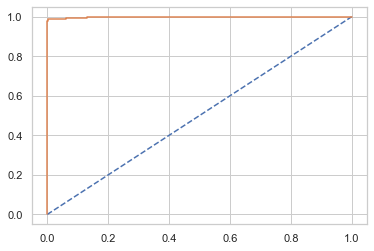

In [ ]:
# Predict Probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9129129129129129
[[247   3]
 [ 26  57]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       250
           1       0.95      0.69      0.80        83

    accuracy                           0.91       333
   macro avg       0.93      0.84      0.87       333
weighted avg       0.92      0.91      0.91       333



AUC: 0.872


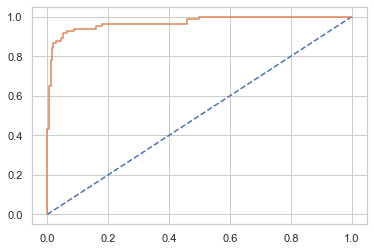

In [ ]:
# Predict Probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9780645161290322


<AxesSubplot:>

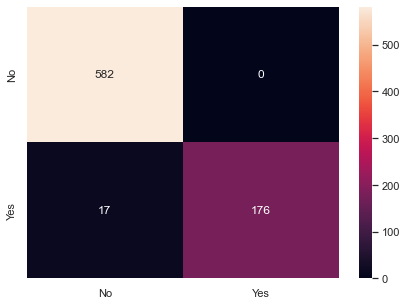

In [ ]:
y_predict = gbcl.predict(X_train)
print(gbcl.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9129129129129129


<AxesSubplot:>

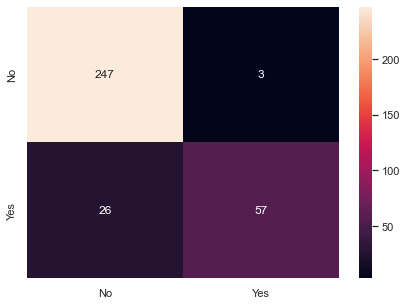

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

LOGIT

In [ ]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=5000, n_jobs=2, penalty='l1', solver='liblinear')


In [ ]:
best_model1 = grid_search.best_estimator_
best_model1

LogisticRegression(max_iter=5000, n_jobs=2, penalty='l1', solver='liblinear')

In [ ]:
ytrain_predict1 = best_model.predict(X_train_res)
ytest_predict1 = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       582
           1       0.95      0.46      0.62       582

    accuracy                           0.72      1164
   macro avg       0.80      0.72      0.70      1164
weighted avg       0.80      0.72      0.70      1164
 



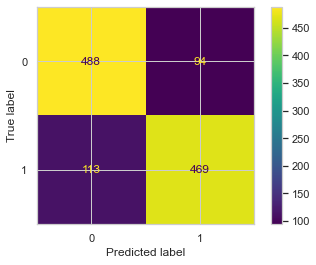

In [ ]:
plot_confusion_matrix(best_model1,X_train_res,y_train_res)
print(classification_report(y_train_res, ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       250
           1       0.84      0.52      0.64        83

    accuracy                           0.86       333
   macro avg       0.85      0.74      0.78       333
weighted avg       0.85      0.86      0.84       333
 



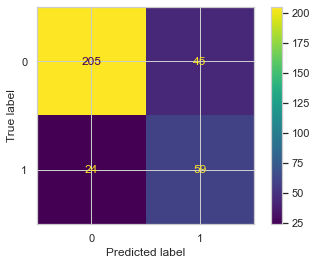

In [ ]:
plot_confusion_matrix(best_model1,X_test,y_test)
print(classification_report(y_test, ytest_predict1),'\n');

LDA

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_res,y_train_res)

In [ ]:

pred_class_train1 = model.predict(X_train_res)


pred_class_test1 = model.predict(X_test)

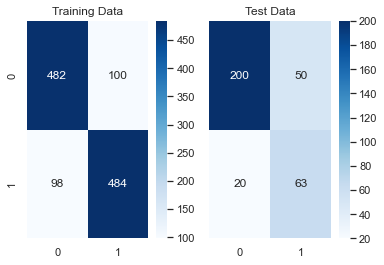

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train1)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test1)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train1),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test1),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       582
           1       0.83      0.83      0.83       582

    accuracy                           0.83      1164
   macro avg       0.83      0.83      0.83      1164
weighted avg       0.83      0.83      0.83      1164
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.80      0.85       250
           1       0.56      0.76      0.64        83

    accuracy                           0.79       333
   macro avg       0.73      0.78      0.75       333
weighted avg       0.82      0.79      0.80       333
 



naive bayes

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.6683848797250859
[[269 313]
 [ 73 509]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58       582
           1       0.62      0.87      0.73       582

    accuracy                           0.67      1164
   macro avg       0.70      0.67      0.65      1164
weighted avg       0.70      0.67      0.65      1164



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5315315315315315
[[108 142]
 [ 14  69]]
              precision    recall  f1-score   support

           0       0.89      0.43      0.58       250
           1       0.33      0.83      0.47        83

    accuracy                           0.53       333
   macro avg       0.61      0.63      0.53       333
weighted avg       0.75      0.53      0.55       333



KNN

In [ ]:

KNN_SM_model=KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(weights='distance')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[582   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.993993993993994
[[248   2]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.98      1.00      0.99        83

    accuracy                           0.99       333
   macro avg       0.99      1.00      0.99       333
weighted avg       0.99      0.99      0.99       333



RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=50, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_res)
model_score =RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[582   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.987987987987988
[[250   0]
 [  4  79]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.95      0.98        83

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.98       333
weighted avg       0.99      0.99      0.99       333



BAGGING

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

In [ ]:

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators = 50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = bgcl.predict(X_train_res)
model_score =bgcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[582   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [ ]:
## Performance Matrix on test data set
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.990990990990991
[[247   3]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       250
           1       0.97      1.00      0.98        83

    accuracy                           0.99       333
   macro avg       0.98      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50,random_state=1)

abcl = abcl.fit(X_train_res, y_train_res)


In [ ]:
## Performance Matrix on train data set
y_train_predict = abcl.predict(X_train_res)
model_score = abcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9183848797250859
[[533  49]
 [ 46 536]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       582
           1       0.92      0.92      0.92       582

    accuracy                           0.92      1164
   macro avg       0.92      0.92      0.92      1164
weighted avg       0.92      0.92      0.92      1164



In [ ]:
y_test_predict = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8468468468468469
[[221  29]
 [ 22  61]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       250
           1       0.68      0.73      0.71        83

    accuracy                           0.85       333
   macro avg       0.79      0.81      0.80       333
weighted avg       0.85      0.85      0.85       333



GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train_res, y_train_res)

In [ ]:
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9914089347079038
[[577   5]
 [  5 577]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       582
           1       0.99      0.99      0.99       582

    accuracy                           0.99      1164
   macro avg       0.99      0.99      0.99      1164
weighted avg       0.99      0.99      0.99      1164



In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.93993993993994
[[243   7]
 [ 13  70]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       250
           1       0.91      0.84      0.88        83

    accuracy                           0.94       333
   macro avg       0.93      0.91      0.92       333
weighted avg       0.94      0.94      0.94       333



### df_Mobile

In [ ]:
cols = ['Buy_ticket','following_company_page','working_flag']
#
# Encode labels of multiple columns at once
#
df_Mobile[cols] = df_Mobile[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_Mobile.head()

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0           1                           307.0           Mobile   
1           0                           367.0           Mobile   
2           1                           277.0           Mobile   
3           0                           247.0           Mobile   
4           0                           202.0           Mobile   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                 8.0                       1   
1                                 1.0                       0   
2                                 6.0                       1   
3                                 1.0                       1   
4                                 9.0                       0   

   monthly_avg_comment_on_company_page  working_flag  \
0                                 11.0             0   
1                                 23.0             1   
2                                 15.0             0   
3                                 11.0             0   
4                                 12.0             0   

   travelling_network_rating  Adult_flag  \
0                        1.0         0.0   
1                        4.0         1.0   
2                        2.0         0.0   
3                        3.0         0.0   
4                        4.0         1.0   

   Daily_Avg_mins_spend_on_traveling_page  
0                                     8.0  
1                                    10.0  
2                                     7.0  
3                                     8.0  
4                                     6.0

In [ ]:
df_Mobile = pd.get_dummies(df_Mobile, columns=["yearly_avg_Outstation_checkins",'member_in_family','preferred_location_type'], drop_first=True)
df_Mobile.head()

Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0           1                           307.0           Mobile   
1           0                           367.0           Mobile   
2           1                           277.0           Mobile   
3           0                           247.0           Mobile   
4           0                           202.0           Mobile   

   total_likes_on_outstation_checkin_given  Yearly_avg_comment_on_travel_page  \
0                                  38570.0                               94.0   
1                                   9765.0                               61.0   
2                                  48055.0                               92.0   
3                                  48720.0                               56.0   
4                                  20685.0                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                 8.0                       1   
1                                 1.0                       0   
2                                 6.0                       1   
3                                 1.0                       1   
4                                 9.0                       0   

   monthly_avg_comment_on_company_page  working_flag  ...  \
0                                 11.0             0  ...   
1                                 23.0             1  ...   
2                                 15.0             0  ...   
3                                 11.0             0  ...   
4                                 12.0             0  ...   

   preferred_location_type_Game  preferred_location_type_Hill Stations  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   preferred_location_type_Historical site  preferred_location_type_Medical  \
0                                        0                                0   
1                                        0                                0   
2                                        0                                0   
3                                        0                                0   
4                                        0                                1   

   preferred_location_type_Movie  preferred_location_type_OTT  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   preferred_location_type_Other  preferred_location_type_Social media  \
0                              0                                     0   
1                              0                                     0   
2                              1                                     0   
3                              0                                     0   
4                              0                                     0   

   preferred_location_type_Tour and Travel  preferred_location_type_Trekking  
0                                        0                                 0  
1                                        0                                 0  
2                                        0                   

In [ ]:
df_Mobile = df_Mobile.drop('preferred_device', axis=1)

In [ ]:
df_Mobile.head()

Buy_ticket  Yearly_avg_view_on_travel_page  \
0           1                           307.0   
1           0                           367.0   
2           1                           277.0   
3           0                           247.0   
4           0                           202.0   

   total_likes_on_outstation_checkin_given  Yearly_avg_comment_on_travel_page  \
0                                  38570.0                               94.0   
1                                   9765.0                               61.0   
2                                  48055.0                               92.0   
3                                  48720.0                               56.0   
4                                  20685.0                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                 8.0                       1   
1                                 1.0                       0   
2                                 6.0                       1   
3                                 1.0                       1   
4                                 9.0                       0   

   monthly_avg_comment_on_company_page  working_flag  \
0                                 11.0             0   
1                                 23.0             1   
2                                 15.0             0   
3                                 11.0             0   
4                                 12.0             0   

   travelling_network_rating  ...  preferred_location_type_Game  \
0                        1.0  ...                             0   
1                        4.0  ...                             0   
2                        2.0  ...                             0   
3                        3.0  ...                             0   
4                        4.0  ...                             0   

   preferred_location_type_Hill Stations  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   preferred_location_type_Historical site  preferred_location_type_Medical  \
0                                        0                                0   
1                                        0                                0   
2                                        0                                0   
3                                        0                                0   
4                                        0                                1   

   preferred_location_type_Movie  preferred_location_type_OTT  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   preferred_location_type_Other  preferred_location_type_Social media  \
0                              0                                     0   
1                              0                                     0   
2                              1                                     0   
3                              0                                     0   
4                              0                                     0   

   preferred_location_type_Tour and Travel  preferred_location_type_Trekking  
0                                        0                                 0  
1                                        0       

In [ ]:
X = df_Mobile.drop('Buy_ticket', axis=1)
y = df_Mobile['Buy_ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [ ]:
X_train.head()

Yearly_avg_view_on_travel_page  \
3810                            264.0   
5200                            248.0   
3279                            271.0   
10467                           154.0   
541                             270.0   

       total_likes_on_outstation_checkin_given  \
3810                                   47681.0   
5200                                   22927.0   
3279                                   39599.0   
10467                                  10658.0   
541                                    14945.0   

       Yearly_avg_comment_on_travel_page  \
3810                               101.0   
5200                                42.0   
3279                                65.0   
10467                               60.0   
541                                 63.0   

       total_likes_on_outofstation_checkin_received  \
3810                                         9014.0   
5200                                         7162.0   
3279                                         6260.0   
10467                                        1162.0   
541                                         11713.0   

       week_since_last_outstation_checkin  following_company_page  \
3810                                  4.0                       1   
5200                                  5.0                       0   
3279                                  1.0                       0   
10467                                 2.0                       0   
541                                   9.0                       0   

       monthly_avg_comment_on_company_page  working_flag  \
3810                                  25.0             0   
5200                                  19.0             0   
3279                                  29.0             0   
10467                                 34.0             1   
541                                   14.0             0   

       travelling_network_rating  Adult_flag  ...  \
3810                         4.0         2.5  ...   
5200                         3.0         1.0  ...   
3279                         1.0         1.0  ...   
10467                        3.0         0.0  ...   
541                          1.0         1.0  ...   

       preferred_location_type_Game  preferred_location_type_Hill Stations  \
3810                              0                                      0   
5200                              0                                      0   
3279                              0                                      0   
10467                             0                                      0   
541                               0                                      0   

       preferred_location_type_Historical site  \
3810                                         0   
5200                                         0   
3279                                         0   
10467                                        0   
541                                          0   

       preferred_location_type_Medical  preferred_location_type_Movie  \
3810                                 0                              0   
5200                                 0                              0   
3279                                 0                              0   
10467                                0                              0   
541                                  0                              0   

       preferred_location_type_OTT  preferred_location_type_Other  \
3810                             0                              0   
5200                             0                              0   
3279                             0                              0   
10467                            0                              0   
541                              0                              0   

       preferred_location_type_Social media  \
3810                                      0   
5200                                      0   
327

In [ ]:
X_test.head()

Yearly_avg_view_on_travel_page  \
1298                            345.0   
7499                            148.0   
10832                           293.0   
6523                            322.0   
10597                           300.0   

       total_likes_on_outstation_checkin_given  \
1298                                    9135.0   
7499                                   41342.0   
10832                                   5929.0   
6523                                   44283.0   
10597                                  29756.0   

       Yearly_avg_comment_on_travel_page  \
1298                                75.0   
7499                                82.0   
10832                               97.0   
6523                               105.0   
10597                               96.0   

       total_likes_on_outofstation_checkin_received  \
1298                                         8926.0   
7499                                         1490.0   
10832                                        7909.0   
6523                                         5238.0   
10597                                       12109.0   

       week_since_last_outstation_checkin  following_company_page  \
1298                                  4.0                       0   
7499                                  1.0                       0   
10832                                 6.0                       1   
6523                                  2.0                       1   
10597                                 3.0                       0   

       monthly_avg_comment_on_company_page  working_flag  \
1298                                  22.0             1   
7499                                  21.0             0   
10832                                 29.0             0   
6523                                  25.0             0   
10597                                 33.0             0   

       travelling_network_rating  Adult_flag  ...  \
1298                         4.0         1.0  ...   
7499                         4.0         0.0  ...   
10832                        4.0         0.0  ...   
6523                         2.0         1.0  ...   
10597                        3.0         1.0  ...   

       preferred_location_type_Game  preferred_location_type_Hill Stations  \
1298                              0                                      0   
7499                              0                                      0   
10832                             0                                      0   
6523                              0                                      0   
10597                             0                                      0   

       preferred_location_type_Historical site  \
1298                                         0   
7499                                         1   
10832                                        0   
6523                                         0   
10597                                        0   

       preferred_location_type_Medical  preferred_location_type_Movie  \
1298                                 1                              0   
7499                                 0                              0   
10832                                0                              0   
6523                                 0                              0   
10597                                0                              0   

       preferred_location_type_OTT  preferred_location_type_Other  \
1298                             0                              0   
7499                             0                              0   
10832                            0                              0   
6523                             0                              0   
10597                            0                              0   

       preferred_location_type_Social media  \
1298                                      0   
7499                                      0   
108

In [ ]:
y_train.value_counts()

0    5608
1     997
Name: Buy_ticket, dtype: int64

In [ ]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.85
1    0.15
Name: Buy_ticket, dtype: float64
 
0    0.85
1    0.15
Name: Buy_ticket, dtype: float64


LOGIT

In [ ]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [ ]:
model = LogisticRegression(max_iter=5000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=5000, n_jobs=2, solver='liblinear', tol=1e-06)


In [ ]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=5000, n_jobs=2, solver='liblinear', tol=1e-06)

In [ ]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.956394  0.043606
1  0.874315  0.125685
2  0.691482  0.308518
3  0.893746  0.106254
4  0.984016  0.015984

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5608
           1       0.72      0.24      0.36       997

    accuracy                           0.87      6605
   macro avg       0.80      0.61      0.64      6605
weighted avg       0.86      0.87      0.84      6605
 



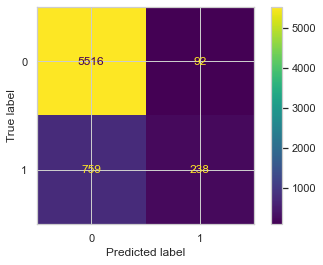

In [ ]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2403
           1       0.59      0.19      0.29       428

    accuracy                           0.86      2831
   macro avg       0.73      0.58      0.61      2831
weighted avg       0.83      0.86      0.83      2831
 



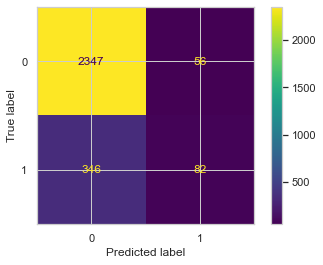

In [ ]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.804


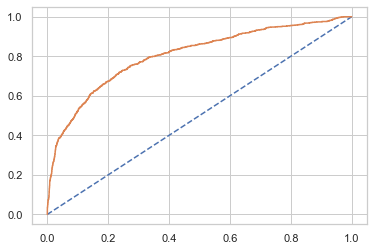

In [ ]:
# Predict Probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.776


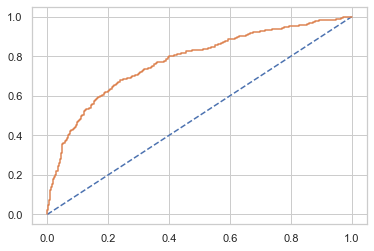

In [ ]:
# Predict Probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

LDA

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [ ]:

pred_class_train = model.predict(X_train)


pred_class_test = model.predict(X_test)

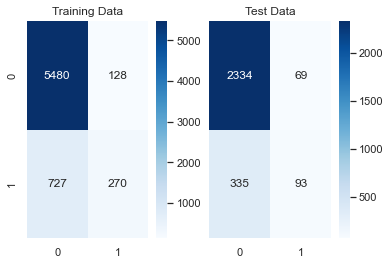

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93      5608
           1       0.68      0.27      0.39       997

    accuracy                           0.87      6605
   macro avg       0.78      0.62      0.66      6605
weighted avg       0.85      0.87      0.85      6605
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2403
           1       0.57      0.22      0.32       428

    accuracy                           0.86      2831
   macro avg       0.72      0.59      0.62      2831
weighted avg       0.83      0.86      0.83      2831
 



In [ ]:

pred_prob_train = model.predict_proba(X_train)


pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.799


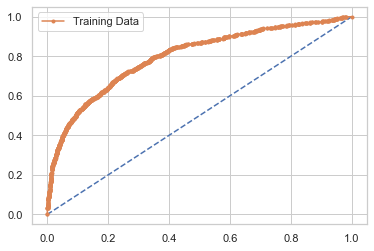

In [ ]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.768


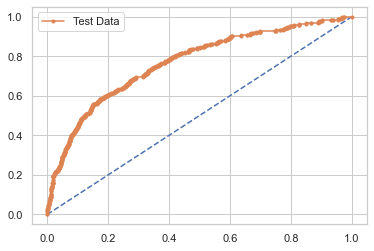

In [ ]:
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

NAIVE BAYES

In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2403
           1       0.62      0.07      0.13       428

    accuracy                           0.85      2831
   macro avg       0.74      0.53      0.53      2831
weighted avg       0.82      0.85      0.80      2831

[[2383   20]
 [ 396   32]]


In [ ]:

y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8585919757759273
[[5574   34]
 [ 900   97]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5608
           1       0.74      0.10      0.17       997

    accuracy                           0.86      6605
   macro avg       0.80      0.55      0.55      6605
weighted avg       0.84      0.86      0.81      6605



0.8585919757759273


<AxesSubplot:>

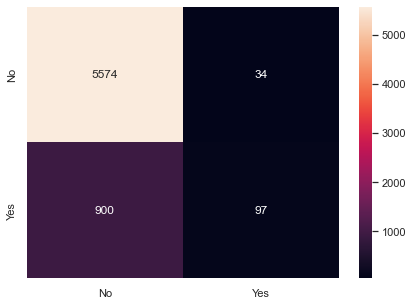

In [ ]:
y_predict = model.predict(X_train)
print(model.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.804


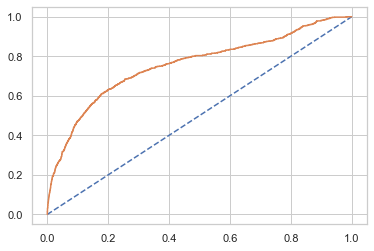

In [ ]:
# Predict Probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:

y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8530554574355351
[[2383   20]
 [ 396   32]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2403
           1       0.62      0.07      0.13       428

    accuracy                           0.85      2831
   macro avg       0.74      0.53      0.53      2831
weighted avg       0.82      0.85      0.80      2831



0.8530554574355351


<AxesSubplot:>

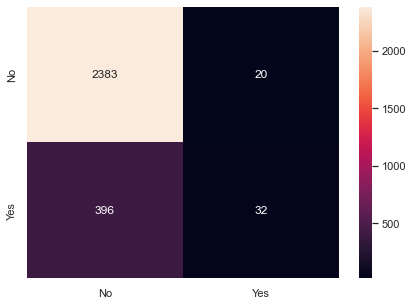

In [ ]:
y_predict = model.predict(X_test)
print(model.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.776


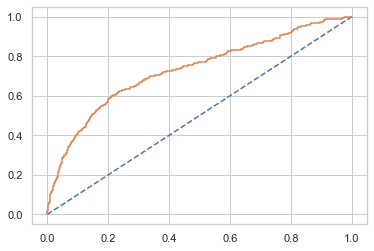

In [ ]:
# Predict Probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

KNN

In [ ]:

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9894030377958318

In [ ]:
from sklearn import metrics
y_train_predict = NNH.predict(X_train)
model_score = NNH.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[5608    0]
 [   0  997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       997

    accuracy                           1.00      6605
   macro avg       1.00      1.00      1.00      6605
weighted avg       1.00      1.00      1.00      6605



1.0


<AxesSubplot:>

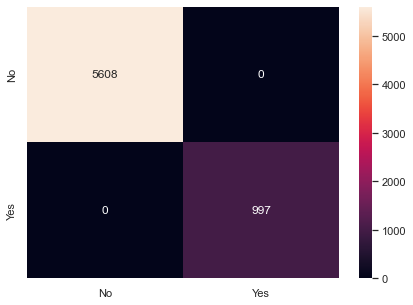

In [ ]:
y_predict = NNH.predict(X_train)
print(NNH.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.804


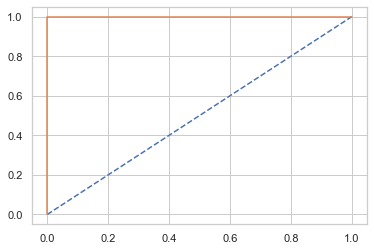

In [ ]:
# Predict Probabilities
probs = NNH.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NNH_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:

## Performance Matrix on test data set
y_test_predict = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9894030377958318
[[2394    9]
 [  21  407]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2403
           1       0.98      0.95      0.96       428

    accuracy                           0.99      2831
   macro avg       0.98      0.97      0.98      2831
weighted avg       0.99      0.99      0.99      2831



0.9894030377958318


<AxesSubplot:>

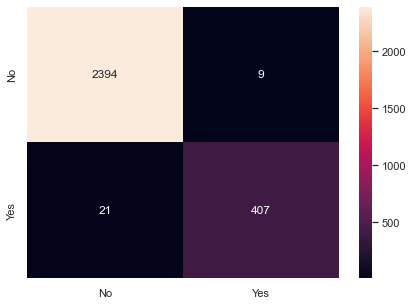

In [ ]:
y_predict = NNH.predict(X_test)
print(NNH.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.776


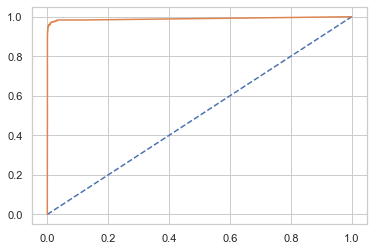

In [ ]:
# Predict Probabilities
probs = NNH.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

NNH_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[5608    0]
 [   0  997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       997

    accuracy                           1.00      6605
   macro avg       1.00      1.00      1.00      6605
weighted avg       1.00      1.00      1.00      6605



AUC: 0.804


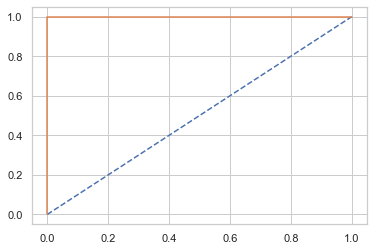

In [ ]:
# Predict Probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9607912398445779
[[2399    4]
 [ 107  321]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2403
           1       0.99      0.75      0.85       428

    accuracy                           0.96      2831
   macro avg       0.97      0.87      0.91      2831
weighted avg       0.96      0.96      0.96      2831



AUC: 0.776


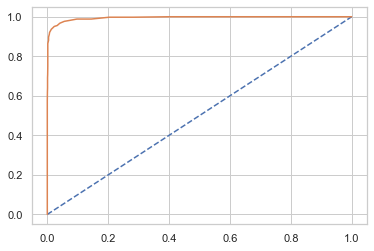

In [ ]:
# Predict Probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

BAGGING

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators = 50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = bgcl.predict(X_train)
model_score =bgcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9998485995457986
[[5608    0]
 [   1  996]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       997

    accuracy                           1.00      6605
   macro avg       1.00      1.00      1.00      6605
weighted avg       1.00      1.00      1.00      6605



AUC: 0.804


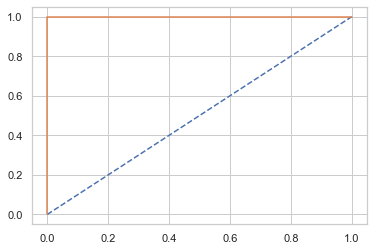

In [ ]:
# Predict Probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9763334510773578
[[2402    1]
 [  66  362]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2403
           1       1.00      0.85      0.92       428

    accuracy                           0.98      2831
   macro avg       0.99      0.92      0.95      2831
weighted avg       0.98      0.98      0.98      2831



AUC: 0.776


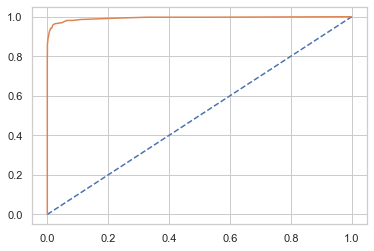

In [ ]:
# Predict Probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
bgcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9998485995457986


<AxesSubplot:>

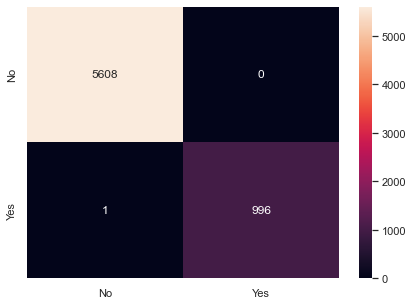

In [ ]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9763334510773578


<AxesSubplot:>

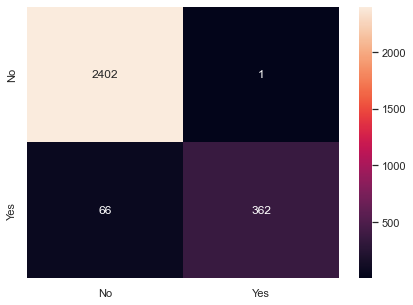

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50,random_state=1)

abcl = abcl.fit(X_train, y_train)


In [ ]:
## Performance Matrix on train data set
y_train_predict = abcl.predict(X_train)
model_score = abcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8770628311884936
[[5475  133]
 [ 679  318]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5608
           1       0.71      0.32      0.44       997

    accuracy                           0.88      6605
   macro avg       0.80      0.65      0.69      6605
weighted avg       0.86      0.88      0.86      6605



AUC: 0.804


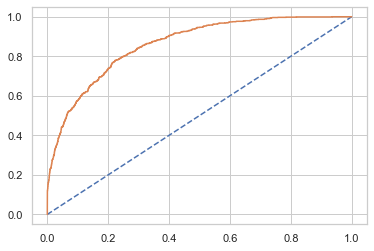

In [ ]:
# Predict Probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
abcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.863299187566231
[[2335   68]
 [ 319  109]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2403
           1       0.62      0.25      0.36       428

    accuracy                           0.86      2831
   macro avg       0.75      0.61      0.64      2831
weighted avg       0.84      0.86      0.84      2831



AUC: 0.776


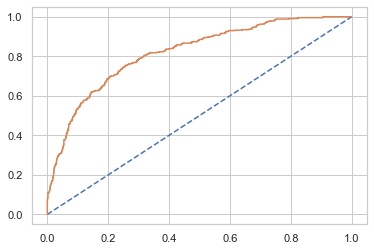

In [ ]:
# Predict Probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
abcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.8770628311884936


<AxesSubplot:>

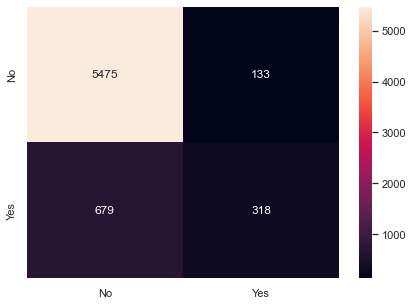

In [ ]:
y_predict = abcl.predict(X_train)
print(abcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.863299187566231


<AxesSubplot:>

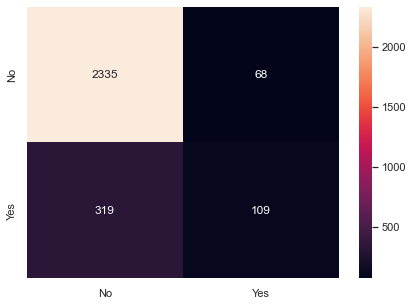

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9147615442846329
[[5562   46]
 [ 517  480]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5608
           1       0.91      0.48      0.63       997

    accuracy                           0.91      6605
   macro avg       0.91      0.74      0.79      6605
weighted avg       0.91      0.91      0.90      6605



AUC: 0.804


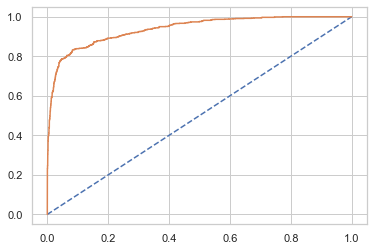

In [ ]:
# Predict Probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8975626986930413
[[2379   24]
 [ 266  162]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2403
           1       0.87      0.38      0.53       428

    accuracy                           0.90      2831
   macro avg       0.89      0.68      0.74      2831
weighted avg       0.90      0.90      0.88      2831



AUC: 0.776


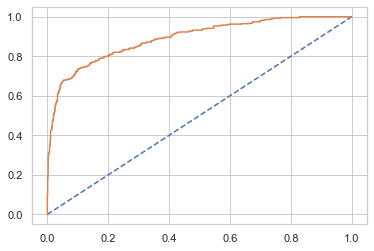

In [ ]:
# Predict Probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9147615442846329


<AxesSubplot:>

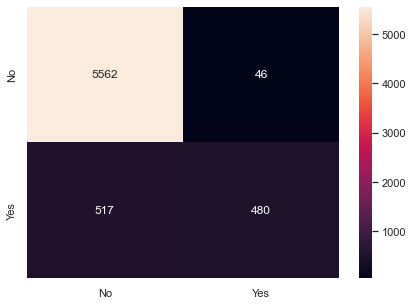

In [ ]:
y_predict = gbcl.predict(X_train)
print(gbcl.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8975626986930413


<AxesSubplot:>

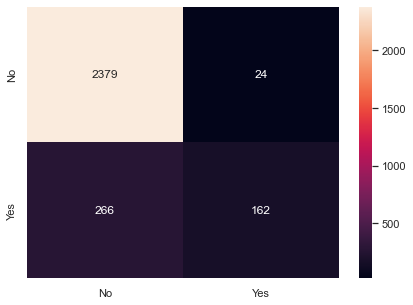

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

with SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

LOGIT

In [ ]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=5000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [ ]:
best_model1 = grid_search.best_estimator_
best_model1

LogisticRegression(max_iter=5000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)

In [ ]:
ytrain_predict1 = best_model.predict(X_train_res)
ytest_predict1 = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.55      0.98      0.70      5608
           1       0.92      0.18      0.31      5608

    accuracy                           0.58     11216
   macro avg       0.73      0.58      0.51     11216
weighted avg       0.73      0.58      0.51     11216
 



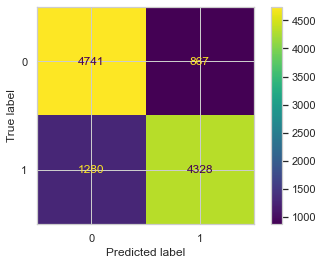

In [ ]:
plot_confusion_matrix(best_model1,X_train_res,y_train_res)
print(classification_report(y_train_res, ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2403
           1       0.59      0.19      0.29       428

    accuracy                           0.86      2831
   macro avg       0.73      0.58      0.61      2831
weighted avg       0.83      0.86      0.83      2831
 



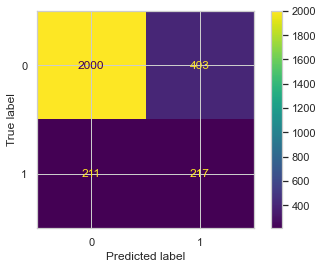

In [ ]:
plot_confusion_matrix(best_model1,X_test,y_test)
print(classification_report(y_test, ytest_predict1),'\n');

LDA

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_res,y_train_res)

In [ ]:

pred_class_train1 = model.predict(X_train_res)


pred_class_test1 = model.predict(X_test)

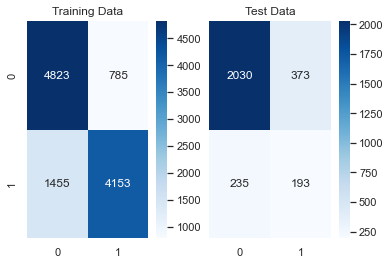

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train1)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test1)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train1),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test1),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.86      0.81      5608
           1       0.84      0.74      0.79      5608

    accuracy                           0.80     11216
   macro avg       0.80      0.80      0.80     11216
weighted avg       0.80      0.80      0.80     11216
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.84      0.87      2403
           1       0.34      0.45      0.39       428

    accuracy                           0.79      2831
   macro avg       0.62      0.65      0.63      2831
weighted avg       0.81      0.79      0.80      2831
 



NAIVE BAYES

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.6215228245363766
[[2077 3531]
 [ 714 4894]]
              precision    recall  f1-score   support

           0       0.74      0.37      0.49      5608
           1       0.58      0.87      0.70      5608

    accuracy                           0.62     11216
   macro avg       0.66      0.62      0.60     11216
weighted avg       0.66      0.62      0.60     11216



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.4464853408689509
[[ 915 1488]
 [  79  349]]
              precision    recall  f1-score   support

           0       0.92      0.38      0.54      2403
           1       0.19      0.82      0.31       428

    accuracy                           0.45      2831
   macro avg       0.56      0.60      0.42      2831
weighted avg       0.81      0.45      0.50      2831



KNN

In [ ]:

KNN_SM_model=KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(weights='distance')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[5608    0]
 [   0 5608]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      5608

    accuracy                           1.00     11216
   macro avg       1.00      1.00      1.00     11216
weighted avg       1.00      1.00      1.00     11216



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9858707170611092
[[2373   30]
 [  10  418]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2403
           1       0.93      0.98      0.95       428

    accuracy                           0.99      2831
   macro avg       0.96      0.98      0.97      2831
weighted avg       0.99      0.99      0.99      2831



RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=50, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_res)
model_score =RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[5608    0]
 [   0 5608]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      5608

    accuracy                           1.00     11216
   macro avg       1.00      1.00      1.00     11216
weighted avg       1.00      1.00      1.00     11216



In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9667961850936065
[[2397    6]
 [  88  340]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2403
           1       0.98      0.79      0.88       428

    accuracy                           0.97      2831
   macro avg       0.97      0.90      0.93      2831
weighted avg       0.97      0.97      0.97      2831



BAGGING

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

In [ ]:

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators = 50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = bgcl.predict(X_train_res)
model_score =bgcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[5608    0]
 [   0 5608]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      5608

    accuracy                           1.00     11216
   macro avg       1.00      1.00      1.00     11216
weighted avg       1.00      1.00      1.00     11216



In [ ]:
## Performance Matrix on test data set
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9780996114447191
[[2384   19]
 [  43  385]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2403
           1       0.95      0.90      0.93       428

    accuracy                           0.98      2831
   macro avg       0.97      0.95      0.96      2831
weighted avg       0.98      0.98      0.98      2831



ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50,random_state=1)

abcl = abcl.fit(X_train_res, y_train_res)


In [ ]:
## Performance Matrix on train data set
y_train_predict = abcl.predict(X_train_res)
model_score = abcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8246255349500713
[[4659  949]
 [1018 4590]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      5608
           1       0.83      0.82      0.82      5608

    accuracy                           0.82     11216
   macro avg       0.82      0.82      0.82     11216
weighted avg       0.82      0.82      0.82     11216



In [ ]:
y_test_predict = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7958318615330272
[[1998  405]
 [ 173  255]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2403
           1       0.39      0.60      0.47       428

    accuracy                           0.80      2831
   macro avg       0.65      0.71      0.67      2831
weighted avg       0.84      0.80      0.81      2831



GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train_res, y_train_res)

In [ ]:
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9017475035663338
[[5095  513]
 [ 589 5019]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5608
           1       0.91      0.89      0.90      5608

    accuracy                           0.90     11216
   macro avg       0.90      0.90      0.90     11216
weighted avg       0.90      0.90      0.90     11216



In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8622394913458142
[[2169  234]
 [ 156  272]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2403
           1       0.54      0.64      0.58       428

    accuracy                           0.86      2831
   macro avg       0.74      0.77      0.75      2831
weighted avg       0.87      0.86      0.87      2831

